In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
import numpy as np

from tensorflow import keras

import tensorflow_datasets as tfds
tfds.disable_progress_bar()

## Training model on our own preprocessed data

### Data : Corpus

In [2]:
import pickle

In [3]:
file = open(r'C:\Users\Shubham\Desktop\Machine Learning\Dataset\corpus_to_int', 'rb')
new_data = pickle.load(file)
file.close()

In [4]:
file = open(r'C:\Users\Shubham\Desktop\Machine Learning\Dataset\corpus_to_int_dictionary', 'rb')
d = pickle.load(file)
file.close()

In [5]:
len(d)

69018

In [6]:
import pandas as pd

In [7]:
corpus = pd.read_csv(r'C:\Users\Shubham\Desktop\Machine Learning\Dataset\corpus.csv')
labels = corpus['Labels']

In [8]:
from sklearn.preprocessing import LabelEncoder

new_encoder = LabelEncoder()
new_label = new_encoder.fit_transform(labels)

In [9]:
new_data = keras.preprocessing.sequence.pad_sequences(new_data,
                                                        padding='post')

In [10]:
len(new_data[5])

1424

In [11]:
new_train_data = new_data[:40000]
new_train_label = new_label[:40000]

new_val_data = new_data[40000:45000]
new_val_label = new_label[40000:45000]

new_test_data = new_data[45000:]
new_test_label = new_label[45000:]

####  Model 1:

In [10]:
model = keras.Sequential([
    keras.layers.Embedding(len(d), 16),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          1104288   
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 8)                 136       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 1,104,433
Trainable params: 1,104,433
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(new_train_data, new_train_label, epochs=5)

loss = 0.4915 <br>
accuracy = 0.8870

#### Model 2:

In [11]:
model = keras.Sequential([
    keras.layers.Embedding(len(d), 16),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(1, activation='sigmoid')
])

In [12]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [13]:
history = model.fit(new_train_data, new_train_label,
                    epochs=10,
                   validation_data=(new_val_data,new_val_label),
                   validation_steps=30,
                   verbose=2)

Train on 40000 samples, validate on 5000 samples
Epoch 1/10
11808/40000 [=======>......................] - ETA: 41:51 - loss: 0.6926 - accuracy: 0.562 - ETA: 14:21 - loss: 0.6926 - accuracy: 0.541 - ETA: 8:51 - loss: 0.6934 - accuracy: 0.506 - ETA: 6:29 - loss: 0.6922 - accuracy: 0.54 - ETA: 5:11 - loss: 0.6925 - accuracy: 0.53 - ETA: 4:20 - loss: 0.6930 - accuracy: 0.51 - ETA: 3:46 - loss: 0.6928 - accuracy: 0.51 - ETA: 3:20 - loss: 0.6932 - accuracy: 0.51 - ETA: 3:01 - loss: 0.6927 - accuracy: 0.52 - ETA: 2:46 - loss: 0.6927 - accuracy: 0.52 - ETA: 2:33 - loss: 0.6929 - accuracy: 0.51 - ETA: 2:23 - loss: 0.6929 - accuracy: 0.51 - ETA: 2:15 - loss: 0.6928 - accuracy: 0.51 - ETA: 2:07 - loss: 0.6930 - accuracy: 0.51 - ETA: 2:01 - loss: 0.6931 - accuracy: 0.50 - ETA: 1:55 - loss: 0.6928 - accuracy: 0.51 - ETA: 1:50 - loss: 0.6927 - accuracy: 0.51 - ETA: 1:46 - loss: 0.6927 - accuracy: 0.51 - ETA: 1:42 - loss: 0.6924 - accuracy: 0.52 - ETA: 1:39 - loss: 0.6923 - accuracy: 0.52 - ETA: 1:3

12320/40000 [========>.....................] - ETA: 39s - loss: 0.6466 - accuracy: 0.656 - ETA: 35s - loss: 0.6556 - accuracy: 0.656 - ETA: 34s - loss: 0.6528 - accuracy: 0.693 - ETA: 33s - loss: 0.6554 - accuracy: 0.692 - ETA: 32s - loss: 0.6559 - accuracy: 0.709 - ETA: 32s - loss: 0.6549 - accuracy: 0.716 - ETA: 34s - loss: 0.6538 - accuracy: 0.727 - ETA: 34s - loss: 0.6538 - accuracy: 0.732 - ETA: 34s - loss: 0.6540 - accuracy: 0.737 - ETA: 34s - loss: 0.6538 - accuracy: 0.746 - ETA: 34s - loss: 0.6531 - accuracy: 0.752 - ETA: 34s - loss: 0.6537 - accuracy: 0.753 - ETA: 34s - loss: 0.6529 - accuracy: 0.763 - ETA: 34s - loss: 0.6516 - accuracy: 0.773 - ETA: 34s - loss: 0.6511 - accuracy: 0.775 - ETA: 34s - loss: 0.6510 - accuracy: 0.780 - ETA: 34s - loss: 0.6503 - accuracy: 0.784 - ETA: 34s - loss: 0.6502 - accuracy: 0.789 - ETA: 34s - loss: 0.6502 - accuracy: 0.791 - ETA: 34s - loss: 0.6499 - accuracy: 0.795 - ETA: 34s - loss: 0.6497 - accuracy: 0.798 - ETA: 34s - loss: 0.6499 - acc

40000/40000 [==============================] - ETA: 2s - loss: 0.6054 - accuracy: 0.80 - ETA: 2s - loss: 0.6053 - accuracy: 0.80 - ETA: 2s - loss: 0.6051 - accuracy: 0.80 - ETA: 2s - loss: 0.6050 - accuracy: 0.80 - ETA: 2s - loss: 0.6048 - accuracy: 0.80 - ETA: 2s - loss: 0.6048 - accuracy: 0.80 - ETA: 2s - loss: 0.6047 - accuracy: 0.80 - ETA: 2s - loss: 0.6046 - accuracy: 0.80 - ETA: 2s - loss: 0.6045 - accuracy: 0.80 - ETA: 2s - loss: 0.6044 - accuracy: 0.80 - ETA: 2s - loss: 0.6043 - accuracy: 0.80 - ETA: 2s - loss: 0.6042 - accuracy: 0.80 - ETA: 2s - loss: 0.6041 - accuracy: 0.80 - ETA: 2s - loss: 0.6040 - accuracy: 0.80 - ETA: 1s - loss: 0.6039 - accuracy: 0.81 - ETA: 1s - loss: 0.6038 - accuracy: 0.81 - ETA: 1s - loss: 0.6037 - accuracy: 0.81 - ETA: 1s - loss: 0.6036 - accuracy: 0.81 - ETA: 1s - loss: 0.6036 - accuracy: 0.81 - ETA: 1s - loss: 0.6035 - accuracy: 0.81 - ETA: 1s - loss: 0.6034 - accuracy: 0.81 - ETA: 1s - loss: 0.6033 - accuracy: 0.81 - ETA: 1s - loss: 0.6033 - accu

12064/40000 [========>.....................] - ETA: 31s - loss: 0.4231 - accuracy: 0.875 - ETA: 31s - loss: 0.4309 - accuracy: 0.882 - ETA: 31s - loss: 0.4254 - accuracy: 0.883 - ETA: 30s - loss: 0.4194 - accuracy: 0.890 - ETA: 30s - loss: 0.4218 - accuracy: 0.880 - ETA: 31s - loss: 0.4248 - accuracy: 0.879 - ETA: 31s - loss: 0.4291 - accuracy: 0.882 - ETA: 31s - loss: 0.4287 - accuracy: 0.878 - ETA: 32s - loss: 0.4309 - accuracy: 0.881 - ETA: 34s - loss: 0.4348 - accuracy: 0.877 - ETA: 34s - loss: 0.4338 - accuracy: 0.878 - ETA: 35s - loss: 0.4365 - accuracy: 0.873 - ETA: 35s - loss: 0.4410 - accuracy: 0.868 - ETA: 36s - loss: 0.4412 - accuracy: 0.865 - ETA: 35s - loss: 0.4398 - accuracy: 0.867 - ETA: 35s - loss: 0.4398 - accuracy: 0.864 - ETA: 35s - loss: 0.4396 - accuracy: 0.862 - ETA: 35s - loss: 0.4446 - accuracy: 0.855 - ETA: 35s - loss: 0.4442 - accuracy: 0.853 - ETA: 35s - loss: 0.4457 - accuracy: 0.850 - ETA: 34s - loss: 0.4467 - accuracy: 0.847 - ETA: 34s - loss: 0.4465 - acc

40000/40000 [==============================] - ETA: 3s - loss: 0.4263 - accuracy: 0.86 - ETA: 3s - loss: 0.4262 - accuracy: 0.86 - ETA: 2s - loss: 0.4261 - accuracy: 0.86 - ETA: 2s - loss: 0.4262 - accuracy: 0.86 - ETA: 2s - loss: 0.4262 - accuracy: 0.86 - ETA: 2s - loss: 0.4261 - accuracy: 0.86 - ETA: 2s - loss: 0.4260 - accuracy: 0.86 - ETA: 2s - loss: 0.4260 - accuracy: 0.86 - ETA: 2s - loss: 0.4260 - accuracy: 0.86 - ETA: 2s - loss: 0.4260 - accuracy: 0.86 - ETA: 2s - loss: 0.4259 - accuracy: 0.86 - ETA: 2s - loss: 0.4259 - accuracy: 0.86 - ETA: 2s - loss: 0.4258 - accuracy: 0.86 - ETA: 2s - loss: 0.4259 - accuracy: 0.86 - ETA: 2s - loss: 0.4258 - accuracy: 0.86 - ETA: 2s - loss: 0.4258 - accuracy: 0.86 - ETA: 1s - loss: 0.4257 - accuracy: 0.86 - ETA: 1s - loss: 0.4255 - accuracy: 0.86 - ETA: 1s - loss: 0.4256 - accuracy: 0.86 - ETA: 1s - loss: 0.4257 - accuracy: 0.86 - ETA: 1s - loss: 0.4255 - accuracy: 0.86 - ETA: 1s - loss: 0.4255 - accuracy: 0.86 - ETA: 1s - loss: 0.4254 - accu

11872/40000 [=======>......................] - ETA: 38s - loss: 0.4806 - accuracy: 0.812 - ETA: 39s - loss: 0.3873 - accuracy: 0.854 - ETA: 39s - loss: 0.3560 - accuracy: 0.881 - ETA: 38s - loss: 0.3401 - accuracy: 0.897 - ETA: 37s - loss: 0.3397 - accuracy: 0.892 - ETA: 37s - loss: 0.3424 - accuracy: 0.886 - ETA: 37s - loss: 0.3375 - accuracy: 0.879 - ETA: 37s - loss: 0.3349 - accuracy: 0.883 - ETA: 37s - loss: 0.3385 - accuracy: 0.878 - ETA: 36s - loss: 0.3380 - accuracy: 0.881 - ETA: 37s - loss: 0.3363 - accuracy: 0.883 - ETA: 36s - loss: 0.3400 - accuracy: 0.885 - ETA: 36s - loss: 0.3411 - accuracy: 0.886 - ETA: 36s - loss: 0.3441 - accuracy: 0.881 - ETA: 36s - loss: 0.3529 - accuracy: 0.877 - ETA: 36s - loss: 0.3537 - accuracy: 0.879 - ETA: 36s - loss: 0.3555 - accuracy: 0.875 - ETA: 36s - loss: 0.3584 - accuracy: 0.872 - ETA: 36s - loss: 0.3556 - accuracy: 0.876 - ETA: 36s - loss: 0.3535 - accuracy: 0.876 - ETA: 36s - loss: 0.3533 - accuracy: 0.875 - ETA: 36s - loss: 0.3525 - acc

40000/40000 [==============================] - ETA: 3s - loss: 0.3336 - accuracy: 0.88 - ETA: 3s - loss: 0.3334 - accuracy: 0.88 - ETA: 3s - loss: 0.3334 - accuracy: 0.88 - ETA: 3s - loss: 0.3332 - accuracy: 0.88 - ETA: 3s - loss: 0.3333 - accuracy: 0.88 - ETA: 3s - loss: 0.3335 - accuracy: 0.88 - ETA: 3s - loss: 0.3335 - accuracy: 0.88 - ETA: 3s - loss: 0.3335 - accuracy: 0.88 - ETA: 3s - loss: 0.3334 - accuracy: 0.88 - ETA: 3s - loss: 0.3335 - accuracy: 0.88 - ETA: 3s - loss: 0.3334 - accuracy: 0.88 - ETA: 3s - loss: 0.3334 - accuracy: 0.88 - ETA: 3s - loss: 0.3333 - accuracy: 0.88 - ETA: 2s - loss: 0.3332 - accuracy: 0.88 - ETA: 2s - loss: 0.3330 - accuracy: 0.88 - ETA: 2s - loss: 0.3328 - accuracy: 0.88 - ETA: 2s - loss: 0.3327 - accuracy: 0.88 - ETA: 2s - loss: 0.3329 - accuracy: 0.88 - ETA: 2s - loss: 0.3329 - accuracy: 0.88 - ETA: 2s - loss: 0.3329 - accuracy: 0.88 - ETA: 2s - loss: 0.3329 - accuracy: 0.88 - ETA: 2s - loss: 0.3330 - accuracy: 0.88 - ETA: 2s - loss: 0.3330 - accu

10368/40000 [======>.......................] - ETA: 56s - loss: 0.2937 - accuracy: 0.875 - ETA: 1:02 - loss: 0.3074 - accuracy: 0.90 - ETA: 56s - loss: 0.3044 - accuracy: 0.8984 - ETA: 54s - loss: 0.3029 - accuracy: 0.916 - ETA: 52s - loss: 0.3033 - accuracy: 0.914 - ETA: 52s - loss: 0.2879 - accuracy: 0.915 - ETA: 51s - loss: 0.2833 - accuracy: 0.911 - ETA: 50s - loss: 0.2910 - accuracy: 0.904 - ETA: 49s - loss: 0.2916 - accuracy: 0.898 - ETA: 49s - loss: 0.2874 - accuracy: 0.904 - ETA: 50s - loss: 0.2779 - accuracy: 0.906 - ETA: 49s - loss: 0.2765 - accuracy: 0.906 - ETA: 50s - loss: 0.2713 - accuracy: 0.910 - ETA: 51s - loss: 0.2712 - accuracy: 0.908 - ETA: 51s - loss: 0.2734 - accuracy: 0.905 - ETA: 51s - loss: 0.2723 - accuracy: 0.904 - ETA: 51s - loss: 0.2768 - accuracy: 0.901 - ETA: 52s - loss: 0.2791 - accuracy: 0.898 - ETA: 52s - loss: 0.2807 - accuracy: 0.897 - ETA: 52s - loss: 0.2800 - accuracy: 0.896 - ETA: 52s - loss: 0.2817 - accuracy: 0.894 - ETA: 52s - loss: 0.2843 - ac

40000/40000 [==============================] - ETA: 10s - loss: 0.2842 - accuracy: 0.900 - ETA: 10s - loss: 0.2840 - accuracy: 0.900 - ETA: 10s - loss: 0.2840 - accuracy: 0.900 - ETA: 10s - loss: 0.2839 - accuracy: 0.900 - ETA: 10s - loss: 0.2839 - accuracy: 0.900 - ETA: 9s - loss: 0.2838 - accuracy: 0.900 - ETA: 9s - loss: 0.2838 - accuracy: 0.90 - ETA: 9s - loss: 0.2838 - accuracy: 0.90 - ETA: 9s - loss: 0.2839 - accuracy: 0.90 - ETA: 9s - loss: 0.2839 - accuracy: 0.90 - ETA: 9s - loss: 0.2837 - accuracy: 0.90 - ETA: 9s - loss: 0.2836 - accuracy: 0.90 - ETA: 9s - loss: 0.2835 - accuracy: 0.90 - ETA: 9s - loss: 0.2837 - accuracy: 0.90 - ETA: 9s - loss: 0.2835 - accuracy: 0.90 - ETA: 9s - loss: 0.2835 - accuracy: 0.90 - ETA: 9s - loss: 0.2834 - accuracy: 0.90 - ETA: 9s - loss: 0.2834 - accuracy: 0.90 - ETA: 8s - loss: 0.2832 - accuracy: 0.90 - ETA: 8s - loss: 0.2834 - accuracy: 0.90 - ETA: 8s - loss: 0.2834 - accuracy: 0.90 - ETA: 8s - loss: 0.2834 - accuracy: 0.90 - ETA: 8s - loss: 0.

10752/40000 [=======>......................] - ETA: 1:07 - loss: 0.1981 - accuracy: 0.96 - ETA: 1:10 - loss: 0.2385 - accuracy: 0.89 - ETA: 1:07 - loss: 0.2237 - accuracy: 0.90 - ETA: 1:07 - loss: 0.2582 - accuracy: 0.89 - ETA: 1:01 - loss: 0.2622 - accuracy: 0.89 - ETA: 59s - loss: 0.2814 - accuracy: 0.8867 - ETA: 58s - loss: 0.2801 - accuracy: 0.890 - ETA: 58s - loss: 0.2788 - accuracy: 0.892 - ETA: 59s - loss: 0.2704 - accuracy: 0.898 - ETA: 58s - loss: 0.2598 - accuracy: 0.904 - ETA: 57s - loss: 0.2569 - accuracy: 0.908 - ETA: 58s - loss: 0.2534 - accuracy: 0.911 - ETA: 58s - loss: 0.2533 - accuracy: 0.913 - ETA: 57s - loss: 0.2577 - accuracy: 0.909 - ETA: 56s - loss: 0.2524 - accuracy: 0.910 - ETA: 56s - loss: 0.2536 - accuracy: 0.910 - ETA: 56s - loss: 0.2549 - accuracy: 0.907 - ETA: 56s - loss: 0.2566 - accuracy: 0.906 - ETA: 55s - loss: 0.2572 - accuracy: 0.904 - ETA: 54s - loss: 0.2546 - accuracy: 0.905 - ETA: 53s - loss: 0.2582 - accuracy: 0.903 - ETA: 52s - loss: 0.2612 - ac

40000/40000 [==============================] - ETA: 10s - loss: 0.2486 - accuracy: 0.909 - ETA: 10s - loss: 0.2486 - accuracy: 0.910 - ETA: 9s - loss: 0.2486 - accuracy: 0.910 - ETA: 9s - loss: 0.2490 - accuracy: 0.90 - ETA: 9s - loss: 0.2491 - accuracy: 0.90 - ETA: 9s - loss: 0.2491 - accuracy: 0.90 - ETA: 9s - loss: 0.2491 - accuracy: 0.90 - ETA: 9s - loss: 0.2490 - accuracy: 0.90 - ETA: 9s - loss: 0.2490 - accuracy: 0.90 - ETA: 9s - loss: 0.2489 - accuracy: 0.90 - ETA: 9s - loss: 0.2488 - accuracy: 0.91 - ETA: 9s - loss: 0.2489 - accuracy: 0.91 - ETA: 9s - loss: 0.2488 - accuracy: 0.91 - ETA: 9s - loss: 0.2488 - accuracy: 0.91 - ETA: 9s - loss: 0.2489 - accuracy: 0.91 - ETA: 9s - loss: 0.2488 - accuracy: 0.90 - ETA: 9s - loss: 0.2489 - accuracy: 0.90 - ETA: 9s - loss: 0.2489 - accuracy: 0.90 - ETA: 8s - loss: 0.2491 - accuracy: 0.90 - ETA: 8s - loss: 0.2490 - accuracy: 0.90 - ETA: 8s - loss: 0.2491 - accuracy: 0.90 - ETA: 8s - loss: 0.2493 - accuracy: 0.90 - ETA: 8s - loss: 0.2492 -

In [14]:
loss, accuracy = model.evaluate(new_test_data, new_test_label)

5000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

 - 1s 275us/sample - loss: 0.5693 - accuracy: 0.8900


In [15]:
print(loss)
print(accuracy)

0.28669101095199584
0.89


In [17]:
import matplotlib.pyplot as plt

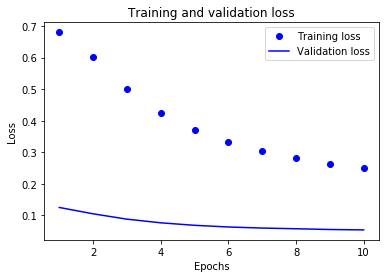

In [18]:
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

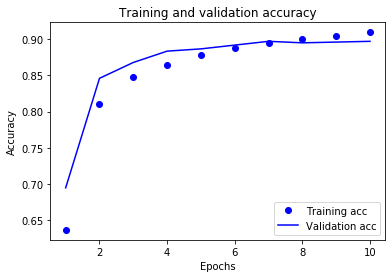

In [19]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

#### Model 3:

In [12]:
new_train_data3 = new_data[:40000]
new_train_label3 = new_label[:40000]

new_val_data3 = new_data[40000:45000]
new_val_label3 = new_label[40000:45000]

new_test_data3 = new_data[45000:]
new_test_label3 = new_label[45000:]

In [22]:
model = keras.Sequential([
    keras.layers.Embedding(len(d), 16),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(1, activation='sigmoid', kernel_regularizer=keras.regularizers.l2(0.02))
])

In [23]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [24]:
history = model.fit(new_train_data3, new_train_label3,
                    epochs=10,
                   validation_data=(new_val_data3, new_val_label3),
                   validation_steps=30)

Train on 40000 samples, validate on 5000 samples
Epoch 1/10
12000/40000 [========>.....................] - ETA: 16:47 - loss: 0.7699 - accuracy: 0.343 - ETA: 5:59 - loss: 0.7516 - accuracy: 0.520 - ETA: 3:50 - loss: 0.7554 - accuracy: 0.47 - ETA: 2:55 - loss: 0.7538 - accuracy: 0.49 - ETA: 2:25 - loss: 0.7555 - accuracy: 0.46 - ETA: 2:06 - loss: 0.7550 - accuracy: 0.46 - ETA: 1:53 - loss: 0.7537 - accuracy: 0.47 - ETA: 1:43 - loss: 0.7534 - accuracy: 0.47 - ETA: 1:35 - loss: 0.7534 - accuracy: 0.47 - ETA: 1:29 - loss: 0.7526 - accuracy: 0.48 - ETA: 1:24 - loss: 0.7520 - accuracy: 0.48 - ETA: 1:19 - loss: 0.7519 - accuracy: 0.47 - ETA: 1:16 - loss: 0.7513 - accuracy: 0.48 - ETA: 1:13 - loss: 0.7509 - accuracy: 0.48 - ETA: 1:10 - loss: 0.7506 - accuracy: 0.48 - ETA: 1:09 - loss: 0.7501 - accuracy: 0.49 - ETA: 1:07 - loss: 0.7497 - accuracy: 0.49 - ETA: 1:05 - loss: 0.7495 - accuracy: 0.49 - ETA: 1:03 - loss: 0.7494 - accuracy: 0.49 - ETA: 1:02 - loss: 0.7490 - accuracy: 0.49 - ETA: 1:01 

12256/40000 [========>.....................] - ETA: 34s - loss: 0.6931 - accuracy: 0.718 - ETA: 32s - loss: 0.6930 - accuracy: 0.854 - ETA: 32s - loss: 0.6930 - accuracy: 0.776 - ETA: 31s - loss: 0.6930 - accuracy: 0.756 - ETA: 31s - loss: 0.6930 - accuracy: 0.752 - ETA: 31s - loss: 0.6930 - accuracy: 0.752 - ETA: 31s - loss: 0.6930 - accuracy: 0.741 - ETA: 31s - loss: 0.6930 - accuracy: 0.724 - ETA: 31s - loss: 0.6930 - accuracy: 0.715 - ETA: 31s - loss: 0.6930 - accuracy: 0.694 - ETA: 32s - loss: 0.6931 - accuracy: 0.663 - ETA: 32s - loss: 0.6931 - accuracy: 0.647 - ETA: 33s - loss: 0.6931 - accuracy: 0.643 - ETA: 34s - loss: 0.6931 - accuracy: 0.640 - ETA: 34s - loss: 0.6931 - accuracy: 0.651 - ETA: 34s - loss: 0.6931 - accuracy: 0.645 - ETA: 35s - loss: 0.6931 - accuracy: 0.639 - ETA: 35s - loss: 0.6931 - accuracy: 0.632 - ETA: 35s - loss: 0.6931 - accuracy: 0.623 - ETA: 36s - loss: 0.6931 - accuracy: 0.615 - ETA: 36s - loss: 0.6931 - accuracy: 0.611 - ETA: 36s - loss: 0.6931 - acc

40000/40000 [==============================] - ETA: 2s - loss: 0.6929 - accuracy: 0.57 - ETA: 2s - loss: 0.6929 - accuracy: 0.57 - ETA: 2s - loss: 0.6929 - accuracy: 0.57 - ETA: 1s - loss: 0.6929 - accuracy: 0.57 - ETA: 1s - loss: 0.6928 - accuracy: 0.57 - ETA: 1s - loss: 0.6928 - accuracy: 0.57 - ETA: 1s - loss: 0.6928 - accuracy: 0.57 - ETA: 1s - loss: 0.6928 - accuracy: 0.57 - ETA: 1s - loss: 0.6928 - accuracy: 0.57 - ETA: 1s - loss: 0.6928 - accuracy: 0.57 - ETA: 1s - loss: 0.6929 - accuracy: 0.57 - ETA: 1s - loss: 0.6929 - accuracy: 0.57 - ETA: 1s - loss: 0.6929 - accuracy: 0.57 - ETA: 1s - loss: 0.6929 - accuracy: 0.57 - ETA: 1s - loss: 0.6929 - accuracy: 0.57 - ETA: 1s - loss: 0.6929 - accuracy: 0.57 - ETA: 1s - loss: 0.6929 - accuracy: 0.57 - ETA: 1s - loss: 0.6929 - accuracy: 0.57 - ETA: 1s - loss: 0.6929 - accuracy: 0.57 - ETA: 1s - loss: 0.6929 - accuracy: 0.57 - ETA: 1s - loss: 0.6929 - accuracy: 0.57 - ETA: 0s - loss: 0.6929 - accuracy: 0.57 - ETA: 0s - loss: 0.6929 - accu

11872/40000 [=======>......................] - ETA: 36s - loss: 0.6894 - accuracy: 0.750 - ETA: 36s - loss: 0.6888 - accuracy: 0.781 - ETA: 37s - loss: 0.6893 - accuracy: 0.775 - ETA: 37s - loss: 0.6894 - accuracy: 0.781 - ETA: 37s - loss: 0.6893 - accuracy: 0.788 - ETA: 36s - loss: 0.6891 - accuracy: 0.778 - ETA: 36s - loss: 0.6892 - accuracy: 0.769 - ETA: 36s - loss: 0.6893 - accuracy: 0.762 - ETA: 36s - loss: 0.6893 - accuracy: 0.759 - ETA: 36s - loss: 0.6894 - accuracy: 0.746 - ETA: 36s - loss: 0.6895 - accuracy: 0.735 - ETA: 36s - loss: 0.6896 - accuracy: 0.725 - ETA: 36s - loss: 0.6895 - accuracy: 0.721 - ETA: 36s - loss: 0.6897 - accuracy: 0.714 - ETA: 36s - loss: 0.6898 - accuracy: 0.701 - ETA: 36s - loss: 0.6898 - accuracy: 0.700 - ETA: 36s - loss: 0.6899 - accuracy: 0.690 - ETA: 36s - loss: 0.6900 - accuracy: 0.685 - ETA: 35s - loss: 0.6902 - accuracy: 0.683 - ETA: 35s - loss: 0.6903 - accuracy: 0.674 - ETA: 35s - loss: 0.6901 - accuracy: 0.679 - ETA: 35s - loss: 0.6900 - acc

40000/40000 [==============================] - ETA: 3s - loss: 0.6884 - accuracy: 0.70 - ETA: 3s - loss: 0.6884 - accuracy: 0.70 - ETA: 3s - loss: 0.6884 - accuracy: 0.70 - ETA: 3s - loss: 0.6884 - accuracy: 0.70 - ETA: 3s - loss: 0.6884 - accuracy: 0.70 - ETA: 2s - loss: 0.6884 - accuracy: 0.70 - ETA: 2s - loss: 0.6884 - accuracy: 0.70 - ETA: 2s - loss: 0.6884 - accuracy: 0.70 - ETA: 2s - loss: 0.6884 - accuracy: 0.70 - ETA: 2s - loss: 0.6884 - accuracy: 0.70 - ETA: 2s - loss: 0.6884 - accuracy: 0.70 - ETA: 2s - loss: 0.6884 - accuracy: 0.70 - ETA: 2s - loss: 0.6884 - accuracy: 0.70 - ETA: 2s - loss: 0.6883 - accuracy: 0.70 - ETA: 2s - loss: 0.6883 - accuracy: 0.70 - ETA: 2s - loss: 0.6883 - accuracy: 0.70 - ETA: 2s - loss: 0.6883 - accuracy: 0.70 - ETA: 2s - loss: 0.6883 - accuracy: 0.70 - ETA: 1s - loss: 0.6883 - accuracy: 0.70 - ETA: 1s - loss: 0.6883 - accuracy: 0.70 - ETA: 1s - loss: 0.6883 - accuracy: 0.70 - ETA: 1s - loss: 0.6883 - accuracy: 0.70 - ETA: 1s - loss: 0.6883 - accu

12000/40000 [========>.....................] - ETA: 34s - loss: 0.6831 - accuracy: 0.687 - ETA: 33s - loss: 0.6791 - accuracy: 0.729 - ETA: 33s - loss: 0.6789 - accuracy: 0.718 - ETA: 31s - loss: 0.6781 - accuracy: 0.726 - ETA: 32s - loss: 0.6785 - accuracy: 0.725 - ETA: 32s - loss: 0.6800 - accuracy: 0.716 - ETA: 32s - loss: 0.6805 - accuracy: 0.712 - ETA: 32s - loss: 0.6801 - accuracy: 0.710 - ETA: 32s - loss: 0.6799 - accuracy: 0.713 - ETA: 32s - loss: 0.6804 - accuracy: 0.706 - ETA: 33s - loss: 0.6806 - accuracy: 0.707 - ETA: 33s - loss: 0.6808 - accuracy: 0.707 - ETA: 33s - loss: 0.6810 - accuracy: 0.704 - ETA: 33s - loss: 0.6811 - accuracy: 0.708 - ETA: 33s - loss: 0.6812 - accuracy: 0.710 - ETA: 33s - loss: 0.6805 - accuracy: 0.718 - ETA: 33s - loss: 0.6802 - accuracy: 0.724 - ETA: 33s - loss: 0.6799 - accuracy: 0.728 - ETA: 32s - loss: 0.6798 - accuracy: 0.728 - ETA: 32s - loss: 0.6797 - accuracy: 0.732 - ETA: 32s - loss: 0.6792 - accuracy: 0.739 - ETA: 32s - loss: 0.6792 - acc

40000/40000 [==============================] - ETA: 3s - loss: 0.6763 - accuracy: 0.81 - ETA: 3s - loss: 0.6764 - accuracy: 0.81 - ETA: 3s - loss: 0.6763 - accuracy: 0.81 - ETA: 2s - loss: 0.6763 - accuracy: 0.81 - ETA: 2s - loss: 0.6763 - accuracy: 0.81 - ETA: 2s - loss: 0.6763 - accuracy: 0.81 - ETA: 2s - loss: 0.6764 - accuracy: 0.81 - ETA: 2s - loss: 0.6763 - accuracy: 0.81 - ETA: 2s - loss: 0.6763 - accuracy: 0.81 - ETA: 2s - loss: 0.6763 - accuracy: 0.81 - ETA: 2s - loss: 0.6763 - accuracy: 0.81 - ETA: 2s - loss: 0.6763 - accuracy: 0.81 - ETA: 2s - loss: 0.6763 - accuracy: 0.81 - ETA: 2s - loss: 0.6763 - accuracy: 0.81 - ETA: 2s - loss: 0.6763 - accuracy: 0.81 - ETA: 2s - loss: 0.6763 - accuracy: 0.81 - ETA: 2s - loss: 0.6763 - accuracy: 0.81 - ETA: 2s - loss: 0.6763 - accuracy: 0.81 - ETA: 2s - loss: 0.6763 - accuracy: 0.81 - ETA: 1s - loss: 0.6763 - accuracy: 0.81 - ETA: 1s - loss: 0.6763 - accuracy: 0.81 - ETA: 1s - loss: 0.6763 - accuracy: 0.81 - ETA: 1s - loss: 0.6763 - accu

11712/40000 [=======>......................] - ETA: 34s - loss: 0.6736 - accuracy: 0.843 - ETA: 35s - loss: 0.6742 - accuracy: 0.781 - ETA: 35s - loss: 0.6704 - accuracy: 0.800 - ETA: 35s - loss: 0.6721 - accuracy: 0.808 - ETA: 35s - loss: 0.6704 - accuracy: 0.819 - ETA: 35s - loss: 0.6668 - accuracy: 0.832 - ETA: 35s - loss: 0.6675 - accuracy: 0.826 - ETA: 35s - loss: 0.6658 - accuracy: 0.822 - ETA: 35s - loss: 0.6662 - accuracy: 0.810 - ETA: 36s - loss: 0.6662 - accuracy: 0.817 - ETA: 36s - loss: 0.6669 - accuracy: 0.814 - ETA: 36s - loss: 0.6684 - accuracy: 0.811 - ETA: 36s - loss: 0.6675 - accuracy: 0.815 - ETA: 37s - loss: 0.6672 - accuracy: 0.818 - ETA: 37s - loss: 0.6666 - accuracy: 0.820 - ETA: 37s - loss: 0.6662 - accuracy: 0.823 - ETA: 37s - loss: 0.6668 - accuracy: 0.820 - ETA: 37s - loss: 0.6663 - accuracy: 0.818 - ETA: 37s - loss: 0.6666 - accuracy: 0.817 - ETA: 37s - loss: 0.6676 - accuracy: 0.814 - ETA: 37s - loss: 0.6669 - accuracy: 0.814 - ETA: 37s - loss: 0.6662 - acc

40000/40000 [==============================] - ETA: 4s - loss: 0.6610 - accuracy: 0.82 - ETA: 4s - loss: 0.6611 - accuracy: 0.82 - ETA: 4s - loss: 0.6611 - accuracy: 0.82 - ETA: 3s - loss: 0.6610 - accuracy: 0.82 - ETA: 3s - loss: 0.6611 - accuracy: 0.82 - ETA: 3s - loss: 0.6611 - accuracy: 0.82 - ETA: 3s - loss: 0.6611 - accuracy: 0.82 - ETA: 3s - loss: 0.6611 - accuracy: 0.82 - ETA: 3s - loss: 0.6611 - accuracy: 0.82 - ETA: 3s - loss: 0.6611 - accuracy: 0.82 - ETA: 3s - loss: 0.6611 - accuracy: 0.82 - ETA: 3s - loss: 0.6611 - accuracy: 0.82 - ETA: 3s - loss: 0.6611 - accuracy: 0.82 - ETA: 3s - loss: 0.6611 - accuracy: 0.82 - ETA: 3s - loss: 0.6611 - accuracy: 0.82 - ETA: 3s - loss: 0.6610 - accuracy: 0.82 - ETA: 3s - loss: 0.6610 - accuracy: 0.82 - ETA: 3s - loss: 0.6610 - accuracy: 0.82 - ETA: 3s - loss: 0.6610 - accuracy: 0.82 - ETA: 2s - loss: 0.6610 - accuracy: 0.82 - ETA: 2s - loss: 0.6610 - accuracy: 0.82 - ETA: 2s - loss: 0.6610 - accuracy: 0.82 - ETA: 2s - loss: 0.6610 - accu

11872/40000 [=======>......................] - ETA: 38s - loss: 0.6689 - accuracy: 0.750 - ETA: 39s - loss: 0.6543 - accuracy: 0.854 - ETA: 39s - loss: 0.6597 - accuracy: 0.825 - ETA: 38s - loss: 0.6558 - accuracy: 0.848 - ETA: 38s - loss: 0.6563 - accuracy: 0.833 - ETA: 39s - loss: 0.6549 - accuracy: 0.829 - ETA: 40s - loss: 0.6545 - accuracy: 0.826 - ETA: 41s - loss: 0.6574 - accuracy: 0.814 - ETA: 40s - loss: 0.6540 - accuracy: 0.825 - ETA: 40s - loss: 0.6538 - accuracy: 0.822 - ETA: 40s - loss: 0.6533 - accuracy: 0.822 - ETA: 40s - loss: 0.6543 - accuracy: 0.816 - ETA: 39s - loss: 0.6538 - accuracy: 0.815 - ETA: 40s - loss: 0.6533 - accuracy: 0.817 - ETA: 40s - loss: 0.6529 - accuracy: 0.815 - ETA: 40s - loss: 0.6505 - accuracy: 0.823 - ETA: 40s - loss: 0.6519 - accuracy: 0.819 - ETA: 40s - loss: 0.6524 - accuracy: 0.817 - ETA: 40s - loss: 0.6528 - accuracy: 0.816 - ETA: 40s - loss: 0.6531 - accuracy: 0.815 - ETA: 40s - loss: 0.6524 - accuracy: 0.817 - ETA: 40s - loss: 0.6522 - acc

40000/40000 [==============================] - ETA: 3s - loss: 0.6449 - accuracy: 0.83 - ETA: 3s - loss: 0.6449 - accuracy: 0.83 - ETA: 3s - loss: 0.6449 - accuracy: 0.83 - ETA: 3s - loss: 0.6449 - accuracy: 0.83 - ETA: 3s - loss: 0.6449 - accuracy: 0.83 - ETA: 3s - loss: 0.6448 - accuracy: 0.83 - ETA: 3s - loss: 0.6448 - accuracy: 0.83 - ETA: 3s - loss: 0.6448 - accuracy: 0.83 - ETA: 3s - loss: 0.6448 - accuracy: 0.83 - ETA: 3s - loss: 0.6448 - accuracy: 0.83 - ETA: 3s - loss: 0.6448 - accuracy: 0.83 - ETA: 3s - loss: 0.6448 - accuracy: 0.83 - ETA: 3s - loss: 0.6448 - accuracy: 0.83 - ETA: 3s - loss: 0.6448 - accuracy: 0.83 - ETA: 3s - loss: 0.6448 - accuracy: 0.83 - ETA: 2s - loss: 0.6448 - accuracy: 0.83 - ETA: 2s - loss: 0.6448 - accuracy: 0.83 - ETA: 2s - loss: 0.6448 - accuracy: 0.83 - ETA: 2s - loss: 0.6448 - accuracy: 0.83 - ETA: 2s - loss: 0.6447 - accuracy: 0.83 - ETA: 2s - loss: 0.6447 - accuracy: 0.83 - ETA: 2s - loss: 0.6447 - accuracy: 0.83 - ETA: 2s - loss: 0.6447 - accu

In [25]:
loss, accuracy = model.evaluate(new_test_data, new_test_label)

5000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

 - 1s 171us/sample - loss: 0.6786 - accuracy: 0.8316


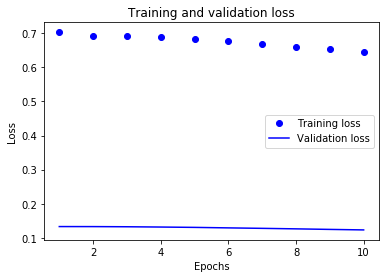

In [26]:
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

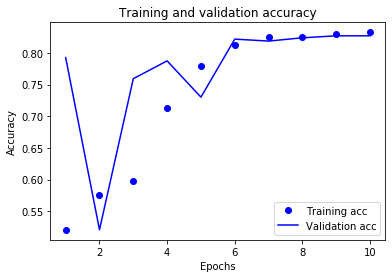

In [27]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

#### Model 4:

In [29]:
model = keras.Sequential([
    keras.layers.Embedding(len(d), 16),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(16, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(1, activation='sigmoid')
])

In [30]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [31]:
history = model.fit(new_train_data3, new_train_label3,
                    epochs=10,
                   validation_data=(new_val_data3, new_val_label3),
                   validation_steps=30)

Train on 40000 samples, validate on 5000 samples
Epoch 1/10
11744/40000 [=======>......................] - ETA: 18:58 - loss: 0.7100 - accuracy: 0.531 - ETA: 6:44 - loss: 0.7099 - accuracy: 0.531 - ETA: 4:17 - loss: 0.7098 - accuracy: 0.52 - ETA: 3:14 - loss: 0.7099 - accuracy: 0.51 - ETA: 2:39 - loss: 0.7096 - accuracy: 0.51 - ETA: 2:17 - loss: 0.7097 - accuracy: 0.50 - ETA: 2:01 - loss: 0.7097 - accuracy: 0.50 - ETA: 1:50 - loss: 0.7098 - accuracy: 0.49 - ETA: 1:41 - loss: 0.7096 - accuracy: 0.49 - ETA: 1:34 - loss: 0.7094 - accuracy: 0.49 - ETA: 1:28 - loss: 0.7093 - accuracy: 0.50 - ETA: 1:24 - loss: 0.7092 - accuracy: 0.50 - ETA: 1:20 - loss: 0.7091 - accuracy: 0.49 - ETA: 1:17 - loss: 0.7091 - accuracy: 0.49 - ETA: 1:14 - loss: 0.7089 - accuracy: 0.49 - ETA: 1:11 - loss: 0.7088 - accuracy: 0.49 - ETA: 1:09 - loss: 0.7086 - accuracy: 0.50 - ETA: 1:07 - loss: 0.7084 - accuracy: 0.51 - ETA: 1:06 - loss: 0.7084 - accuracy: 0.51 - ETA: 1:04 - loss: 0.7083 - accuracy: 0.50 - ETA: 1:03 

11904/40000 [=======>......................] - ETA: 33s - loss: 0.5536 - accuracy: 0.906 - ETA: 33s - loss: 0.5682 - accuracy: 0.843 - ETA: 34s - loss: 0.5673 - accuracy: 0.843 - ETA: 34s - loss: 0.5657 - accuracy: 0.852 - ETA: 33s - loss: 0.5641 - accuracy: 0.850 - ETA: 33s - loss: 0.5702 - accuracy: 0.829 - ETA: 33s - loss: 0.5699 - accuracy: 0.814 - ETA: 33s - loss: 0.5698 - accuracy: 0.804 - ETA: 33s - loss: 0.5673 - accuracy: 0.796 - ETA: 33s - loss: 0.5647 - accuracy: 0.792 - ETA: 33s - loss: 0.5647 - accuracy: 0.797 - ETA: 33s - loss: 0.5692 - accuracy: 0.794 - ETA: 33s - loss: 0.5706 - accuracy: 0.796 - ETA: 33s - loss: 0.5694 - accuracy: 0.795 - ETA: 33s - loss: 0.5683 - accuracy: 0.797 - ETA: 33s - loss: 0.5645 - accuracy: 0.797 - ETA: 33s - loss: 0.5655 - accuracy: 0.799 - ETA: 33s - loss: 0.5672 - accuracy: 0.797 - ETA: 33s - loss: 0.5650 - accuracy: 0.799 - ETA: 32s - loss: 0.5640 - accuracy: 0.802 - ETA: 33s - loss: 0.5634 - accuracy: 0.805 - ETA: 33s - loss: 0.5633 - acc

40000/40000 [==============================] - ETA: 2s - loss: 0.4748 - accuracy: 0.85 - ETA: 2s - loss: 0.4748 - accuracy: 0.85 - ETA: 2s - loss: 0.4746 - accuracy: 0.85 - ETA: 2s - loss: 0.4745 - accuracy: 0.85 - ETA: 2s - loss: 0.4744 - accuracy: 0.85 - ETA: 2s - loss: 0.4743 - accuracy: 0.85 - ETA: 2s - loss: 0.4742 - accuracy: 0.85 - ETA: 2s - loss: 0.4742 - accuracy: 0.85 - ETA: 1s - loss: 0.4742 - accuracy: 0.85 - ETA: 1s - loss: 0.4740 - accuracy: 0.85 - ETA: 1s - loss: 0.4739 - accuracy: 0.85 - ETA: 1s - loss: 0.4738 - accuracy: 0.85 - ETA: 1s - loss: 0.4737 - accuracy: 0.85 - ETA: 1s - loss: 0.4736 - accuracy: 0.85 - ETA: 1s - loss: 0.4734 - accuracy: 0.85 - ETA: 1s - loss: 0.4733 - accuracy: 0.85 - ETA: 1s - loss: 0.4731 - accuracy: 0.85 - ETA: 1s - loss: 0.4731 - accuracy: 0.85 - ETA: 1s - loss: 0.4731 - accuracy: 0.85 - ETA: 1s - loss: 0.4730 - accuracy: 0.85 - ETA: 1s - loss: 0.4727 - accuracy: 0.85 - ETA: 1s - loss: 0.4724 - accuracy: 0.85 - ETA: 1s - loss: 0.4723 - accu

12800/40000 [========>.....................] - ETA: 33s - loss: 0.3620 - accuracy: 0.906 - ETA: 31s - loss: 0.3081 - accuracy: 0.953 - ETA: 31s - loss: 0.3221 - accuracy: 0.932 - ETA: 32s - loss: 0.3309 - accuracy: 0.925 - ETA: 32s - loss: 0.3346 - accuracy: 0.928 - ETA: 31s - loss: 0.3288 - accuracy: 0.925 - ETA: 31s - loss: 0.3225 - accuracy: 0.925 - ETA: 31s - loss: 0.3189 - accuracy: 0.922 - ETA: 31s - loss: 0.3193 - accuracy: 0.924 - ETA: 31s - loss: 0.3192 - accuracy: 0.923 - ETA: 31s - loss: 0.3270 - accuracy: 0.914 - ETA: 31s - loss: 0.3347 - accuracy: 0.911 - ETA: 31s - loss: 0.3335 - accuracy: 0.909 - ETA: 31s - loss: 0.3298 - accuracy: 0.909 - ETA: 31s - loss: 0.3294 - accuracy: 0.910 - ETA: 31s - loss: 0.3297 - accuracy: 0.911 - ETA: 31s - loss: 0.3313 - accuracy: 0.908 - ETA: 31s - loss: 0.3310 - accuracy: 0.909 - ETA: 31s - loss: 0.3326 - accuracy: 0.908 - ETA: 31s - loss: 0.3343 - accuracy: 0.908 - ETA: 31s - loss: 0.3352 - accuracy: 0.908 - ETA: 31s - loss: 0.3355 - acc

16288/40000 [===========>..................] - ETA: 23s - loss: 0.3791 - accuracy: 0.906 - ETA: 23s - loss: 0.3146 - accuracy: 0.921 - ETA: 22s - loss: 0.3003 - accuracy: 0.924 - ETA: 23s - loss: 0.3147 - accuracy: 0.906 - ETA: 23s - loss: 0.3162 - accuracy: 0.903 - ETA: 22s - loss: 0.2979 - accuracy: 0.916 - ETA: 23s - loss: 0.2977 - accuracy: 0.912 - ETA: 23s - loss: 0.2994 - accuracy: 0.911 - ETA: 24s - loss: 0.3002 - accuracy: 0.912 - ETA: 25s - loss: 0.2979 - accuracy: 0.911 - ETA: 26s - loss: 0.3003 - accuracy: 0.910 - ETA: 26s - loss: 0.3005 - accuracy: 0.908 - ETA: 26s - loss: 0.2977 - accuracy: 0.912 - ETA: 25s - loss: 0.2947 - accuracy: 0.913 - ETA: 25s - loss: 0.2971 - accuracy: 0.911 - ETA: 25s - loss: 0.2974 - accuracy: 0.909 - ETA: 25s - loss: 0.2991 - accuracy: 0.908 - ETA: 25s - loss: 0.3003 - accuracy: 0.909 - ETA: 24s - loss: 0.2990 - accuracy: 0.909 - ETA: 24s - loss: 0.3009 - accuracy: 0.908 - ETA: 24s - loss: 0.3029 - accuracy: 0.907 - ETA: 24s - loss: 0.3036 - acc

40000/40000 [==============================] - ETA: 4s - loss: 0.3111 - accuracy: 0.90 - ETA: 4s - loss: 0.3112 - accuracy: 0.90 - ETA: 4s - loss: 0.3115 - accuracy: 0.90 - ETA: 3s - loss: 0.3115 - accuracy: 0.90 - ETA: 3s - loss: 0.3115 - accuracy: 0.90 - ETA: 3s - loss: 0.3115 - accuracy: 0.90 - ETA: 3s - loss: 0.3114 - accuracy: 0.90 - ETA: 3s - loss: 0.3113 - accuracy: 0.90 - ETA: 3s - loss: 0.3110 - accuracy: 0.90 - ETA: 3s - loss: 0.3113 - accuracy: 0.90 - ETA: 3s - loss: 0.3115 - accuracy: 0.90 - ETA: 3s - loss: 0.3114 - accuracy: 0.90 - ETA: 3s - loss: 0.3116 - accuracy: 0.90 - ETA: 3s - loss: 0.3112 - accuracy: 0.90 - ETA: 3s - loss: 0.3111 - accuracy: 0.90 - ETA: 3s - loss: 0.3111 - accuracy: 0.90 - ETA: 3s - loss: 0.3111 - accuracy: 0.90 - ETA: 3s - loss: 0.3110 - accuracy: 0.90 - ETA: 3s - loss: 0.3108 - accuracy: 0.90 - ETA: 2s - loss: 0.3108 - accuracy: 0.90 - ETA: 2s - loss: 0.3107 - accuracy: 0.90 - ETA: 2s - loss: 0.3107 - accuracy: 0.90 - ETA: 2s - loss: 0.3108 - accu

16512/40000 [===========>..................] - ETA: 23s - loss: 0.3031 - accuracy: 0.875 - ETA: 24s - loss: 0.2759 - accuracy: 0.906 - ETA: 26s - loss: 0.2571 - accuracy: 0.910 - ETA: 28s - loss: 0.2676 - accuracy: 0.902 - ETA: 28s - loss: 0.2686 - accuracy: 0.903 - ETA: 28s - loss: 0.2770 - accuracy: 0.904 - ETA: 28s - loss: 0.2815 - accuracy: 0.900 - ETA: 27s - loss: 0.2747 - accuracy: 0.898 - ETA: 27s - loss: 0.2682 - accuracy: 0.903 - ETA: 27s - loss: 0.2638 - accuracy: 0.908 - ETA: 27s - loss: 0.2665 - accuracy: 0.908 - ETA: 27s - loss: 0.2600 - accuracy: 0.913 - ETA: 27s - loss: 0.2557 - accuracy: 0.917 - ETA: 26s - loss: 0.2593 - accuracy: 0.913 - ETA: 26s - loss: 0.2635 - accuracy: 0.912 - ETA: 26s - loss: 0.2597 - accuracy: 0.916 - ETA: 26s - loss: 0.2626 - accuracy: 0.914 - ETA: 26s - loss: 0.2626 - accuracy: 0.915 - ETA: 26s - loss: 0.2604 - accuracy: 0.916 - ETA: 26s - loss: 0.2606 - accuracy: 0.915 - ETA: 26s - loss: 0.2630 - accuracy: 0.914 - ETA: 26s - loss: 0.2639 - acc

40000/40000 [==============================] - ETA: 5s - loss: 0.2719 - accuracy: 0.91 - ETA: 5s - loss: 0.2719 - accuracy: 0.91 - ETA: 4s - loss: 0.2718 - accuracy: 0.91 - ETA: 4s - loss: 0.2718 - accuracy: 0.91 - ETA: 4s - loss: 0.2718 - accuracy: 0.91 - ETA: 4s - loss: 0.2717 - accuracy: 0.91 - ETA: 4s - loss: 0.2718 - accuracy: 0.91 - ETA: 4s - loss: 0.2719 - accuracy: 0.91 - ETA: 4s - loss: 0.2719 - accuracy: 0.91 - ETA: 4s - loss: 0.2720 - accuracy: 0.91 - ETA: 4s - loss: 0.2718 - accuracy: 0.91 - ETA: 4s - loss: 0.2719 - accuracy: 0.91 - ETA: 4s - loss: 0.2718 - accuracy: 0.91 - ETA: 4s - loss: 0.2716 - accuracy: 0.91 - ETA: 4s - loss: 0.2717 - accuracy: 0.91 - ETA: 4s - loss: 0.2715 - accuracy: 0.91 - ETA: 3s - loss: 0.2717 - accuracy: 0.91 - ETA: 3s - loss: 0.2719 - accuracy: 0.91 - ETA: 3s - loss: 0.2721 - accuracy: 0.91 - ETA: 3s - loss: 0.2721 - accuracy: 0.91 - ETA: 3s - loss: 0.2721 - accuracy: 0.91 - ETA: 3s - loss: 0.2719 - accuracy: 0.91 - ETA: 3s - loss: 0.2719 - accu

15584/40000 [==========>...................] - ETA: 26s - loss: 0.2950 - accuracy: 0.937 - ETA: 30s - loss: 0.2640 - accuracy: 0.937 - ETA: 30s - loss: 0.2571 - accuracy: 0.937 - ETA: 30s - loss: 0.2491 - accuracy: 0.934 - ETA: 29s - loss: 0.2510 - accuracy: 0.932 - ETA: 29s - loss: 0.2549 - accuracy: 0.929 - ETA: 29s - loss: 0.2574 - accuracy: 0.928 - ETA: 29s - loss: 0.2547 - accuracy: 0.927 - ETA: 30s - loss: 0.2562 - accuracy: 0.927 - ETA: 31s - loss: 0.2515 - accuracy: 0.929 - ETA: 31s - loss: 0.2429 - accuracy: 0.935 - ETA: 31s - loss: 0.2430 - accuracy: 0.934 - ETA: 31s - loss: 0.2408 - accuracy: 0.935 - ETA: 31s - loss: 0.2412 - accuracy: 0.936 - ETA: 31s - loss: 0.2405 - accuracy: 0.936 - ETA: 31s - loss: 0.2391 - accuracy: 0.937 - ETA: 31s - loss: 0.2430 - accuracy: 0.935 - ETA: 32s - loss: 0.2424 - accuracy: 0.933 - ETA: 32s - loss: 0.2436 - accuracy: 0.932 - ETA: 32s - loss: 0.2409 - accuracy: 0.932 - ETA: 32s - loss: 0.2425 - accuracy: 0.931 - ETA: 31s - loss: 0.2440 - acc

40000/40000 [==============================] - ETA: 4s - loss: 0.2463 - accuracy: 0.92 - ETA: 4s - loss: 0.2461 - accuracy: 0.92 - ETA: 4s - loss: 0.2460 - accuracy: 0.92 - ETA: 4s - loss: 0.2461 - accuracy: 0.92 - ETA: 4s - loss: 0.2461 - accuracy: 0.92 - ETA: 4s - loss: 0.2462 - accuracy: 0.92 - ETA: 4s - loss: 0.2460 - accuracy: 0.92 - ETA: 4s - loss: 0.2460 - accuracy: 0.92 - ETA: 4s - loss: 0.2459 - accuracy: 0.92 - ETA: 4s - loss: 0.2459 - accuracy: 0.92 - ETA: 4s - loss: 0.2460 - accuracy: 0.92 - ETA: 4s - loss: 0.2460 - accuracy: 0.92 - ETA: 3s - loss: 0.2459 - accuracy: 0.92 - ETA: 3s - loss: 0.2458 - accuracy: 0.92 - ETA: 3s - loss: 0.2459 - accuracy: 0.92 - ETA: 3s - loss: 0.2459 - accuracy: 0.92 - ETA: 3s - loss: 0.2461 - accuracy: 0.92 - ETA: 3s - loss: 0.2459 - accuracy: 0.92 - ETA: 3s - loss: 0.2460 - accuracy: 0.92 - ETA: 3s - loss: 0.2460 - accuracy: 0.92 - ETA: 3s - loss: 0.2459 - accuracy: 0.92 - ETA: 3s - loss: 0.2460 - accuracy: 0.92 - ETA: 3s - loss: 0.2460 - accu

In [32]:
loss, accuracy = model.evaluate(new_test_data3, new_test_label3)

5000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

 - 1s 117us/sample - loss: 0.5870 - accuracy: 0.8950


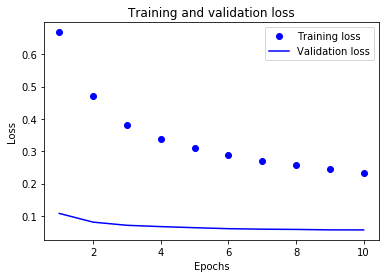

In [33]:
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

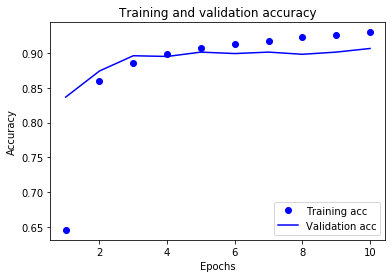

In [34]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

#### Model 5 :

In [35]:
model = keras.Sequential([
    keras.layers.Embedding(len(d), 16),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(8, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(1, activation='sigmoid')
])

In [36]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [37]:
history = model.fit(new_train_data3, new_train_label3,
                    epochs=10,
                   validation_data=(new_val_data3, new_val_label3),
                   validation_steps=30)

Train on 40000 samples, validate on 5000 samples
Epoch 1/10
15616/40000 [==========>...................] - ETA: 6:43 - loss: 0.7065 - accuracy: 0.43 - ETA: 2:02 - loss: 0.7048 - accuracy: 0.47 - ETA: 1:22 - loss: 0.7044 - accuracy: 0.47 - ETA: 1:06 - loss: 0.7041 - accuracy: 0.48 - ETA: 56s - loss: 0.7041 - accuracy: 0.4567 - ETA: 51s - loss: 0.7039 - accuracy: 0.466 - ETA: 47s - loss: 0.7036 - accuracy: 0.485 - ETA: 44s - loss: 0.7033 - accuracy: 0.498 - ETA: 42s - loss: 0.7030 - accuracy: 0.506 - ETA: 41s - loss: 0.7030 - accuracy: 0.504 - ETA: 40s - loss: 0.7031 - accuracy: 0.501 - ETA: 39s - loss: 0.7027 - accuracy: 0.509 - ETA: 39s - loss: 0.7027 - accuracy: 0.508 - ETA: 38s - loss: 0.7026 - accuracy: 0.510 - ETA: 37s - loss: 0.7026 - accuracy: 0.508 - ETA: 37s - loss: 0.7024 - accuracy: 0.511 - ETA: 36s - loss: 0.7023 - accuracy: 0.512 - ETA: 36s - loss: 0.7021 - accuracy: 0.516 - ETA: 35s - loss: 0.7023 - accuracy: 0.510 - ETA: 35s - loss: 0.7021 - accuracy: 0.513 - ETA: 34s - l

16640/40000 [===========>..................] - ETA: 23s - loss: 0.6637 - accuracy: 0.750 - ETA: 24s - loss: 0.6604 - accuracy: 0.765 - ETA: 24s - loss: 0.6613 - accuracy: 0.781 - ETA: 24s - loss: 0.6618 - accuracy: 0.778 - ETA: 26s - loss: 0.6643 - accuracy: 0.776 - ETA: 26s - loss: 0.6631 - accuracy: 0.793 - ETA: 25s - loss: 0.6629 - accuracy: 0.796 - ETA: 25s - loss: 0.6622 - accuracy: 0.799 - ETA: 25s - loss: 0.6621 - accuracy: 0.782 - ETA: 25s - loss: 0.6610 - accuracy: 0.783 - ETA: 25s - loss: 0.6605 - accuracy: 0.776 - ETA: 25s - loss: 0.6598 - accuracy: 0.777 - ETA: 24s - loss: 0.6591 - accuracy: 0.781 - ETA: 24s - loss: 0.6576 - accuracy: 0.788 - ETA: 24s - loss: 0.6570 - accuracy: 0.793 - ETA: 24s - loss: 0.6567 - accuracy: 0.796 - ETA: 24s - loss: 0.6564 - accuracy: 0.797 - ETA: 24s - loss: 0.6559 - accuracy: 0.797 - ETA: 24s - loss: 0.6558 - accuracy: 0.799 - ETA: 24s - loss: 0.6551 - accuracy: 0.797 - ETA: 24s - loss: 0.6543 - accuracy: 0.798 - ETA: 23s - loss: 0.6544 - acc

40000/40000 [==============================] - ETA: 4s - loss: 0.5626 - accuracy: 0.82 - ETA: 4s - loss: 0.5624 - accuracy: 0.82 - ETA: 4s - loss: 0.5622 - accuracy: 0.82 - ETA: 3s - loss: 0.5619 - accuracy: 0.82 - ETA: 3s - loss: 0.5617 - accuracy: 0.82 - ETA: 3s - loss: 0.5617 - accuracy: 0.82 - ETA: 3s - loss: 0.5615 - accuracy: 0.82 - ETA: 3s - loss: 0.5612 - accuracy: 0.82 - ETA: 3s - loss: 0.5610 - accuracy: 0.82 - ETA: 3s - loss: 0.5608 - accuracy: 0.82 - ETA: 3s - loss: 0.5605 - accuracy: 0.82 - ETA: 3s - loss: 0.5603 - accuracy: 0.82 - ETA: 3s - loss: 0.5602 - accuracy: 0.82 - ETA: 3s - loss: 0.5600 - accuracy: 0.82 - ETA: 3s - loss: 0.5598 - accuracy: 0.82 - ETA: 3s - loss: 0.5595 - accuracy: 0.82 - ETA: 3s - loss: 0.5592 - accuracy: 0.82 - ETA: 3s - loss: 0.5590 - accuracy: 0.82 - ETA: 3s - loss: 0.5588 - accuracy: 0.82 - ETA: 2s - loss: 0.5585 - accuracy: 0.82 - ETA: 2s - loss: 0.5583 - accuracy: 0.82 - ETA: 2s - loss: 0.5580 - accuracy: 0.82 - ETA: 2s - loss: 0.5579 - accu

16736/40000 [===========>..................] - ETA: 22s - loss: 0.3876 - accuracy: 0.937 - ETA: 24s - loss: 0.4243 - accuracy: 0.875 - ETA: 24s - loss: 0.4021 - accuracy: 0.892 - ETA: 24s - loss: 0.4016 - accuracy: 0.884 - ETA: 24s - loss: 0.4006 - accuracy: 0.879 - ETA: 24s - loss: 0.3912 - accuracy: 0.880 - ETA: 24s - loss: 0.3867 - accuracy: 0.881 - ETA: 24s - loss: 0.3848 - accuracy: 0.882 - ETA: 24s - loss: 0.3802 - accuracy: 0.887 - ETA: 24s - loss: 0.3804 - accuracy: 0.885 - ETA: 24s - loss: 0.3789 - accuracy: 0.889 - ETA: 24s - loss: 0.3760 - accuracy: 0.894 - ETA: 24s - loss: 0.3742 - accuracy: 0.893 - ETA: 23s - loss: 0.3725 - accuracy: 0.895 - ETA: 23s - loss: 0.3728 - accuracy: 0.895 - ETA: 23s - loss: 0.3766 - accuracy: 0.896 - ETA: 23s - loss: 0.3782 - accuracy: 0.896 - ETA: 23s - loss: 0.3795 - accuracy: 0.894 - ETA: 23s - loss: 0.3808 - accuracy: 0.893 - ETA: 23s - loss: 0.3834 - accuracy: 0.892 - ETA: 23s - loss: 0.3832 - accuracy: 0.892 - ETA: 23s - loss: 0.3827 - acc

40000/40000 [==============================] - ETA: 3s - loss: 0.3702 - accuracy: 0.88 - ETA: 3s - loss: 0.3702 - accuracy: 0.88 - ETA: 3s - loss: 0.3701 - accuracy: 0.88 - ETA: 3s - loss: 0.3701 - accuracy: 0.88 - ETA: 3s - loss: 0.3701 - accuracy: 0.88 - ETA: 3s - loss: 0.3699 - accuracy: 0.88 - ETA: 3s - loss: 0.3700 - accuracy: 0.88 - ETA: 3s - loss: 0.3699 - accuracy: 0.88 - ETA: 3s - loss: 0.3698 - accuracy: 0.88 - ETA: 3s - loss: 0.3698 - accuracy: 0.88 - ETA: 3s - loss: 0.3698 - accuracy: 0.88 - ETA: 3s - loss: 0.3698 - accuracy: 0.88 - ETA: 3s - loss: 0.3700 - accuracy: 0.88 - ETA: 3s - loss: 0.3699 - accuracy: 0.88 - ETA: 2s - loss: 0.3698 - accuracy: 0.88 - ETA: 2s - loss: 0.3696 - accuracy: 0.88 - ETA: 2s - loss: 0.3695 - accuracy: 0.88 - ETA: 2s - loss: 0.3696 - accuracy: 0.88 - ETA: 2s - loss: 0.3695 - accuracy: 0.88 - ETA: 2s - loss: 0.3696 - accuracy: 0.88 - ETA: 2s - loss: 0.3696 - accuracy: 0.88 - ETA: 2s - loss: 0.3695 - accuracy: 0.88 - ETA: 2s - loss: 0.3696 - accu

14112/40000 [=========>....................] - ETA: 28s - loss: 0.2766 - accuracy: 0.937 - ETA: 27s - loss: 0.2987 - accuracy: 0.937 - ETA: 26s - loss: 0.2998 - accuracy: 0.933 - ETA: 27s - loss: 0.2838 - accuracy: 0.937 - ETA: 27s - loss: 0.2960 - accuracy: 0.925 - ETA: 27s - loss: 0.3007 - accuracy: 0.923 - ETA: 27s - loss: 0.3097 - accuracy: 0.919 - ETA: 27s - loss: 0.3058 - accuracy: 0.923 - ETA: 27s - loss: 0.3065 - accuracy: 0.917 - ETA: 27s - loss: 0.3109 - accuracy: 0.916 - ETA: 27s - loss: 0.3112 - accuracy: 0.916 - ETA: 28s - loss: 0.3068 - accuracy: 0.915 - ETA: 28s - loss: 0.3086 - accuracy: 0.914 - ETA: 29s - loss: 0.3073 - accuracy: 0.914 - ETA: 29s - loss: 0.3060 - accuracy: 0.914 - ETA: 29s - loss: 0.3087 - accuracy: 0.914 - ETA: 28s - loss: 0.3051 - accuracy: 0.917 - ETA: 28s - loss: 0.3044 - accuracy: 0.918 - ETA: 28s - loss: 0.3070 - accuracy: 0.915 - ETA: 28s - loss: 0.3058 - accuracy: 0.914 - ETA: 28s - loss: 0.3031 - accuracy: 0.915 - ETA: 28s - loss: 0.3022 - acc

40000/40000 [==============================] - ETA: 8s - loss: 0.3150 - accuracy: 0.90 - ETA: 8s - loss: 0.3150 - accuracy: 0.90 - ETA: 8s - loss: 0.3150 - accuracy: 0.90 - ETA: 8s - loss: 0.3149 - accuracy: 0.90 - ETA: 8s - loss: 0.3148 - accuracy: 0.90 - ETA: 7s - loss: 0.3150 - accuracy: 0.90 - ETA: 7s - loss: 0.3151 - accuracy: 0.90 - ETA: 7s - loss: 0.3151 - accuracy: 0.90 - ETA: 7s - loss: 0.3151 - accuracy: 0.90 - ETA: 7s - loss: 0.3151 - accuracy: 0.90 - ETA: 7s - loss: 0.3153 - accuracy: 0.90 - ETA: 7s - loss: 0.3153 - accuracy: 0.90 - ETA: 7s - loss: 0.3153 - accuracy: 0.90 - ETA: 7s - loss: 0.3152 - accuracy: 0.90 - ETA: 7s - loss: 0.3156 - accuracy: 0.90 - ETA: 7s - loss: 0.3157 - accuracy: 0.90 - ETA: 7s - loss: 0.3156 - accuracy: 0.90 - ETA: 7s - loss: 0.3157 - accuracy: 0.90 - ETA: 7s - loss: 0.3158 - accuracy: 0.90 - ETA: 6s - loss: 0.3157 - accuracy: 0.90 - ETA: 6s - loss: 0.3155 - accuracy: 0.90 - ETA: 6s - loss: 0.3153 - accuracy: 0.90 - ETA: 6s - loss: 0.3153 - accu

14080/40000 [=========>....................] - ETA: 32s - loss: 0.2669 - accuracy: 0.875 - ETA: 34s - loss: 0.2690 - accuracy: 0.906 - ETA: 36s - loss: 0.2835 - accuracy: 0.900 - ETA: 36s - loss: 0.3075 - accuracy: 0.892 - ETA: 37s - loss: 0.3074 - accuracy: 0.895 - ETA: 37s - loss: 0.3073 - accuracy: 0.900 - ETA: 37s - loss: 0.2941 - accuracy: 0.908 - ETA: 36s - loss: 0.3084 - accuracy: 0.904 - ETA: 36s - loss: 0.3019 - accuracy: 0.908 - ETA: 37s - loss: 0.2937 - accuracy: 0.916 - ETA: 36s - loss: 0.2941 - accuracy: 0.913 - ETA: 36s - loss: 0.2908 - accuracy: 0.913 - ETA: 36s - loss: 0.2938 - accuracy: 0.910 - ETA: 36s - loss: 0.2904 - accuracy: 0.908 - ETA: 35s - loss: 0.2938 - accuracy: 0.906 - ETA: 35s - loss: 0.2900 - accuracy: 0.909 - ETA: 34s - loss: 0.2900 - accuracy: 0.906 - ETA: 33s - loss: 0.2896 - accuracy: 0.908 - ETA: 33s - loss: 0.2895 - accuracy: 0.907 - ETA: 33s - loss: 0.2905 - accuracy: 0.907 - ETA: 33s - loss: 0.2910 - accuracy: 0.907 - ETA: 33s - loss: 0.2906 - acc

40000/40000 [==============================] - ETA: 8s - loss: 0.2790 - accuracy: 0.91 - ETA: 8s - loss: 0.2790 - accuracy: 0.91 - ETA: 8s - loss: 0.2790 - accuracy: 0.91 - ETA: 8s - loss: 0.2791 - accuracy: 0.91 - ETA: 8s - loss: 0.2792 - accuracy: 0.91 - ETA: 8s - loss: 0.2791 - accuracy: 0.91 - ETA: 8s - loss: 0.2790 - accuracy: 0.91 - ETA: 8s - loss: 0.2791 - accuracy: 0.91 - ETA: 7s - loss: 0.2792 - accuracy: 0.91 - ETA: 7s - loss: 0.2792 - accuracy: 0.91 - ETA: 7s - loss: 0.2792 - accuracy: 0.91 - ETA: 7s - loss: 0.2791 - accuracy: 0.91 - ETA: 7s - loss: 0.2792 - accuracy: 0.91 - ETA: 7s - loss: 0.2793 - accuracy: 0.91 - ETA: 7s - loss: 0.2791 - accuracy: 0.91 - ETA: 7s - loss: 0.2793 - accuracy: 0.91 - ETA: 7s - loss: 0.2794 - accuracy: 0.91 - ETA: 7s - loss: 0.2794 - accuracy: 0.91 - ETA: 7s - loss: 0.2794 - accuracy: 0.91 - ETA: 7s - loss: 0.2793 - accuracy: 0.91 - ETA: 7s - loss: 0.2792 - accuracy: 0.91 - ETA: 7s - loss: 0.2792 - accuracy: 0.91 - ETA: 7s - loss: 0.2791 - accu

16640/40000 [===========>..................] - ETA: 49s - loss: 0.2213 - accuracy: 0.906 - ETA: 47s - loss: 0.1979 - accuracy: 0.968 - ETA: 43s - loss: 0.2002 - accuracy: 0.968 - ETA: 40s - loss: 0.2267 - accuracy: 0.959 - ETA: 36s - loss: 0.2229 - accuracy: 0.956 - ETA: 35s - loss: 0.2170 - accuracy: 0.959 - ETA: 34s - loss: 0.2153 - accuracy: 0.958 - ETA: 34s - loss: 0.2178 - accuracy: 0.957 - ETA: 33s - loss: 0.2259 - accuracy: 0.953 - ETA: 32s - loss: 0.2440 - accuracy: 0.942 - ETA: 32s - loss: 0.2475 - accuracy: 0.941 - ETA: 32s - loss: 0.2469 - accuracy: 0.938 - ETA: 32s - loss: 0.2444 - accuracy: 0.938 - ETA: 32s - loss: 0.2441 - accuracy: 0.938 - ETA: 33s - loss: 0.2413 - accuracy: 0.941 - ETA: 33s - loss: 0.2429 - accuracy: 0.940 - ETA: 33s - loss: 0.2429 - accuracy: 0.940 - ETA: 33s - loss: 0.2456 - accuracy: 0.939 - ETA: 32s - loss: 0.2491 - accuracy: 0.935 - ETA: 32s - loss: 0.2498 - accuracy: 0.932 - ETA: 31s - loss: 0.2476 - accuracy: 0.933 - ETA: 31s - loss: 0.2472 - acc

40000/40000 [==============================] - ETA: 3s - loss: 0.2561 - accuracy: 0.92 - ETA: 3s - loss: 0.2559 - accuracy: 0.92 - ETA: 3s - loss: 0.2559 - accuracy: 0.92 - ETA: 3s - loss: 0.2560 - accuracy: 0.92 - ETA: 3s - loss: 0.2562 - accuracy: 0.92 - ETA: 3s - loss: 0.2563 - accuracy: 0.92 - ETA: 3s - loss: 0.2562 - accuracy: 0.92 - ETA: 3s - loss: 0.2561 - accuracy: 0.92 - ETA: 2s - loss: 0.2561 - accuracy: 0.92 - ETA: 2s - loss: 0.2561 - accuracy: 0.92 - ETA: 2s - loss: 0.2561 - accuracy: 0.92 - ETA: 2s - loss: 0.2561 - accuracy: 0.92 - ETA: 2s - loss: 0.2562 - accuracy: 0.92 - ETA: 2s - loss: 0.2562 - accuracy: 0.92 - ETA: 2s - loss: 0.2561 - accuracy: 0.92 - ETA: 2s - loss: 0.2561 - accuracy: 0.92 - ETA: 2s - loss: 0.2561 - accuracy: 0.92 - ETA: 2s - loss: 0.2561 - accuracy: 0.92 - ETA: 2s - loss: 0.2561 - accuracy: 0.92 - ETA: 2s - loss: 0.2563 - accuracy: 0.92 - ETA: 2s - loss: 0.2563 - accuracy: 0.92 - ETA: 2s - loss: 0.2562 - accuracy: 0.92 - ETA: 2s - loss: 0.2563 - accu

In [38]:
loss, accuracy = model.evaluate(new_test_data, new_test_label)

5000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

 - 1s 116us/sample - loss: 0.5617 - accuracy: 0.8950


In [39]:
print(loss)
print(accuracy)

0.30941345624923705
0.895


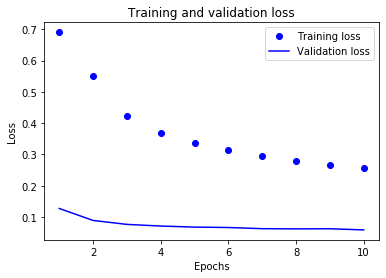

In [40]:
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

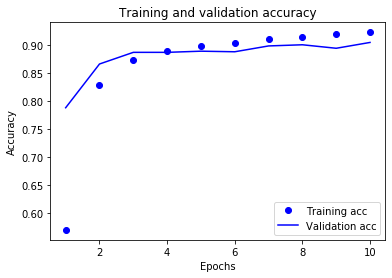

In [41]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

#### Model 6 :

In [65]:
model = keras.Sequential([
    keras.layers.Embedding(len(d), 16),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [66]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [67]:
history = model.fit(new_train_data3, new_train_label3,
                    epochs=5,
                   validation_data=(new_val_data3, new_val_label3),
                   validation_steps=30,
                   callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', mode='min')])

Train on 35000 samples, validate on 5000 samples
Epoch 1/5
11744/35000 [=========>....................] - ETA: 10:27 - loss: 0.6937 - accuracy: 0.468 - ETA: 3:50 - loss: 0.6929 - accuracy: 0.531 - ETA: 2:31 - loss: 0.6932 - accuracy: 0.50 - ETA: 1:57 - loss: 0.6932 - accuracy: 0.50 - ETA: 1:37 - loss: 0.6930 - accuracy: 0.51 - ETA: 1:25 - loss: 0.6931 - accuracy: 0.50 - ETA: 1:17 - loss: 0.6930 - accuracy: 0.51 - ETA: 1:10 - loss: 0.6928 - accuracy: 0.52 - ETA: 1:06 - loss: 0.6928 - accuracy: 0.52 - ETA: 1:02 - loss: 0.6928 - accuracy: 0.52 - ETA: 59s - loss: 0.6932 - accuracy: 0.5045 - ETA: 57s - loss: 0.6935 - accuracy: 0.493 - ETA: 55s - loss: 0.6935 - accuracy: 0.493 - ETA: 53s - loss: 0.6935 - accuracy: 0.493 - ETA: 52s - loss: 0.6935 - accuracy: 0.486 - ETA: 50s - loss: 0.6935 - accuracy: 0.490 - ETA: 49s - loss: 0.6934 - accuracy: 0.499 - ETA: 48s - loss: 0.6934 - accuracy: 0.497 - ETA: 47s - loss: 0.6934 - accuracy: 0.497 - ETA: 46s - loss: 0.6934 - accuracy: 0.496 - ETA: 46s -

11872/35000 [=========>....................] - ETA: 31s - loss: 0.5420 - accuracy: 0.843 - ETA: 32s - loss: 0.5506 - accuracy: 0.854 - ETA: 33s - loss: 0.5597 - accuracy: 0.825 - ETA: 33s - loss: 0.5645 - accuracy: 0.790 - ETA: 33s - loss: 0.5720 - accuracy: 0.763 - ETA: 32s - loss: 0.5706 - accuracy: 0.761 - ETA: 32s - loss: 0.5702 - accuracy: 0.762 - ETA: 32s - loss: 0.5728 - accuracy: 0.758 - ETA: 32s - loss: 0.5756 - accuracy: 0.755 - ETA: 32s - loss: 0.5764 - accuracy: 0.761 - ETA: 32s - loss: 0.5750 - accuracy: 0.770 - ETA: 32s - loss: 0.5739 - accuracy: 0.774 - ETA: 32s - loss: 0.5741 - accuracy: 0.781 - ETA: 32s - loss: 0.5741 - accuracy: 0.783 - ETA: 32s - loss: 0.5736 - accuracy: 0.790 - ETA: 32s - loss: 0.5744 - accuracy: 0.790 - ETA: 32s - loss: 0.5743 - accuracy: 0.791 - ETA: 31s - loss: 0.5745 - accuracy: 0.793 - ETA: 31s - loss: 0.5744 - accuracy: 0.799 - ETA: 31s - loss: 0.5752 - accuracy: 0.798 - ETA: 31s - loss: 0.5747 - accuracy: 0.801 - ETA: 31s - loss: 0.5761 - acc

35000/35000 [==============================] - ETA: 9s - loss: 0.4894 - accuracy: 0.83 - ETA: 9s - loss: 0.4893 - accuracy: 0.83 - ETA: 9s - loss: 0.4892 - accuracy: 0.83 - ETA: 9s - loss: 0.4891 - accuracy: 0.83 - ETA: 9s - loss: 0.4888 - accuracy: 0.83 - ETA: 9s - loss: 0.4887 - accuracy: 0.83 - ETA: 9s - loss: 0.4885 - accuracy: 0.83 - ETA: 9s - loss: 0.4883 - accuracy: 0.83 - ETA: 9s - loss: 0.4882 - accuracy: 0.83 - ETA: 9s - loss: 0.4880 - accuracy: 0.83 - ETA: 9s - loss: 0.4878 - accuracy: 0.83 - ETA: 9s - loss: 0.4874 - accuracy: 0.83 - ETA: 9s - loss: 0.4872 - accuracy: 0.83 - ETA: 9s - loss: 0.4871 - accuracy: 0.83 - ETA: 9s - loss: 0.4870 - accuracy: 0.83 - ETA: 9s - loss: 0.4866 - accuracy: 0.83 - ETA: 8s - loss: 0.4863 - accuracy: 0.83 - ETA: 8s - loss: 0.4861 - accuracy: 0.83 - ETA: 8s - loss: 0.4860 - accuracy: 0.83 - ETA: 8s - loss: 0.4858 - accuracy: 0.83 - ETA: 8s - loss: 0.4856 - accuracy: 0.83 - ETA: 8s - loss: 0.4854 - accuracy: 0.83 - ETA: 8s - loss: 0.4852 - accu

11872/35000 [=========>....................] - ETA: 33s - loss: 0.2207 - accuracy: 0.968 - ETA: 33s - loss: 0.2655 - accuracy: 0.906 - ETA: 33s - loss: 0.2505 - accuracy: 0.906 - ETA: 34s - loss: 0.2476 - accuracy: 0.919 - ETA: 34s - loss: 0.2823 - accuracy: 0.902 - ETA: 33s - loss: 0.2781 - accuracy: 0.906 - ETA: 33s - loss: 0.2875 - accuracy: 0.901 - ETA: 32s - loss: 0.2836 - accuracy: 0.904 - ETA: 32s - loss: 0.2917 - accuracy: 0.897 - ETA: 32s - loss: 0.3038 - accuracy: 0.886 - ETA: 32s - loss: 0.2967 - accuracy: 0.889 - ETA: 32s - loss: 0.2969 - accuracy: 0.889 - ETA: 32s - loss: 0.2965 - accuracy: 0.890 - ETA: 32s - loss: 0.2955 - accuracy: 0.890 - ETA: 32s - loss: 0.2966 - accuracy: 0.887 - ETA: 32s - loss: 0.2913 - accuracy: 0.891 - ETA: 31s - loss: 0.2884 - accuracy: 0.893 - ETA: 31s - loss: 0.2924 - accuracy: 0.888 - ETA: 31s - loss: 0.2939 - accuracy: 0.886 - ETA: 31s - loss: 0.2960 - accuracy: 0.887 - ETA: 31s - loss: 0.2949 - accuracy: 0.888 - ETA: 31s - loss: 0.2976 - acc

35000/35000 [==============================] - ETA: 10s - loss: 0.2753 - accuracy: 0.896 - ETA: 10s - loss: 0.2754 - accuracy: 0.896 - ETA: 10s - loss: 0.2753 - accuracy: 0.896 - ETA: 10s - loss: 0.2753 - accuracy: 0.896 - ETA: 10s - loss: 0.2754 - accuracy: 0.896 - ETA: 10s - loss: 0.2752 - accuracy: 0.897 - ETA: 10s - loss: 0.2752 - accuracy: 0.896 - ETA: 10s - loss: 0.2751 - accuracy: 0.896 - ETA: 10s - loss: 0.2749 - accuracy: 0.897 - ETA: 10s - loss: 0.2751 - accuracy: 0.896 - ETA: 10s - loss: 0.2751 - accuracy: 0.897 - ETA: 10s - loss: 0.2748 - accuracy: 0.897 - ETA: 10s - loss: 0.2747 - accuracy: 0.897 - ETA: 10s - loss: 0.2749 - accuracy: 0.896 - ETA: 10s - loss: 0.2749 - accuracy: 0.896 - ETA: 10s - loss: 0.2748 - accuracy: 0.896 - ETA: 10s - loss: 0.2748 - accuracy: 0.896 - ETA: 9s - loss: 0.2750 - accuracy: 0.896 - ETA: 9s - loss: 0.2751 - accuracy: 0.89 - ETA: 9s - loss: 0.2751 - accuracy: 0.89 - ETA: 9s - loss: 0.2750 - accuracy: 0.89 - ETA: 9s - loss: 0.2751 - accuracy: 0

In [68]:
loss, accuracy = model.evaluate(new_test_data3, new_test_label3)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

 - 2s 180us/sample - loss: 0.4115 - accuracy: 0.8893


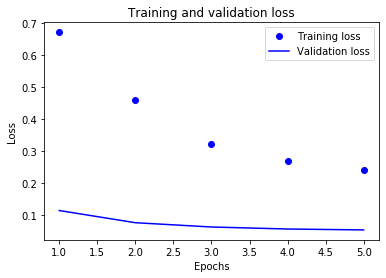

In [69]:
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

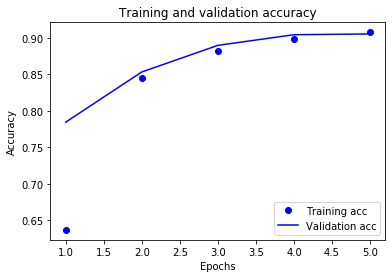

In [70]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

### Batches formation

In [13]:
train_dataset = tf.data.Dataset.from_tensor_slices((new_train_data3, new_train_label3))
val_dataset = tf.data.Dataset.from_tensor_slices((new_val_data3, new_val_label3))
test_dataset = tf.data.Dataset.from_tensor_slices((new_test_data3, new_test_label3))

In [14]:
for i,j in train_dataset.take(4):
    print(i)
    print(j)

tf.Tensor([1 2 3 ... 0 0 0], shape=(1424,), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor([135 136 137 ...   0   0   0], shape=(1424,), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor([199 135 200 ...   0   0   0], shape=(1424,), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor([262 263 136 ...   0   0   0], shape=(1424,), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)


In [15]:
train_batches = (train_dataset
                 .padded_batch(32, train_dataset.output_shapes))

val_batches = (val_dataset
                .padded_batch(32, train_dataset.output_shapes))

test_batches = (test_dataset
                .padded_batch(32, train_dataset.output_shapes))

#### New Model trained on batches:

In [16]:
model = keras.Sequential([
    keras.layers.Embedding(len(d), 16),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(8, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(1, activation='sigmoid')
])

In [17]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [18]:
history = model.fit(train_batches,
                    epochs=10,
                    validation_data=val_batches,
                    validation_steps=30,
                   verbose=2)

Epoch 1/10
1250/1250 - 54s - loss: 0.6921 - accuracy: 0.5584 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
1250/1250 - 53s - loss: 0.5600 - accuracy: 0.8148 - val_loss: 0.4587 - val_accuracy: 0.8646
Epoch 3/10
1250/1250 - 44s - loss: 0.4139 - accuracy: 0.8712 - val_loss: 0.3878 - val_accuracy: 0.8854
Epoch 4/10
1250/1250 - 44s - loss: 0.3596 - accuracy: 0.8892 - val_loss: 0.3576 - val_accuracy: 0.8938
Epoch 5/10
1250/1250 - 45s - loss: 0.3273 - accuracy: 0.8993 - val_loss: 0.3395 - val_accuracy: 0.8958
Epoch 6/10
1250/1250 - 44s - loss: 0.3040 - accuracy: 0.9064 - val_loss: 0.3272 - val_accuracy: 0.8958
Epoch 7/10
1250/1250 - 40s - loss: 0.2856 - accuracy: 0.9116 - val_loss: 0.3183 - val_accuracy: 0.8990
Epoch 8/10
1250/1250 - 44s - loss: 0.2702 - accuracy: 0.9166 - val_loss: 0.3114 - val_accuracy: 0.8979
Epoch 9/10
1250/1250 - 43s - loss: 0.2570 - accuracy: 0.9208 - val_loss: 0.3060 - val_accuracy: 0.9010
Epoch 10/10
1250/1250 - 42s - loss: 0.2453 - accuracy: 0.9251 - v

In [19]:
loss, accuracy = model.evaluate(new_test_data, new_test_label)

5000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

 - 2s 332us/sample - loss: 0.5962 - accuracy: 0.8944


In [20]:
model.save('model_corpus_1.h5')

In [22]:
import matplotlib.pyplot as plt

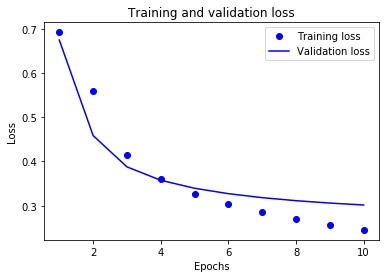

In [23]:
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

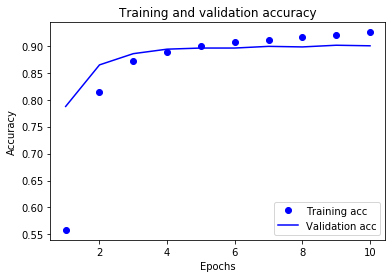

In [24]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

#### New Model part 2

In [54]:
model = keras.Sequential([
    keras.layers.Embedding(len(d), 16),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(8, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(1, activation='sigmoid')
])

In [55]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [56]:
history = model.fit(train_batches,
                    epochs=50,
                    validation_data=val_batches,
                    validation_steps=30)

Epoch 1/50


    174/Unknown - 1s 546ms/step - loss: 0.7059 - accuracy: 0.468 - 1s 284ms/step - loss: 0.7040 - accuracy: 0.531 - 1s 198ms/step - loss: 0.7027 - accuracy: 0.572 - 1s 156ms/step - loss: 0.7030 - accuracy: 0.562 - 1s 130ms/step - loss: 0.7028 - accuracy: 0.562 - 1s 112ms/step - loss: 0.7021 - accuracy: 0.572 - 1s 100ms/step - loss: 0.7022 - accuracy: 0.567 - 1s 91ms/step - loss: 0.7028 - accuracy: 0.554 - 1s 84ms/step - loss: 0.7028 - accuracy: 0.55 - 1s 78ms/step - loss: 0.7037 - accuracy: 0.53 - 1s 74ms/step - loss: 0.7041 - accuracy: 0.53 - 1s 70ms/step - loss: 0.7041 - accuracy: 0.52 - 1s 66ms/step - loss: 0.7042 - accuracy: 0.52 - 1s 64ms/step - loss: 0.7039 - accuracy: 0.52 - 1s 61ms/step - loss: 0.7040 - accuracy: 0.52 - 1s 59ms/step - loss: 0.7040 - accuracy: 0.52 - 1s 57ms/step - loss: 0.7036 - accuracy: 0.52 - 1s 56ms/step - loss: 0.7032 - accuracy: 0.53 - 1s 54ms/step - loss: 0.7037 - accuracy: 0.52 - 1s 53ms/step - loss: 0.7042 - accuracy: 0.52 - 1s 51ms/step - loss: 0.7044

   1182/Unknown - 27s 27ms/step - loss: 0.6852 - accuracy: 0.602 - 27s 27ms/step - loss: 0.6852 - accuracy: 0.602 - 27s 27ms/step - loss: 0.6851 - accuracy: 0.602 - 27s 27ms/step - loss: 0.6851 - accuracy: 0.602 - 27s 27ms/step - loss: 0.6851 - accuracy: 0.602 - 27s 27ms/step - loss: 0.6850 - accuracy: 0.603 - 28s 27ms/step - loss: 0.6850 - accuracy: 0.603 - 28s 27ms/step - loss: 0.6849 - accuracy: 0.603 - 28s 27ms/step - loss: 0.6848 - accuracy: 0.603 - 28s 27ms/step - loss: 0.6848 - accuracy: 0.604 - 28s 27ms/step - loss: 0.6847 - accuracy: 0.604 - 28s 27ms/step - loss: 0.6847 - accuracy: 0.604 - 28s 27ms/step - loss: 0.6847 - accuracy: 0.604 - 28s 27ms/step - loss: 0.6846 - accuracy: 0.604 - 28s 27ms/step - loss: 0.6846 - accuracy: 0.604 - 28s 27ms/step - loss: 0.6845 - accuracy: 0.604 - 28s 27ms/step - loss: 0.6845 - accuracy: 0.604 - 28s 27ms/step - loss: 0.6845 - accuracy: 0.604 - 28s 27ms/step - loss: 0.6844 - accuracy: 0.604 - 28s 27ms/step - loss: 0.6843 - accuracy: 0.605 - 28

1250/1250 [==============================]6764 - accuracy: 0.626 - 32s 27ms/step - loss: 0.6764 - accuracy: 0.626 - 32s 27ms/step - loss: 0.6763 - accuracy: 0.626 - 32s 27ms/step - loss: 0.6763 - accuracy: 0.626 - 32s 27ms/step - loss: 0.6762 - accuracy: 0.626 - 32s 27ms/step - loss: 0.6761 - accuracy: 0.626 - 32s 27ms/step - loss: 0.6761 - accuracy: 0.626 - 32s 27ms/step - loss: 0.6760 - accuracy: 0.626 - 32s 27ms/step - loss: 0.6760 - accuracy: 0.627 - 32s 27ms/step - loss: 0.6759 - accuracy: 0.627 - 32s 27ms/step - loss: 0.6758 - accuracy: 0.627 - 32s 27ms/step - loss: 0.6758 - accuracy: 0.627 - 32s 27ms/step - loss: 0.6757 - accuracy: 0.627 - 32s 27ms/step - loss: 0.6757 - accuracy: 0.627 - 32s 27ms/step - loss: 0.6756 - accuracy: 0.627 - 32s 27ms/step - loss: 0.6756 - accuracy: 0.628 - 32s 27ms/step - loss: 0.6755 - accuracy: 0.628 - 32s 27ms/step - loss: 0.6753 - accuracy: 0.628 - 32s 27ms/step - loss: 0.6752 - accuracy: 0.628 - 32s 27ms/step - loss: 0.6751 - accuracy: 0.628 - 32

 554/1250 [============>.................] - ETA: 2:32 - loss: 0.4366 - accuracy: 0.84 - ETA: 1:00 - loss: 0.3918 - accuracy: 0.89 - ETA: 46s - loss: 0.4047 - accuracy: 0.8839 - ETA: 40s - loss: 0.4038 - accuracy: 0.875 - ETA: 37s - loss: 0.4132 - accuracy: 0.865 - ETA: 35s - loss: 0.4134 - accuracy: 0.867 - ETA: 33s - loss: 0.4212 - accuracy: 0.858 - ETA: 32s - loss: 0.4208 - accuracy: 0.866 - ETA: 32s - loss: 0.4182 - accuracy: 0.871 - ETA: 31s - loss: 0.4155 - accuracy: 0.873 - ETA: 31s - loss: 0.4115 - accuracy: 0.873 - ETA: 30s - loss: 0.4109 - accuracy: 0.870 - ETA: 30s - loss: 0.4060 - accuracy: 0.875 - ETA: 29s - loss: 0.4070 - accuracy: 0.875 - ETA: 29s - loss: 0.4091 - accuracy: 0.874 - ETA: 29s - loss: 0.4080 - accuracy: 0.875 - ETA: 28s - loss: 0.4053 - accuracy: 0.878 - ETA: 28s - loss: 0.4017 - accuracy: 0.881 - ETA: 28s - loss: 0.4013 - accuracy: 0.880 - ETA: 28s - loss: 0.4017 - accuracy: 0.879 - ETA: 28s - loss: 0.4018 - accuracy: 0.878 - ETA: 27s - loss: 0.4017 - accu

1250/1250 [==============================] - ETA: 2s - loss: 0.3827 - accuracy: 0.88 - ETA: 2s - loss: 0.3824 - accuracy: 0.88 - ETA: 2s - loss: 0.3824 - accuracy: 0.88 - ETA: 2s - loss: 0.3824 - accuracy: 0.88 - ETA: 2s - loss: 0.3824 - accuracy: 0.88 - ETA: 2s - loss: 0.3824 - accuracy: 0.88 - ETA: 2s - loss: 0.3823 - accuracy: 0.88 - ETA: 2s - loss: 0.3823 - accuracy: 0.88 - ETA: 2s - loss: 0.3822 - accuracy: 0.88 - ETA: 2s - loss: 0.3822 - accuracy: 0.88 - ETA: 2s - loss: 0.3820 - accuracy: 0.88 - ETA: 2s - loss: 0.3819 - accuracy: 0.88 - ETA: 1s - loss: 0.3818 - accuracy: 0.88 - ETA: 1s - loss: 0.3817 - accuracy: 0.88 - ETA: 1s - loss: 0.3816 - accuracy: 0.88 - ETA: 1s - loss: 0.3816 - accuracy: 0.88 - ETA: 1s - loss: 0.3816 - accuracy: 0.88 - ETA: 1s - loss: 0.3815 - accuracy: 0.88 - ETA: 1s - loss: 0.3815 - accuracy: 0.88 - ETA: 1s - loss: 0.3815 - accuracy: 0.88 - ETA: 1s - loss: 0.3814 - accuracy: 0.88 - ETA: 1s - loss: 0.3814 - accuracy: 0.88 - ETA: 1s - loss: 0.3813 - accura

 480/1250 [==========>...................] - ETA: 2:35 - loss: 0.3249 - accuracy: 0.87 - ETA: 1:00 - loss: 0.2987 - accuracy: 0.91 - ETA: 46s - loss: 0.3109 - accuracy: 0.9152 - ETA: 43s - loss: 0.2985 - accuracy: 0.923 - ETA: 39s - loss: 0.2997 - accuracy: 0.921 - ETA: 38s - loss: 0.3087 - accuracy: 0.917 - ETA: 37s - loss: 0.3150 - accuracy: 0.912 - ETA: 35s - loss: 0.3232 - accuracy: 0.904 - ETA: 34s - loss: 0.3236 - accuracy: 0.907 - ETA: 33s - loss: 0.3229 - accuracy: 0.911 - ETA: 32s - loss: 0.3231 - accuracy: 0.909 - ETA: 32s - loss: 0.3200 - accuracy: 0.908 - ETA: 32s - loss: 0.3191 - accuracy: 0.902 - ETA: 32s - loss: 0.3166 - accuracy: 0.903 - ETA: 31s - loss: 0.3121 - accuracy: 0.906 - ETA: 31s - loss: 0.3136 - accuracy: 0.906 - ETA: 31s - loss: 0.3164 - accuracy: 0.906 - ETA: 30s - loss: 0.3155 - accuracy: 0.908 - ETA: 30s - loss: 0.3131 - accuracy: 0.910 - ETA: 30s - loss: 0.3090 - accuracy: 0.913 - ETA: 29s - loss: 0.3099 - accuracy: 0.911 - ETA: 29s - loss: 0.3102 - accu

1250/1250 [==============================] - ETA: 6s - loss: 0.3094 - accuracy: 0.90 - ETA: 6s - loss: 0.3094 - accuracy: 0.90 - ETA: 6s - loss: 0.3093 - accuracy: 0.90 - ETA: 6s - loss: 0.3093 - accuracy: 0.90 - ETA: 6s - loss: 0.3091 - accuracy: 0.90 - ETA: 6s - loss: 0.3094 - accuracy: 0.90 - ETA: 5s - loss: 0.3092 - accuracy: 0.90 - ETA: 5s - loss: 0.3092 - accuracy: 0.90 - ETA: 5s - loss: 0.3092 - accuracy: 0.90 - ETA: 5s - loss: 0.3093 - accuracy: 0.90 - ETA: 5s - loss: 0.3092 - accuracy: 0.90 - ETA: 5s - loss: 0.3092 - accuracy: 0.90 - ETA: 5s - loss: 0.3091 - accuracy: 0.90 - ETA: 5s - loss: 0.3092 - accuracy: 0.90 - ETA: 5s - loss: 0.3095 - accuracy: 0.90 - ETA: 5s - loss: 0.3095 - accuracy: 0.90 - ETA: 5s - loss: 0.3095 - accuracy: 0.90 - ETA: 5s - loss: 0.3096 - accuracy: 0.90 - ETA: 5s - loss: 0.3095 - accuracy: 0.90 - ETA: 5s - loss: 0.3094 - accuracy: 0.90 - ETA: 5s - loss: 0.3095 - accuracy: 0.90 - ETA: 5s - loss: 0.3095 - accuracy: 0.90 - ETA: 5s - loss: 0.3095 - accura

 556/1250 [============>.................] - ETA: 2:44 - loss: 0.2730 - accuracy: 0.90 - ETA: 1:02 - loss: 0.2562 - accuracy: 0.93 - ETA: 47s - loss: 0.2658 - accuracy: 0.9330 - ETA: 41s - loss: 0.2532 - accuracy: 0.943 - ETA: 38s - loss: 0.2693 - accuracy: 0.937 - ETA: 36s - loss: 0.2697 - accuracy: 0.931 - ETA: 34s - loss: 0.2773 - accuracy: 0.924 - ETA: 33s - loss: 0.2776 - accuracy: 0.926 - ETA: 32s - loss: 0.2782 - accuracy: 0.928 - ETA: 32s - loss: 0.2799 - accuracy: 0.926 - ETA: 31s - loss: 0.2769 - accuracy: 0.922 - ETA: 31s - loss: 0.2761 - accuracy: 0.921 - ETA: 30s - loss: 0.2685 - accuracy: 0.925 - ETA: 30s - loss: 0.2704 - accuracy: 0.924 - ETA: 29s - loss: 0.2737 - accuracy: 0.923 - ETA: 29s - loss: 0.2727 - accuracy: 0.924 - ETA: 29s - loss: 0.2706 - accuracy: 0.926 - ETA: 28s - loss: 0.2665 - accuracy: 0.927 - ETA: 28s - loss: 0.2680 - accuracy: 0.925 - ETA: 28s - loss: 0.2681 - accuracy: 0.925 - ETA: 28s - loss: 0.2669 - accuracy: 0.923 - ETA: 28s - loss: 0.2659 - accu

1250/1250 [==============================] - ETA: 2s - loss: 0.2694 - accuracy: 0.91 - ETA: 2s - loss: 0.2693 - accuracy: 0.91 - ETA: 2s - loss: 0.2695 - accuracy: 0.91 - ETA: 2s - loss: 0.2695 - accuracy: 0.91 - ETA: 2s - loss: 0.2695 - accuracy: 0.91 - ETA: 2s - loss: 0.2695 - accuracy: 0.91 - ETA: 2s - loss: 0.2694 - accuracy: 0.91 - ETA: 2s - loss: 0.2695 - accuracy: 0.91 - ETA: 2s - loss: 0.2694 - accuracy: 0.91 - ETA: 1s - loss: 0.2692 - accuracy: 0.91 - ETA: 1s - loss: 0.2693 - accuracy: 0.91 - ETA: 1s - loss: 0.2691 - accuracy: 0.91 - ETA: 1s - loss: 0.2692 - accuracy: 0.91 - ETA: 1s - loss: 0.2692 - accuracy: 0.91 - ETA: 1s - loss: 0.2692 - accuracy: 0.91 - ETA: 1s - loss: 0.2691 - accuracy: 0.91 - ETA: 1s - loss: 0.2693 - accuracy: 0.91 - ETA: 1s - loss: 0.2693 - accuracy: 0.91 - ETA: 1s - loss: 0.2692 - accuracy: 0.91 - ETA: 1s - loss: 0.2692 - accuracy: 0.91 - ETA: 1s - loss: 0.2692 - accuracy: 0.91 - ETA: 1s - loss: 0.2692 - accuracy: 0.91 - ETA: 1s - loss: 0.2692 - accura

 556/1250 [============>.................] - ETA: 2:38 - loss: 0.2431 - accuracy: 0.93 - ETA: 1:00 - loss: 0.2286 - accuracy: 0.94 - ETA: 46s - loss: 0.2356 - accuracy: 0.9375 - ETA: 40s - loss: 0.2222 - accuracy: 0.950 - ETA: 37s - loss: 0.2398 - accuracy: 0.944 - ETA: 34s - loss: 0.2400 - accuracy: 0.939 - ETA: 33s - loss: 0.2466 - accuracy: 0.934 - ETA: 32s - loss: 0.2467 - accuracy: 0.936 - ETA: 31s - loss: 0.2481 - accuracy: 0.937 - ETA: 30s - loss: 0.2506 - accuracy: 0.935 - ETA: 30s - loss: 0.2481 - accuracy: 0.931 - ETA: 29s - loss: 0.2472 - accuracy: 0.932 - ETA: 29s - loss: 0.2396 - accuracy: 0.935 - ETA: 28s - loss: 0.2418 - accuracy: 0.933 - ETA: 28s - loss: 0.2454 - accuracy: 0.932 - ETA: 28s - loss: 0.2443 - accuracy: 0.932 - ETA: 28s - loss: 0.2425 - accuracy: 0.933 - ETA: 27s - loss: 0.2385 - accuracy: 0.935 - ETA: 27s - loss: 0.2403 - accuracy: 0.933 - ETA: 27s - loss: 0.2401 - accuracy: 0.933 - ETA: 27s - loss: 0.2388 - accuracy: 0.933 - ETA: 27s - loss: 0.2373 - accu

1250/1250 [==============================] - ETA: 2s - loss: 0.2417 - accuracy: 0.92 - ETA: 2s - loss: 0.2417 - accuracy: 0.92 - ETA: 2s - loss: 0.2418 - accuracy: 0.92 - ETA: 2s - loss: 0.2418 - accuracy: 0.92 - ETA: 2s - loss: 0.2418 - accuracy: 0.92 - ETA: 2s - loss: 0.2418 - accuracy: 0.92 - ETA: 2s - loss: 0.2418 - accuracy: 0.92 - ETA: 2s - loss: 0.2418 - accuracy: 0.92 - ETA: 2s - loss: 0.2417 - accuracy: 0.92 - ETA: 1s - loss: 0.2416 - accuracy: 0.92 - ETA: 1s - loss: 0.2416 - accuracy: 0.92 - ETA: 1s - loss: 0.2415 - accuracy: 0.92 - ETA: 1s - loss: 0.2415 - accuracy: 0.92 - ETA: 1s - loss: 0.2416 - accuracy: 0.92 - ETA: 1s - loss: 0.2416 - accuracy: 0.92 - ETA: 1s - loss: 0.2415 - accuracy: 0.92 - ETA: 1s - loss: 0.2417 - accuracy: 0.92 - ETA: 1s - loss: 0.2417 - accuracy: 0.92 - ETA: 1s - loss: 0.2416 - accuracy: 0.92 - ETA: 1s - loss: 0.2416 - accuracy: 0.92 - ETA: 1s - loss: 0.2416 - accuracy: 0.92 - ETA: 1s - loss: 0.2416 - accuracy: 0.92 - ETA: 1s - loss: 0.2416 - accura

 466/1250 [==========>...................] - ETA: 2:35 - loss: 0.2238 - accuracy: 0.93 - ETA: 59s - loss: 0.2077 - accuracy: 0.9297 - ETA: 45s - loss: 0.2121 - accuracy: 0.928 - ETA: 41s - loss: 0.1987 - accuracy: 0.943 - ETA: 38s - loss: 0.2171 - accuracy: 0.939 - ETA: 36s - loss: 0.2172 - accuracy: 0.935 - ETA: 34s - loss: 0.2228 - accuracy: 0.930 - ETA: 33s - loss: 0.2229 - accuracy: 0.933 - ETA: 32s - loss: 0.2248 - accuracy: 0.935 - ETA: 31s - loss: 0.2275 - accuracy: 0.933 - ETA: 31s - loss: 0.2255 - accuracy: 0.930 - ETA: 30s - loss: 0.2246 - accuracy: 0.931 - ETA: 30s - loss: 0.2173 - accuracy: 0.935 - ETA: 30s - loss: 0.2198 - accuracy: 0.932 - ETA: 29s - loss: 0.2237 - accuracy: 0.931 - ETA: 29s - loss: 0.2225 - accuracy: 0.932 - ETA: 29s - loss: 0.2211 - accuracy: 0.934 - ETA: 28s - loss: 0.2173 - accuracy: 0.937 - ETA: 28s - loss: 0.2192 - accuracy: 0.935 - ETA: 28s - loss: 0.2187 - accuracy: 0.935 - ETA: 28s - loss: 0.2173 - accuracy: 0.937 - ETA: 27s - loss: 0.2156 - accu

1250/1250 [==============================] - ETA: 7s - loss: 0.2200 - accuracy: 0.93 - ETA: 7s - loss: 0.2197 - accuracy: 0.93 - ETA: 7s - loss: 0.2196 - accuracy: 0.93 - ETA: 7s - loss: 0.2197 - accuracy: 0.93 - ETA: 7s - loss: 0.2197 - accuracy: 0.93 - ETA: 7s - loss: 0.2196 - accuracy: 0.93 - ETA: 7s - loss: 0.2196 - accuracy: 0.93 - ETA: 7s - loss: 0.2196 - accuracy: 0.93 - ETA: 7s - loss: 0.2197 - accuracy: 0.93 - ETA: 7s - loss: 0.2197 - accuracy: 0.93 - ETA: 6s - loss: 0.2197 - accuracy: 0.93 - ETA: 6s - loss: 0.2199 - accuracy: 0.93 - ETA: 6s - loss: 0.2199 - accuracy: 0.93 - ETA: 6s - loss: 0.2199 - accuracy: 0.93 - ETA: 6s - loss: 0.2197 - accuracy: 0.93 - ETA: 6s - loss: 0.2201 - accuracy: 0.93 - ETA: 6s - loss: 0.2201 - accuracy: 0.93 - ETA: 6s - loss: 0.2202 - accuracy: 0.93 - ETA: 6s - loss: 0.2202 - accuracy: 0.93 - ETA: 6s - loss: 0.2201 - accuracy: 0.93 - ETA: 6s - loss: 0.2201 - accuracy: 0.93 - ETA: 6s - loss: 0.2200 - accuracy: 0.93 - ETA: 6s - loss: 0.2200 - accura

 556/1250 [============>.................] - ETA: 2:44 - loss: 0.2101 - accuracy: 0.93 - ETA: 1:02 - loss: 0.1904 - accuracy: 0.94 - ETA: 46s - loss: 0.1925 - accuracy: 0.9375 - ETA: 40s - loss: 0.1793 - accuracy: 0.950 - ETA: 37s - loss: 0.1983 - accuracy: 0.947 - ETA: 35s - loss: 0.1982 - accuracy: 0.945 - ETA: 34s - loss: 0.2029 - accuracy: 0.939 - ETA: 33s - loss: 0.2031 - accuracy: 0.940 - ETA: 32s - loss: 0.2054 - accuracy: 0.941 - ETA: 31s - loss: 0.2082 - accuracy: 0.938 - ETA: 31s - loss: 0.2066 - accuracy: 0.935 - ETA: 30s - loss: 0.2056 - accuracy: 0.935 - ETA: 30s - loss: 0.1988 - accuracy: 0.939 - ETA: 29s - loss: 0.2016 - accuracy: 0.936 - ETA: 29s - loss: 0.2058 - accuracy: 0.935 - ETA: 29s - loss: 0.2045 - accuracy: 0.935 - ETA: 28s - loss: 0.2035 - accuracy: 0.937 - ETA: 28s - loss: 0.1999 - accuracy: 0.940 - ETA: 28s - loss: 0.2018 - accuracy: 0.939 - ETA: 28s - loss: 0.2011 - accuracy: 0.939 - ETA: 27s - loss: 0.1997 - accuracy: 0.941 - ETA: 27s - loss: 0.1978 - accu

1250/1250 [==============================] - ETA: 2s - loss: 0.2022 - accuracy: 0.94 - ETA: 2s - loss: 0.2022 - accuracy: 0.94 - ETA: 2s - loss: 0.2022 - accuracy: 0.94 - ETA: 2s - loss: 0.2023 - accuracy: 0.94 - ETA: 2s - loss: 0.2024 - accuracy: 0.94 - ETA: 2s - loss: 0.2024 - accuracy: 0.94 - ETA: 2s - loss: 0.2023 - accuracy: 0.94 - ETA: 2s - loss: 0.2023 - accuracy: 0.94 - ETA: 2s - loss: 0.2023 - accuracy: 0.94 - ETA: 2s - loss: 0.2023 - accuracy: 0.94 - ETA: 1s - loss: 0.2021 - accuracy: 0.94 - ETA: 1s - loss: 0.2022 - accuracy: 0.94 - ETA: 1s - loss: 0.2021 - accuracy: 0.94 - ETA: 1s - loss: 0.2021 - accuracy: 0.94 - ETA: 1s - loss: 0.2022 - accuracy: 0.94 - ETA: 1s - loss: 0.2021 - accuracy: 0.94 - ETA: 1s - loss: 0.2021 - accuracy: 0.94 - ETA: 1s - loss: 0.2022 - accuracy: 0.94 - ETA: 1s - loss: 0.2023 - accuracy: 0.94 - ETA: 1s - loss: 0.2022 - accuracy: 0.94 - ETA: 1s - loss: 0.2022 - accuracy: 0.94 - ETA: 1s - loss: 0.2022 - accuracy: 0.94 - ETA: 1s - loss: 0.2022 - accura

 549/1250 [============>.................] - ETA: 2:37 - loss: 0.1996 - accuracy: 0.93 - ETA: 59s - loss: 0.1754 - accuracy: 0.9453 - ETA: 45s - loss: 0.1756 - accuracy: 0.942 - ETA: 42s - loss: 0.1656 - accuracy: 0.947 - ETA: 38s - loss: 0.1607 - accuracy: 0.955 - ETA: 36s - loss: 0.1818 - accuracy: 0.950 - ETA: 34s - loss: 0.1867 - accuracy: 0.944 - ETA: 33s - loss: 0.1893 - accuracy: 0.944 - ETA: 32s - loss: 0.1895 - accuracy: 0.949 - ETA: 31s - loss: 0.1869 - accuracy: 0.950 - ETA: 31s - loss: 0.1903 - accuracy: 0.945 - ETA: 30s - loss: 0.1899 - accuracy: 0.945 - ETA: 30s - loss: 0.1866 - accuracy: 0.946 - ETA: 30s - loss: 0.1838 - accuracy: 0.945 - ETA: 29s - loss: 0.1860 - accuracy: 0.945 - ETA: 29s - loss: 0.1907 - accuracy: 0.943 - ETA: 29s - loss: 0.1867 - accuracy: 0.946 - ETA: 28s - loss: 0.1874 - accuracy: 0.948 - ETA: 28s - loss: 0.1875 - accuracy: 0.949 - ETA: 28s - loss: 0.1855 - accuracy: 0.949 - ETA: 28s - loss: 0.1853 - accuracy: 0.950 - ETA: 27s - loss: 0.1838 - accu

1250/1250 [==============================] - ETA: 2s - loss: 0.1871 - accuracy: 0.94 - ETA: 2s - loss: 0.1869 - accuracy: 0.94 - ETA: 2s - loss: 0.1869 - accuracy: 0.94 - ETA: 2s - loss: 0.1869 - accuracy: 0.94 - ETA: 2s - loss: 0.1870 - accuracy: 0.94 - ETA: 2s - loss: 0.1870 - accuracy: 0.94 - ETA: 2s - loss: 0.1870 - accuracy: 0.94 - ETA: 2s - loss: 0.1870 - accuracy: 0.94 - ETA: 2s - loss: 0.1870 - accuracy: 0.94 - ETA: 2s - loss: 0.1870 - accuracy: 0.94 - ETA: 2s - loss: 0.1870 - accuracy: 0.94 - ETA: 1s - loss: 0.1868 - accuracy: 0.94 - ETA: 1s - loss: 0.1869 - accuracy: 0.94 - ETA: 1s - loss: 0.1868 - accuracy: 0.94 - ETA: 1s - loss: 0.1868 - accuracy: 0.94 - ETA: 1s - loss: 0.1869 - accuracy: 0.94 - ETA: 1s - loss: 0.1868 - accuracy: 0.94 - ETA: 1s - loss: 0.1868 - accuracy: 0.94 - ETA: 1s - loss: 0.1869 - accuracy: 0.94 - ETA: 1s - loss: 0.1870 - accuracy: 0.94 - ETA: 1s - loss: 0.1869 - accuracy: 0.94 - ETA: 1s - loss: 0.1869 - accuracy: 0.94 - ETA: 1s - loss: 0.1869 - accura

 475/1250 [==========>...................] - ETA: 2:58 - loss: 0.1913 - accuracy: 0.93 - ETA: 1:20 - loss: 0.1574 - accuracy: 0.95 - ETA: 1:02 - loss: 0.1573 - accuracy: 0.95 - ETA: 56s - loss: 0.1610 - accuracy: 0.9464 - ETA: 52s - loss: 0.1516 - accuracy: 0.954 - ETA: 48s - loss: 0.1476 - accuracy: 0.960 - ETA: 46s - loss: 0.1682 - accuracy: 0.956 - ETA: 43s - loss: 0.1681 - accuracy: 0.955 - ETA: 40s - loss: 0.1713 - accuracy: 0.952 - ETA: 38s - loss: 0.1715 - accuracy: 0.953 - ETA: 37s - loss: 0.1744 - accuracy: 0.956 - ETA: 36s - loss: 0.1767 - accuracy: 0.953 - ETA: 36s - loss: 0.1761 - accuracy: 0.951 - ETA: 36s - loss: 0.1760 - accuracy: 0.951 - ETA: 36s - loss: 0.1750 - accuracy: 0.951 - ETA: 35s - loss: 0.1714 - accuracy: 0.953 - ETA: 35s - loss: 0.1701 - accuracy: 0.953 - ETA: 35s - loss: 0.1725 - accuracy: 0.952 - ETA: 34s - loss: 0.1772 - accuracy: 0.950 - ETA: 34s - loss: 0.1764 - accuracy: 0.951 - ETA: 34s - loss: 0.1735 - accuracy: 0.952 - ETA: 34s - loss: 0.1756 - accu

1250/1250 [==============================] - ETA: 8s - loss: 0.1733 - accuracy: 0.95 - ETA: 8s - loss: 0.1731 - accuracy: 0.95 - ETA: 8s - loss: 0.1732 - accuracy: 0.95 - ETA: 8s - loss: 0.1732 - accuracy: 0.95 - ETA: 8s - loss: 0.1732 - accuracy: 0.95 - ETA: 7s - loss: 0.1734 - accuracy: 0.95 - ETA: 7s - loss: 0.1732 - accuracy: 0.95 - ETA: 7s - loss: 0.1730 - accuracy: 0.95 - ETA: 7s - loss: 0.1731 - accuracy: 0.95 - ETA: 7s - loss: 0.1732 - accuracy: 0.95 - ETA: 7s - loss: 0.1731 - accuracy: 0.95 - ETA: 7s - loss: 0.1730 - accuracy: 0.95 - ETA: 7s - loss: 0.1731 - accuracy: 0.95 - ETA: 7s - loss: 0.1730 - accuracy: 0.95 - ETA: 7s - loss: 0.1731 - accuracy: 0.95 - ETA: 7s - loss: 0.1732 - accuracy: 0.95 - ETA: 7s - loss: 0.1731 - accuracy: 0.95 - ETA: 7s - loss: 0.1732 - accuracy: 0.95 - ETA: 6s - loss: 0.1732 - accuracy: 0.95 - ETA: 6s - loss: 0.1732 - accuracy: 0.95 - ETA: 6s - loss: 0.1733 - accuracy: 0.95 - ETA: 6s - loss: 0.1735 - accuracy: 0.95 - ETA: 6s - loss: 0.1735 - accura

 468/1250 [==========>...................] - ETA: 2:32 - loss: 0.1843 - accuracy: 0.96 - ETA: 57s - loss: 0.1508 - accuracy: 0.9531 - ETA: 48s - loss: 0.1511 - accuracy: 0.958 - ETA: 45s - loss: 0.1413 - accuracy: 0.964 - ETA: 43s - loss: 0.1371 - accuracy: 0.968 - ETA: 41s - loss: 0.1341 - accuracy: 0.974 - ETA: 38s - loss: 0.1565 - accuracy: 0.964 - ETA: 36s - loss: 0.1595 - accuracy: 0.963 - ETA: 35s - loss: 0.1622 - accuracy: 0.961 - ETA: 35s - loss: 0.1567 - accuracy: 0.964 - ETA: 35s - loss: 0.1619 - accuracy: 0.965 - ETA: 34s - loss: 0.1598 - accuracy: 0.964 - ETA: 34s - loss: 0.1653 - accuracy: 0.959 - ETA: 33s - loss: 0.1634 - accuracy: 0.959 - ETA: 33s - loss: 0.1601 - accuracy: 0.961 - ETA: 32s - loss: 0.1580 - accuracy: 0.962 - ETA: 31s - loss: 0.1606 - accuracy: 0.961 - ETA: 31s - loss: 0.1656 - accuracy: 0.958 - ETA: 31s - loss: 0.1619 - accuracy: 0.960 - ETA: 30s - loss: 0.1630 - accuracy: 0.961 - ETA: 30s - loss: 0.1634 - accuracy: 0.961 - ETA: 30s - loss: 0.1613 - accu

1250/1250 [==============================] - ETA: 9s - loss: 0.1616 - accuracy: 0.95 - ETA: 9s - loss: 0.1615 - accuracy: 0.95 - ETA: 9s - loss: 0.1614 - accuracy: 0.95 - ETA: 9s - loss: 0.1613 - accuracy: 0.95 - ETA: 9s - loss: 0.1613 - accuracy: 0.95 - ETA: 9s - loss: 0.1614 - accuracy: 0.95 - ETA: 9s - loss: 0.1614 - accuracy: 0.95 - ETA: 9s - loss: 0.1613 - accuracy: 0.95 - ETA: 9s - loss: 0.1612 - accuracy: 0.95 - ETA: 9s - loss: 0.1612 - accuracy: 0.95 - ETA: 9s - loss: 0.1612 - accuracy: 0.95 - ETA: 9s - loss: 0.1611 - accuracy: 0.95 - ETA: 9s - loss: 0.1612 - accuracy: 0.95 - ETA: 9s - loss: 0.1610 - accuracy: 0.95 - ETA: 9s - loss: 0.1613 - accuracy: 0.95 - ETA: 9s - loss: 0.1613 - accuracy: 0.95 - ETA: 8s - loss: 0.1616 - accuracy: 0.95 - ETA: 8s - loss: 0.1616 - accuracy: 0.95 - ETA: 8s - loss: 0.1616 - accuracy: 0.95 - ETA: 8s - loss: 0.1614 - accuracy: 0.95 - ETA: 8s - loss: 0.1614 - accuracy: 0.95 - ETA: 8s - loss: 0.1613 - accuracy: 0.95 - ETA: 8s - loss: 0.1613 - accura

 494/1250 [==========>...................] - ETA: 2:37 - loss: 0.1781 - accuracy: 0.93 - ETA: 1:00 - loss: 0.1407 - accuracy: 0.94 - ETA: 51s - loss: 0.1397 - accuracy: 0.9531 - ETA: 46s - loss: 0.1313 - accuracy: 0.960 - ETA: 44s - loss: 0.1272 - accuracy: 0.965 - ETA: 42s - loss: 0.1238 - accuracy: 0.971 - ETA: 42s - loss: 0.1420 - accuracy: 0.966 - ETA: 41s - loss: 0.1458 - accuracy: 0.964 - ETA: 41s - loss: 0.1487 - accuracy: 0.963 - ETA: 40s - loss: 0.1509 - accuracy: 0.960 - ETA: 39s - loss: 0.1482 - accuracy: 0.963 - ETA: 38s - loss: 0.1525 - accuracy: 0.963 - ETA: 38s - loss: 0.1494 - accuracy: 0.965 - ETA: 36s - loss: 0.1542 - accuracy: 0.960 - ETA: 35s - loss: 0.1525 - accuracy: 0.960 - ETA: 35s - loss: 0.1515 - accuracy: 0.961 - ETA: 35s - loss: 0.1485 - accuracy: 0.962 - ETA: 35s - loss: 0.1475 - accuracy: 0.963 - ETA: 35s - loss: 0.1503 - accuracy: 0.962 - ETA: 35s - loss: 0.1515 - accuracy: 0.962 - ETA: 34s - loss: 0.1545 - accuracy: 0.961 - ETA: 34s - loss: 0.1553 - accu

1250/1250 [==============================] - ETA: 6s - loss: 0.1508 - accuracy: 0.96 - ETA: 5s - loss: 0.1509 - accuracy: 0.96 - ETA: 5s - loss: 0.1508 - accuracy: 0.96 - ETA: 5s - loss: 0.1507 - accuracy: 0.96 - ETA: 5s - loss: 0.1509 - accuracy: 0.96 - ETA: 5s - loss: 0.1508 - accuracy: 0.96 - ETA: 5s - loss: 0.1508 - accuracy: 0.96 - ETA: 5s - loss: 0.1509 - accuracy: 0.96 - ETA: 5s - loss: 0.1510 - accuracy: 0.96 - ETA: 5s - loss: 0.1510 - accuracy: 0.96 - ETA: 5s - loss: 0.1512 - accuracy: 0.96 - ETA: 5s - loss: 0.1511 - accuracy: 0.96 - ETA: 5s - loss: 0.1511 - accuracy: 0.96 - ETA: 5s - loss: 0.1511 - accuracy: 0.96 - ETA: 5s - loss: 0.1511 - accuracy: 0.96 - ETA: 5s - loss: 0.1511 - accuracy: 0.96 - ETA: 5s - loss: 0.1510 - accuracy: 0.96 - ETA: 5s - loss: 0.1511 - accuracy: 0.96 - ETA: 5s - loss: 0.1512 - accuracy: 0.96 - ETA: 4s - loss: 0.1512 - accuracy: 0.96 - ETA: 4s - loss: 0.1511 - accuracy: 0.96 - ETA: 4s - loss: 0.1511 - accuracy: 0.96 - ETA: 4s - loss: 0.1510 - accura

 552/1250 [============>.................] - ETA: 2:33 - loss: 0.1722 - accuracy: 0.93 - ETA: 1:00 - loss: 0.1318 - accuracy: 0.96 - ETA: 45s - loss: 0.1290 - accuracy: 0.9688 - ETA: 39s - loss: 0.1190 - accuracy: 0.975 - ETA: 36s - loss: 0.1370 - accuracy: 0.973 - ETA: 34s - loss: 0.1369 - accuracy: 0.970 - ETA: 33s - loss: 0.1388 - accuracy: 0.968 - ETA: 32s - loss: 0.1390 - accuracy: 0.968 - ETA: 31s - loss: 0.1418 - accuracy: 0.971 - ETA: 30s - loss: 0.1428 - accuracy: 0.969 - ETA: 30s - loss: 0.1431 - accuracy: 0.968 - ETA: 29s - loss: 0.1419 - accuracy: 0.969 - ETA: 29s - loss: 0.1371 - accuracy: 0.971 - ETA: 29s - loss: 0.1411 - accuracy: 0.969 - ETA: 28s - loss: 0.1462 - accuracy: 0.966 - ETA: 28s - loss: 0.1447 - accuracy: 0.967 - ETA: 28s - loss: 0.1451 - accuracy: 0.968 - ETA: 28s - loss: 0.1424 - accuracy: 0.969 - ETA: 28s - loss: 0.1446 - accuracy: 0.967 - ETA: 28s - loss: 0.1423 - accuracy: 0.968 - ETA: 28s - loss: 0.1420 - accuracy: 0.968 - ETA: 27s - loss: 0.1397 - accu

1250/1250 [==============================] - ETA: 4s - loss: 0.1412 - accuracy: 0.96 - ETA: 4s - loss: 0.1412 - accuracy: 0.96 - ETA: 4s - loss: 0.1411 - accuracy: 0.96 - ETA: 4s - loss: 0.1410 - accuracy: 0.96 - ETA: 4s - loss: 0.1410 - accuracy: 0.96 - ETA: 4s - loss: 0.1410 - accuracy: 0.96 - ETA: 4s - loss: 0.1410 - accuracy: 0.96 - ETA: 4s - loss: 0.1410 - accuracy: 0.96 - ETA: 3s - loss: 0.1409 - accuracy: 0.96 - ETA: 3s - loss: 0.1409 - accuracy: 0.96 - ETA: 3s - loss: 0.1409 - accuracy: 0.96 - ETA: 3s - loss: 0.1410 - accuracy: 0.96 - ETA: 3s - loss: 0.1410 - accuracy: 0.96 - ETA: 3s - loss: 0.1410 - accuracy: 0.96 - ETA: 3s - loss: 0.1411 - accuracy: 0.96 - ETA: 3s - loss: 0.1410 - accuracy: 0.96 - ETA: 3s - loss: 0.1411 - accuracy: 0.96 - ETA: 3s - loss: 0.1411 - accuracy: 0.96 - ETA: 3s - loss: 0.1410 - accuracy: 0.96 - ETA: 3s - loss: 0.1410 - accuracy: 0.96 - ETA: 3s - loss: 0.1409 - accuracy: 0.96 - ETA: 3s - loss: 0.1409 - accuracy: 0.96 - ETA: 3s - loss: 0.1412 - accura

 525/1250 [===========>..................] - ETA: 2:50 - loss: 0.1666 - accuracy: 0.93 - ETA: 1:03 - loss: 0.1240 - accuracy: 0.96 - ETA: 48s - loss: 0.1213 - accuracy: 0.9688 - ETA: 42s - loss: 0.1120 - accuracy: 0.971 - ETA: 38s - loss: 0.1295 - accuracy: 0.971 - ETA: 36s - loss: 0.1293 - accuracy: 0.970 - ETA: 36s - loss: 0.1315 - accuracy: 0.968 - ETA: 36s - loss: 0.1336 - accuracy: 0.967 - ETA: 35s - loss: 0.1311 - accuracy: 0.968 - ETA: 35s - loss: 0.1351 - accuracy: 0.970 - ETA: 35s - loss: 0.1313 - accuracy: 0.972 - ETA: 34s - loss: 0.1351 - accuracy: 0.969 - ETA: 33s - loss: 0.1336 - accuracy: 0.970 - ETA: 32s - loss: 0.1306 - accuracy: 0.971 - ETA: 32s - loss: 0.1299 - accuracy: 0.971 - ETA: 32s - loss: 0.1329 - accuracy: 0.970 - ETA: 32s - loss: 0.1341 - accuracy: 0.969 - ETA: 32s - loss: 0.1378 - accuracy: 0.967 - ETA: 32s - loss: 0.1365 - accuracy: 0.968 - ETA: 32s - loss: 0.1379 - accuracy: 0.968 - ETA: 33s - loss: 0.1359 - accuracy: 0.969 - ETA: 32s - loss: 0.1345 - accu

1250/1250 [==============================] - ETA: 5s - loss: 0.1324 - accuracy: 0.96 - ETA: 5s - loss: 0.1324 - accuracy: 0.96 - ETA: 5s - loss: 0.1324 - accuracy: 0.96 - ETA: 5s - loss: 0.1324 - accuracy: 0.96 - ETA: 5s - loss: 0.1324 - accuracy: 0.96 - ETA: 4s - loss: 0.1325 - accuracy: 0.96 - ETA: 4s - loss: 0.1324 - accuracy: 0.96 - ETA: 4s - loss: 0.1323 - accuracy: 0.96 - ETA: 4s - loss: 0.1323 - accuracy: 0.96 - ETA: 4s - loss: 0.1323 - accuracy: 0.96 - ETA: 4s - loss: 0.1323 - accuracy: 0.96 - ETA: 4s - loss: 0.1323 - accuracy: 0.96 - ETA: 4s - loss: 0.1322 - accuracy: 0.96 - ETA: 4s - loss: 0.1321 - accuracy: 0.96 - ETA: 4s - loss: 0.1321 - accuracy: 0.96 - ETA: 4s - loss: 0.1321 - accuracy: 0.96 - ETA: 4s - loss: 0.1321 - accuracy: 0.96 - ETA: 4s - loss: 0.1320 - accuracy: 0.96 - ETA: 4s - loss: 0.1320 - accuracy: 0.96 - ETA: 3s - loss: 0.1320 - accuracy: 0.96 - ETA: 3s - loss: 0.1320 - accuracy: 0.96 - ETA: 3s - loss: 0.1321 - accuracy: 0.96 - ETA: 3s - loss: 0.1320 - accura

 351/1250 [=======>......................] - ETA: 7:25 - loss: 0.1605 - accuracy: 0.93 - ETA: 4:17 - loss: 0.1135 - accuracy: 0.96 - ETA: 3:12 - loss: 0.1179 - accuracy: 0.95 - ETA: 2:11 - loss: 0.1139 - accuracy: 0.96 - ETA: 1:46 - loss: 0.1144 - accuracy: 0.96 - ETA: 1:33 - loss: 0.1084 - accuracy: 0.96 - ETA: 1:23 - loss: 0.1038 - accuracy: 0.97 - ETA: 1:17 - loss: 0.1228 - accuracy: 0.97 - ETA: 1:12 - loss: 0.1234 - accuracy: 0.96 - ETA: 1:12 - loss: 0.1225 - accuracy: 0.97 - ETA: 1:10 - loss: 0.1244 - accuracy: 0.97 - ETA: 1:07 - loss: 0.1265 - accuracy: 0.96 - ETA: 1:05 - loss: 0.1239 - accuracy: 0.97 - ETA: 1:04 - loss: 0.1277 - accuracy: 0.97 - ETA: 1:02 - loss: 0.1243 - accuracy: 0.97 - ETA: 1:01 - loss: 0.1261 - accuracy: 0.97 - ETA: 1:00 - loss: 0.1274 - accuracy: 0.97 - ETA: 59s - loss: 0.1264 - accuracy: 0.9707 - ETA: 59s - loss: 0.1254 - accuracy: 0.971 - ETA: 58s - loss: 0.1229 - accuracy: 0.972 - ETA: 57s - loss: 0.1224 - accuracy: 0.972 - ETA: 56s - loss: 0.1254 - accu

1050/1250 [========================>.....] - ETA: 22s - loss: 0.1261 - accuracy: 0.969 - ETA: 22s - loss: 0.1262 - accuracy: 0.969 - ETA: 22s - loss: 0.1262 - accuracy: 0.969 - ETA: 22s - loss: 0.1262 - accuracy: 0.969 - ETA: 22s - loss: 0.1262 - accuracy: 0.969 - ETA: 22s - loss: 0.1261 - accuracy: 0.969 - ETA: 22s - loss: 0.1260 - accuracy: 0.969 - ETA: 22s - loss: 0.1260 - accuracy: 0.969 - ETA: 22s - loss: 0.1259 - accuracy: 0.969 - ETA: 21s - loss: 0.1259 - accuracy: 0.969 - ETA: 21s - loss: 0.1260 - accuracy: 0.969 - ETA: 21s - loss: 0.1259 - accuracy: 0.969 - ETA: 21s - loss: 0.1259 - accuracy: 0.969 - ETA: 21s - loss: 0.1257 - accuracy: 0.969 - ETA: 21s - loss: 0.1259 - accuracy: 0.969 - ETA: 21s - loss: 0.1259 - accuracy: 0.969 - ETA: 21s - loss: 0.1258 - accuracy: 0.969 - ETA: 21s - loss: 0.1259 - accuracy: 0.969 - ETA: 21s - loss: 0.1258 - accuracy: 0.969 - ETA: 21s - loss: 0.1261 - accuracy: 0.969 - ETA: 21s - loss: 0.1261 - accuracy: 0.969 - ETA: 20s - loss: 0.1261 - accur

1250/1250 [==============================] - ETA: 8s - loss: 0.1242 - accuracy: 0.96 - ETA: 8s - loss: 0.1241 - accuracy: 0.96 - ETA: 7s - loss: 0.1240 - accuracy: 0.96 - ETA: 7s - loss: 0.1241 - accuracy: 0.96 - ETA: 7s - loss: 0.1240 - accuracy: 0.96 - ETA: 7s - loss: 0.1240 - accuracy: 0.96 - ETA: 7s - loss: 0.1239 - accuracy: 0.96 - ETA: 7s - loss: 0.1239 - accuracy: 0.96 - ETA: 7s - loss: 0.1239 - accuracy: 0.96 - ETA: 7s - loss: 0.1240 - accuracy: 0.96 - ETA: 7s - loss: 0.1240 - accuracy: 0.96 - ETA: 7s - loss: 0.1240 - accuracy: 0.96 - ETA: 7s - loss: 0.1239 - accuracy: 0.96 - ETA: 7s - loss: 0.1239 - accuracy: 0.96 - ETA: 7s - loss: 0.1239 - accuracy: 0.96 - ETA: 7s - loss: 0.1238 - accuracy: 0.96 - ETA: 6s - loss: 0.1238 - accuracy: 0.96 - ETA: 6s - loss: 0.1238 - accuracy: 0.96 - ETA: 6s - loss: 0.1238 - accuracy: 0.96 - ETA: 6s - loss: 0.1239 - accuracy: 0.96 - ETA: 6s - loss: 0.1239 - accuracy: 0.96 - ETA: 6s - loss: 0.1239 - accuracy: 0.96 - ETA: 6s - loss: 0.1240 - accura

 351/1250 [=======>......................] - ETA: 6:20 - loss: 0.1543 - accuracy: 0.93 - ETA: 2:39 - loss: 0.1115 - accuracy: 0.95 - ETA: 1:56 - loss: 0.1071 - accuracy: 0.96 - ETA: 1:47 - loss: 0.1079 - accuracy: 0.96 - ETA: 1:30 - loss: 0.1040 - accuracy: 0.96 - ETA: 1:27 - loss: 0.1026 - accuracy: 0.96 - ETA: 1:20 - loss: 0.0981 - accuracy: 0.97 - ETA: 1:15 - loss: 0.1167 - accuracy: 0.97 - ETA: 1:12 - loss: 0.1171 - accuracy: 0.96 - ETA: 1:09 - loss: 0.1150 - accuracy: 0.97 - ETA: 1:07 - loss: 0.1171 - accuracy: 0.97 - ETA: 1:05 - loss: 0.1203 - accuracy: 0.96 - ETA: 1:04 - loss: 0.1159 - accuracy: 0.97 - ETA: 1:03 - loss: 0.1195 - accuracy: 0.97 - ETA: 1:03 - loss: 0.1175 - accuracy: 0.97 - ETA: 1:02 - loss: 0.1189 - accuracy: 0.97 - ETA: 1:01 - loss: 0.1204 - accuracy: 0.97 - ETA: 1:01 - loss: 0.1193 - accuracy: 0.97 - ETA: 1:00 - loss: 0.1182 - accuracy: 0.97 - ETA: 59s - loss: 0.1158 - accuracy: 0.9740 - ETA: 59s - loss: 0.1154 - accuracy: 0.973 - ETA: 58s - loss: 0.1185 - accu

1250/1250 [==============================] - ETA: 8s - loss: 0.1167 - accuracy: 0.97 - ETA: 8s - loss: 0.1166 - accuracy: 0.97 - ETA: 8s - loss: 0.1166 - accuracy: 0.97 - ETA: 8s - loss: 0.1166 - accuracy: 0.97 - ETA: 8s - loss: 0.1166 - accuracy: 0.97 - ETA: 7s - loss: 0.1166 - accuracy: 0.97 - ETA: 7s - loss: 0.1166 - accuracy: 0.97 - ETA: 7s - loss: 0.1166 - accuracy: 0.97 - ETA: 7s - loss: 0.1166 - accuracy: 0.97 - ETA: 7s - loss: 0.1165 - accuracy: 0.97 - ETA: 7s - loss: 0.1165 - accuracy: 0.97 - ETA: 7s - loss: 0.1165 - accuracy: 0.97 - ETA: 7s - loss: 0.1164 - accuracy: 0.97 - ETA: 7s - loss: 0.1164 - accuracy: 0.97 - ETA: 7s - loss: 0.1164 - accuracy: 0.97 - ETA: 7s - loss: 0.1165 - accuracy: 0.97 - ETA: 7s - loss: 0.1165 - accuracy: 0.97 - ETA: 7s - loss: 0.1165 - accuracy: 0.97 - ETA: 7s - loss: 0.1164 - accuracy: 0.97 - ETA: 7s - loss: 0.1164 - accuracy: 0.97 - ETA: 6s - loss: 0.1163 - accuracy: 0.97 - ETA: 6s - loss: 0.1163 - accuracy: 0.97 - ETA: 6s - loss: 0.1163 - accura

 346/1250 [=======>......................] - ETA: 6:19 - loss: 0.1479 - accuracy: 0.93 - ETA: 2:36 - loss: 0.1053 - accuracy: 0.95 - ETA: 1:55 - loss: 0.1006 - accuracy: 0.96 - ETA: 1:35 - loss: 0.1022 - accuracy: 0.96 - ETA: 1:23 - loss: 0.0973 - accuracy: 0.96 - ETA: 1:16 - loss: 0.0929 - accuracy: 0.97 - ETA: 1:12 - loss: 0.1093 - accuracy: 0.97 - ETA: 1:08 - loss: 0.1099 - accuracy: 0.96 - ETA: 1:04 - loss: 0.1075 - accuracy: 0.97 - ETA: 1:03 - loss: 0.1103 - accuracy: 0.97 - ETA: 1:03 - loss: 0.1135 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1111 - accuracy: 0.97 - ETA: 1:00 - loss: 0.1143 - accuracy: 0.97 - ETA: 59s - loss: 0.1109 - accuracy: 0.9736 - ETA: 59s - loss: 0.1106 - accuracy: 0.973 - ETA: 59s - loss: 0.1119 - accuracy: 0.973 - ETA: 58s - loss: 0.1138 - accuracy: 0.971 - ETA: 58s - loss: 0.1126 - accuracy: 0.973 - ETA: 58s - loss: 0.1115 - accuracy: 0.975 - ETA: 57s - loss: 0.1092 - accuracy: 0.975 - ETA: 56s - loss: 0.1090 - accuracy: 0.975 - ETA: 55s - loss: 0.1122 - accu

1250/1250 [==============================] - ETA: 10s - loss: 0.1098 - accuracy: 0.974 - ETA: 10s - loss: 0.1098 - accuracy: 0.974 - ETA: 9s - loss: 0.1098 - accuracy: 0.974 - ETA: 9s - loss: 0.1097 - accuracy: 0.97 - ETA: 9s - loss: 0.1097 - accuracy: 0.97 - ETA: 9s - loss: 0.1097 - accuracy: 0.97 - ETA: 9s - loss: 0.1097 - accuracy: 0.97 - ETA: 9s - loss: 0.1098 - accuracy: 0.97 - ETA: 9s - loss: 0.1100 - accuracy: 0.97 - ETA: 9s - loss: 0.1100 - accuracy: 0.97 - ETA: 9s - loss: 0.1099 - accuracy: 0.97 - ETA: 9s - loss: 0.1099 - accuracy: 0.97 - ETA: 9s - loss: 0.1098 - accuracy: 0.97 - ETA: 9s - loss: 0.1098 - accuracy: 0.97 - ETA: 9s - loss: 0.1098 - accuracy: 0.97 - ETA: 8s - loss: 0.1098 - accuracy: 0.97 - ETA: 8s - loss: 0.1098 - accuracy: 0.97 - ETA: 8s - loss: 0.1099 - accuracy: 0.97 - ETA: 8s - loss: 0.1098 - accuracy: 0.97 - ETA: 8s - loss: 0.1098 - accuracy: 0.97 - ETA: 8s - loss: 0.1097 - accuracy: 0.97 - ETA: 8s - loss: 0.1097 - accuracy: 0.97 - ETA: 8s - loss: 0.1097 - a

 350/1250 [=======>......................] - ETA: 6:27 - loss: 0.1419 - accuracy: 0.93 - ETA: 2:45 - loss: 0.0995 - accuracy: 0.95 - ETA: 1:59 - loss: 0.0946 - accuracy: 0.96 - ETA: 1:40 - loss: 0.0967 - accuracy: 0.97 - ETA: 1:29 - loss: 0.0925 - accuracy: 0.97 - ETA: 1:22 - loss: 0.0881 - accuracy: 0.97 - ETA: 1:17 - loss: 0.0973 - accuracy: 0.97 - ETA: 1:13 - loss: 0.0986 - accuracy: 0.97 - ETA: 1:11 - loss: 0.0969 - accuracy: 0.97 - ETA: 1:09 - loss: 0.1002 - accuracy: 0.97 - ETA: 1:07 - loss: 0.1039 - accuracy: 0.97 - ETA: 1:05 - loss: 0.1003 - accuracy: 0.97 - ETA: 1:05 - loss: 0.1047 - accuracy: 0.97 - ETA: 1:04 - loss: 0.1017 - accuracy: 0.97 - ETA: 1:03 - loss: 0.1025 - accuracy: 0.97 - ETA: 1:03 - loss: 0.1048 - accuracy: 0.97 - ETA: 1:02 - loss: 0.1041 - accuracy: 0.97 - ETA: 1:02 - loss: 0.1036 - accuracy: 0.97 - ETA: 1:01 - loss: 0.1027 - accuracy: 0.97 - ETA: 1:00 - loss: 0.1006 - accuracy: 0.97 - ETA: 1:00 - loss: 0.1006 - accuracy: 0.97 - ETA: 1:00 - loss: 0.1044 - accu

1250/1250 [==============================] - ETA: 8s - loss: 0.1031 - accuracy: 0.97 - ETA: 8s - loss: 0.1031 - accuracy: 0.97 - ETA: 8s - loss: 0.1031 - accuracy: 0.97 - ETA: 8s - loss: 0.1031 - accuracy: 0.97 - ETA: 8s - loss: 0.1031 - accuracy: 0.97 - ETA: 8s - loss: 0.1030 - accuracy: 0.97 - ETA: 8s - loss: 0.1031 - accuracy: 0.97 - ETA: 8s - loss: 0.1030 - accuracy: 0.97 - ETA: 8s - loss: 0.1030 - accuracy: 0.97 - ETA: 8s - loss: 0.1029 - accuracy: 0.97 - ETA: 8s - loss: 0.1029 - accuracy: 0.97 - ETA: 8s - loss: 0.1029 - accuracy: 0.97 - ETA: 7s - loss: 0.1029 - accuracy: 0.97 - ETA: 7s - loss: 0.1029 - accuracy: 0.97 - ETA: 7s - loss: 0.1030 - accuracy: 0.97 - ETA: 7s - loss: 0.1030 - accuracy: 0.97 - ETA: 7s - loss: 0.1029 - accuracy: 0.97 - ETA: 7s - loss: 0.1029 - accuracy: 0.97 - ETA: 7s - loss: 0.1029 - accuracy: 0.97 - ETA: 7s - loss: 0.1029 - accuracy: 0.97 - ETA: 7s - loss: 0.1029 - accuracy: 0.97 - ETA: 7s - loss: 0.1029 - accuracy: 0.97 - ETA: 7s - loss: 0.1028 - accura

 349/1250 [=======>......................] - ETA: 6:25 - loss: 0.1352 - accuracy: 0.93 - ETA: 2:42 - loss: 0.0936 - accuracy: 0.95 - ETA: 1:55 - loss: 0.0888 - accuracy: 0.96 - ETA: 1:37 - loss: 0.0914 - accuracy: 0.96 - ETA: 1:26 - loss: 0.0877 - accuracy: 0.96 - ETA: 1:24 - loss: 0.0854 - accuracy: 0.97 - ETA: 1:18 - loss: 0.0809 - accuracy: 0.97 - ETA: 1:17 - loss: 0.0883 - accuracy: 0.97 - ETA: 1:13 - loss: 0.0899 - accuracy: 0.97 - ETA: 1:12 - loss: 0.0898 - accuracy: 0.97 - ETA: 1:10 - loss: 0.0920 - accuracy: 0.97 - ETA: 1:08 - loss: 0.0953 - accuracy: 0.97 - ETA: 1:06 - loss: 0.0937 - accuracy: 0.97 - ETA: 1:05 - loss: 0.0965 - accuracy: 0.97 - ETA: 1:04 - loss: 0.0939 - accuracy: 0.97 - ETA: 1:03 - loss: 0.0944 - accuracy: 0.97 - ETA: 1:02 - loss: 0.0969 - accuracy: 0.97 - ETA: 1:01 - loss: 0.0957 - accuracy: 0.97 - ETA: 1:01 - loss: 0.0949 - accuracy: 0.97 - ETA: 1:00 - loss: 0.0930 - accuracy: 0.97 - ETA: 59s - loss: 0.0932 - accuracy: 0.9778 - ETA: 59s - loss: 0.0968 - accu

1250/1250 [==============================] - ETA: 9s - loss: 0.0972 - accuracy: 0.97 - ETA: 9s - loss: 0.0972 - accuracy: 0.97 - ETA: 9s - loss: 0.0972 - accuracy: 0.97 - ETA: 9s - loss: 0.0972 - accuracy: 0.97 - ETA: 8s - loss: 0.0972 - accuracy: 0.97 - ETA: 8s - loss: 0.0972 - accuracy: 0.97 - ETA: 8s - loss: 0.0972 - accuracy: 0.97 - ETA: 8s - loss: 0.0972 - accuracy: 0.97 - ETA: 8s - loss: 0.0972 - accuracy: 0.97 - ETA: 8s - loss: 0.0971 - accuracy: 0.97 - ETA: 8s - loss: 0.0971 - accuracy: 0.97 - ETA: 8s - loss: 0.0971 - accuracy: 0.97 - ETA: 8s - loss: 0.0970 - accuracy: 0.97 - ETA: 8s - loss: 0.0971 - accuracy: 0.97 - ETA: 8s - loss: 0.0970 - accuracy: 0.97 - ETA: 8s - loss: 0.0970 - accuracy: 0.97 - ETA: 8s - loss: 0.0970 - accuracy: 0.97 - ETA: 7s - loss: 0.0970 - accuracy: 0.97 - ETA: 7s - loss: 0.0970 - accuracy: 0.97 - ETA: 7s - loss: 0.0969 - accuracy: 0.97 - ETA: 7s - loss: 0.0969 - accuracy: 0.97 - ETA: 7s - loss: 0.0969 - accuracy: 0.97 - ETA: 7s - loss: 0.0969 - accura

 354/1250 [=======>......................] - ETA: 6:08 - loss: 0.1278 - accuracy: 0.93 - ETA: 2:32 - loss: 0.0877 - accuracy: 0.96 - ETA: 1:50 - loss: 0.0833 - accuracy: 0.97 - ETA: 1:31 - loss: 0.0862 - accuracy: 0.97 - ETA: 1:19 - loss: 0.0830 - accuracy: 0.97 - ETA: 1:12 - loss: 0.0790 - accuracy: 0.97 - ETA: 1:07 - loss: 0.0825 - accuracy: 0.97 - ETA: 1:07 - loss: 0.0812 - accuracy: 0.97 - ETA: 1:05 - loss: 0.0840 - accuracy: 0.97 - ETA: 1:02 - loss: 0.0862 - accuracy: 0.97 - ETA: 1:00 - loss: 0.0894 - accuracy: 0.97 - ETA: 59s - loss: 0.0879 - accuracy: 0.9773 - ETA: 57s - loss: 0.0904 - accuracy: 0.977 - ETA: 56s - loss: 0.0879 - accuracy: 0.979 - ETA: 55s - loss: 0.0882 - accuracy: 0.979 - ETA: 54s - loss: 0.0907 - accuracy: 0.978 - ETA: 53s - loss: 0.0895 - accuracy: 0.979 - ETA: 52s - loss: 0.0888 - accuracy: 0.980 - ETA: 52s - loss: 0.0870 - accuracy: 0.980 - ETA: 51s - loss: 0.0873 - accuracy: 0.980 - ETA: 50s - loss: 0.0910 - accuracy: 0.979 - ETA: 50s - loss: 0.0923 - accu

1250/1250 [==============================] - ETA: 8s - loss: 0.0915 - accuracy: 0.98 - ETA: 8s - loss: 0.0915 - accuracy: 0.98 - ETA: 7s - loss: 0.0915 - accuracy: 0.98 - ETA: 7s - loss: 0.0915 - accuracy: 0.98 - ETA: 7s - loss: 0.0915 - accuracy: 0.98 - ETA: 7s - loss: 0.0915 - accuracy: 0.98 - ETA: 7s - loss: 0.0914 - accuracy: 0.98 - ETA: 7s - loss: 0.0913 - accuracy: 0.98 - ETA: 7s - loss: 0.0914 - accuracy: 0.98 - ETA: 7s - loss: 0.0914 - accuracy: 0.98 - ETA: 7s - loss: 0.0914 - accuracy: 0.98 - ETA: 7s - loss: 0.0915 - accuracy: 0.98 - ETA: 7s - loss: 0.0914 - accuracy: 0.98 - ETA: 7s - loss: 0.0914 - accuracy: 0.98 - ETA: 7s - loss: 0.0914 - accuracy: 0.98 - ETA: 7s - loss: 0.0913 - accuracy: 0.98 - ETA: 6s - loss: 0.0913 - accuracy: 0.98 - ETA: 6s - loss: 0.0913 - accuracy: 0.98 - ETA: 6s - loss: 0.0913 - accuracy: 0.98 - ETA: 6s - loss: 0.0914 - accuracy: 0.98 - ETA: 6s - loss: 0.0914 - accuracy: 0.98 - ETA: 6s - loss: 0.0913 - accuracy: 0.98 - ETA: 6s - loss: 0.0914 - accura

 360/1250 [=======>......................] - ETA: 6:04 - loss: 0.1200 - accuracy: 0.93 - ETA: 2:36 - loss: 0.0820 - accuracy: 0.97 - ETA: 1:54 - loss: 0.0780 - accuracy: 0.98 - ETA: 1:36 - loss: 0.0813 - accuracy: 0.97 - ETA: 1:26 - loss: 0.0785 - accuracy: 0.97 - ETA: 1:20 - loss: 0.0748 - accuracy: 0.98 - ETA: 1:15 - loss: 0.0776 - accuracy: 0.98 - ETA: 1:12 - loss: 0.0790 - accuracy: 0.98 - ETA: 1:09 - loss: 0.0777 - accuracy: 0.98 - ETA: 1:07 - loss: 0.0812 - accuracy: 0.98 - ETA: 1:05 - loss: 0.0848 - accuracy: 0.98 - ETA: 1:03 - loss: 0.0821 - accuracy: 0.98 - ETA: 1:02 - loss: 0.0841 - accuracy: 0.98 - ETA: 1:01 - loss: 0.0826 - accuracy: 0.98 - ETA: 1:00 - loss: 0.0849 - accuracy: 0.98 - ETA: 59s - loss: 0.0846 - accuracy: 0.9819 - ETA: 58s - loss: 0.0834 - accuracy: 0.983 - ETA: 58s - loss: 0.0822 - accuracy: 0.983 - ETA: 57s - loss: 0.0807 - accuracy: 0.984 - ETA: 57s - loss: 0.0862 - accuracy: 0.983 - ETA: 56s - loss: 0.0858 - accuracy: 0.983 - ETA: 56s - loss: 0.0907 - accu

1250/1250 [==============================] - ETA: 6s - loss: 0.0863 - accuracy: 0.98 - ETA: 6s - loss: 0.0863 - accuracy: 0.98 - ETA: 6s - loss: 0.0863 - accuracy: 0.98 - ETA: 6s - loss: 0.0864 - accuracy: 0.98 - ETA: 6s - loss: 0.0863 - accuracy: 0.98 - ETA: 6s - loss: 0.0864 - accuracy: 0.98 - ETA: 6s - loss: 0.0863 - accuracy: 0.98 - ETA: 6s - loss: 0.0863 - accuracy: 0.98 - ETA: 6s - loss: 0.0863 - accuracy: 0.98 - ETA: 6s - loss: 0.0864 - accuracy: 0.98 - ETA: 5s - loss: 0.0864 - accuracy: 0.98 - ETA: 5s - loss: 0.0863 - accuracy: 0.98 - ETA: 5s - loss: 0.0863 - accuracy: 0.98 - ETA: 5s - loss: 0.0863 - accuracy: 0.98 - ETA: 5s - loss: 0.0862 - accuracy: 0.98 - ETA: 5s - loss: 0.0862 - accuracy: 0.98 - ETA: 5s - loss: 0.0862 - accuracy: 0.98 - ETA: 5s - loss: 0.0865 - accuracy: 0.98 - ETA: 5s - loss: 0.0864 - accuracy: 0.98 - ETA: 5s - loss: 0.0864 - accuracy: 0.98 - ETA: 5s - loss: 0.0865 - accuracy: 0.98 - ETA: 5s - loss: 0.0864 - accuracy: 0.98 - ETA: 4s - loss: 0.0863 - accura

 362/1250 [=======>......................] - ETA: 6:16 - loss: 0.1123 - accuracy: 0.96 - ETA: 2:42 - loss: 0.0766 - accuracy: 0.98 - ETA: 1:56 - loss: 0.0731 - accuracy: 0.98 - ETA: 1:38 - loss: 0.0767 - accuracy: 0.98 - ETA: 1:26 - loss: 0.0743 - accuracy: 0.98 - ETA: 1:20 - loss: 0.0708 - accuracy: 0.98 - ETA: 1:14 - loss: 0.0731 - accuracy: 0.98 - ETA: 1:11 - loss: 0.0744 - accuracy: 0.98 - ETA: 1:08 - loss: 0.0732 - accuracy: 0.98 - ETA: 1:06 - loss: 0.0766 - accuracy: 0.98 - ETA: 1:05 - loss: 0.0801 - accuracy: 0.98 - ETA: 1:04 - loss: 0.0777 - accuracy: 0.98 - ETA: 1:02 - loss: 0.0791 - accuracy: 0.98 - ETA: 1:01 - loss: 0.0777 - accuracy: 0.98 - ETA: 1:01 - loss: 0.0798 - accuracy: 0.98 - ETA: 1:00 - loss: 0.0795 - accuracy: 0.98 - ETA: 59s - loss: 0.0784 - accuracy: 0.9848 - ETA: 58s - loss: 0.0772 - accuracy: 0.985 - ETA: 57s - loss: 0.0759 - accuracy: 0.986 - ETA: 57s - loss: 0.0814 - accuracy: 0.985 - ETA: 57s - loss: 0.0810 - accuracy: 0.986 - ETA: 56s - loss: 0.0858 - accu

1250/1250 [==============================] - ETA: 6s - loss: 0.0816 - accuracy: 0.98 - ETA: 6s - loss: 0.0816 - accuracy: 0.98 - ETA: 6s - loss: 0.0817 - accuracy: 0.98 - ETA: 6s - loss: 0.0816 - accuracy: 0.98 - ETA: 6s - loss: 0.0816 - accuracy: 0.98 - ETA: 6s - loss: 0.0816 - accuracy: 0.98 - ETA: 6s - loss: 0.0816 - accuracy: 0.98 - ETA: 5s - loss: 0.0817 - accuracy: 0.98 - ETA: 5s - loss: 0.0816 - accuracy: 0.98 - ETA: 5s - loss: 0.0816 - accuracy: 0.98 - ETA: 5s - loss: 0.0816 - accuracy: 0.98 - ETA: 5s - loss: 0.0815 - accuracy: 0.98 - ETA: 5s - loss: 0.0815 - accuracy: 0.98 - ETA: 5s - loss: 0.0815 - accuracy: 0.98 - ETA: 5s - loss: 0.0818 - accuracy: 0.98 - ETA: 5s - loss: 0.0817 - accuracy: 0.98 - ETA: 5s - loss: 0.0817 - accuracy: 0.98 - ETA: 5s - loss: 0.0817 - accuracy: 0.98 - ETA: 5s - loss: 0.0817 - accuracy: 0.98 - ETA: 4s - loss: 0.0816 - accuracy: 0.98 - ETA: 4s - loss: 0.0816 - accuracy: 0.98 - ETA: 4s - loss: 0.0816 - accuracy: 0.98 - ETA: 4s - loss: 0.0815 - accura

 355/1250 [=======>......................] - ETA: 6:12 - loss: 0.1046 - accuracy: 0.96 - ETA: 2:37 - loss: 0.0716 - accuracy: 0.98 - ETA: 1:56 - loss: 0.0687 - accuracy: 0.98 - ETA: 1:36 - loss: 0.0724 - accuracy: 0.98 - ETA: 1:26 - loss: 0.0704 - accuracy: 0.98 - ETA: 1:20 - loss: 0.0670 - accuracy: 0.98 - ETA: 1:16 - loss: 0.0690 - accuracy: 0.98 - ETA: 1:12 - loss: 0.0701 - accuracy: 0.98 - ETA: 1:09 - loss: 0.0690 - accuracy: 0.98 - ETA: 1:07 - loss: 0.0724 - accuracy: 0.98 - ETA: 1:05 - loss: 0.0758 - accuracy: 0.98 - ETA: 1:03 - loss: 0.0735 - accuracy: 0.98 - ETA: 1:02 - loss: 0.0745 - accuracy: 0.98 - ETA: 1:01 - loss: 0.0732 - accuracy: 0.98 - ETA: 1:00 - loss: 0.0751 - accuracy: 0.98 - ETA: 1:00 - loss: 0.0748 - accuracy: 0.98 - ETA: 59s - loss: 0.0737 - accuracy: 0.9848 - ETA: 58s - loss: 0.0727 - accuracy: 0.985 - ETA: 58s - loss: 0.0714 - accuracy: 0.986 - ETA: 57s - loss: 0.0769 - accuracy: 0.985 - ETA: 56s - loss: 0.0766 - accuracy: 0.986 - ETA: 56s - loss: 0.0812 - accu

1250/1250 [==============================] - ETA: 7s - loss: 0.0773 - accuracy: 0.98 - ETA: 7s - loss: 0.0772 - accuracy: 0.98 - ETA: 7s - loss: 0.0772 - accuracy: 0.98 - ETA: 7s - loss: 0.0772 - accuracy: 0.98 - ETA: 7s - loss: 0.0773 - accuracy: 0.98 - ETA: 7s - loss: 0.0773 - accuracy: 0.98 - ETA: 7s - loss: 0.0773 - accuracy: 0.98 - ETA: 7s - loss: 0.0773 - accuracy: 0.98 - ETA: 6s - loss: 0.0772 - accuracy: 0.98 - ETA: 6s - loss: 0.0772 - accuracy: 0.98 - ETA: 6s - loss: 0.0772 - accuracy: 0.98 - ETA: 6s - loss: 0.0772 - accuracy: 0.98 - ETA: 6s - loss: 0.0772 - accuracy: 0.98 - ETA: 6s - loss: 0.0772 - accuracy: 0.98 - ETA: 6s - loss: 0.0772 - accuracy: 0.98 - ETA: 6s - loss: 0.0773 - accuracy: 0.98 - ETA: 6s - loss: 0.0773 - accuracy: 0.98 - ETA: 6s - loss: 0.0773 - accuracy: 0.98 - ETA: 6s - loss: 0.0773 - accuracy: 0.98 - ETA: 6s - loss: 0.0772 - accuracy: 0.98 - ETA: 5s - loss: 0.0772 - accuracy: 0.98 - ETA: 5s - loss: 0.0773 - accuracy: 0.98 - ETA: 5s - loss: 0.0773 - accura

 361/1250 [=======>......................] - ETA: 6:28 - loss: 0.0972 - accuracy: 0.96 - ETA: 3:49 - loss: 0.0715 - accuracy: 0.98 - ETA: 2:22 - loss: 0.0679 - accuracy: 0.98 - ETA: 1:47 - loss: 0.0678 - accuracy: 0.98 - ETA: 1:31 - loss: 0.0685 - accuracy: 0.98 - ETA: 1:20 - loss: 0.0649 - accuracy: 0.98 - ETA: 1:13 - loss: 0.0613 - accuracy: 0.98 - ETA: 1:08 - loss: 0.0643 - accuracy: 0.98 - ETA: 1:04 - loss: 0.0663 - accuracy: 0.98 - ETA: 1:01 - loss: 0.0685 - accuracy: 0.98 - ETA: 1:01 - loss: 0.0685 - accuracy: 0.98 - ETA: 1:01 - loss: 0.0712 - accuracy: 0.98 - ETA: 59s - loss: 0.0702 - accuracy: 0.9872 - ETA: 58s - loss: 0.0710 - accuracy: 0.987 - ETA: 57s - loss: 0.0691 - accuracy: 0.988 - ETA: 56s - loss: 0.0687 - accuracy: 0.988 - ETA: 55s - loss: 0.0711 - accuracy: 0.986 - ETA: 54s - loss: 0.0699 - accuracy: 0.987 - ETA: 53s - loss: 0.0694 - accuracy: 0.988 - ETA: 52s - loss: 0.0680 - accuracy: 0.988 - ETA: 51s - loss: 0.0684 - accuracy: 0.988 - ETA: 51s - loss: 0.0725 - accu

1250/1250 [==============================] - ETA: 8s - loss: 0.0733 - accuracy: 0.98 - ETA: 8s - loss: 0.0733 - accuracy: 0.98 - ETA: 8s - loss: 0.0733 - accuracy: 0.98 - ETA: 8s - loss: 0.0733 - accuracy: 0.98 - ETA: 7s - loss: 0.0732 - accuracy: 0.98 - ETA: 7s - loss: 0.0732 - accuracy: 0.98 - ETA: 7s - loss: 0.0732 - accuracy: 0.98 - ETA: 7s - loss: 0.0733 - accuracy: 0.98 - ETA: 7s - loss: 0.0733 - accuracy: 0.98 - ETA: 7s - loss: 0.0733 - accuracy: 0.98 - ETA: 7s - loss: 0.0733 - accuracy: 0.98 - ETA: 7s - loss: 0.0733 - accuracy: 0.98 - ETA: 7s - loss: 0.0732 - accuracy: 0.98 - ETA: 7s - loss: 0.0732 - accuracy: 0.98 - ETA: 7s - loss: 0.0732 - accuracy: 0.98 - ETA: 7s - loss: 0.0732 - accuracy: 0.98 - ETA: 7s - loss: 0.0732 - accuracy: 0.98 - ETA: 7s - loss: 0.0732 - accuracy: 0.98 - ETA: 7s - loss: 0.0733 - accuracy: 0.98 - ETA: 7s - loss: 0.0733 - accuracy: 0.98 - ETA: 6s - loss: 0.0732 - accuracy: 0.98 - ETA: 6s - loss: 0.0732 - accuracy: 0.98 - ETA: 6s - loss: 0.0732 - accura

 334/1250 [=======>......................] - ETA: 6:25 - loss: 0.0901 - accuracy: 0.96 - ETA: 3:45 - loss: 0.0673 - accuracy: 0.98 - ETA: 2:22 - loss: 0.0640 - accuracy: 0.98 - ETA: 1:52 - loss: 0.0642 - accuracy: 0.98 - ETA: 1:37 - loss: 0.0651 - accuracy: 0.98 - ETA: 1:34 - loss: 0.0632 - accuracy: 0.98 - ETA: 1:31 - loss: 0.0616 - accuracy: 0.98 - ETA: 1:23 - loss: 0.0581 - accuracy: 0.98 - ETA: 1:18 - loss: 0.0608 - accuracy: 0.98 - ETA: 1:15 - loss: 0.0627 - accuracy: 0.98 - ETA: 1:15 - loss: 0.0616 - accuracy: 0.98 - ETA: 1:14 - loss: 0.0649 - accuracy: 0.98 - ETA: 1:12 - loss: 0.0674 - accuracy: 0.98 - ETA: 1:11 - loss: 0.0679 - accuracy: 0.98 - ETA: 1:10 - loss: 0.0659 - accuracy: 0.98 - ETA: 1:08 - loss: 0.0662 - accuracy: 0.98 - ETA: 1:06 - loss: 0.0651 - accuracy: 0.98 - ETA: 1:05 - loss: 0.0666 - accuracy: 0.98 - ETA: 1:04 - loss: 0.0664 - accuracy: 0.98 - ETA: 1:04 - loss: 0.0658 - accuracy: 0.98 - ETA: 1:03 - loss: 0.0655 - accuracy: 0.98 - ETA: 1:03 - loss: 0.0641 - accu

1250/1250 [==============================] - ETA: 11s - loss: 0.0696 - accuracy: 0.987 - ETA: 11s - loss: 0.0695 - accuracy: 0.987 - ETA: 11s - loss: 0.0695 - accuracy: 0.987 - ETA: 11s - loss: 0.0695 - accuracy: 0.987 - ETA: 11s - loss: 0.0695 - accuracy: 0.987 - ETA: 11s - loss: 0.0697 - accuracy: 0.987 - ETA: 11s - loss: 0.0696 - accuracy: 0.987 - ETA: 11s - loss: 0.0696 - accuracy: 0.987 - ETA: 10s - loss: 0.0697 - accuracy: 0.987 - ETA: 10s - loss: 0.0697 - accuracy: 0.987 - ETA: 10s - loss: 0.0697 - accuracy: 0.987 - ETA: 10s - loss: 0.0697 - accuracy: 0.987 - ETA: 10s - loss: 0.0697 - accuracy: 0.987 - ETA: 10s - loss: 0.0696 - accuracy: 0.987 - ETA: 10s - loss: 0.0696 - accuracy: 0.987 - ETA: 10s - loss: 0.0698 - accuracy: 0.987 - ETA: 10s - loss: 0.0698 - accuracy: 0.987 - ETA: 10s - loss: 0.0697 - accuracy: 0.987 - ETA: 10s - loss: 0.0697 - accuracy: 0.987 - ETA: 10s - loss: 0.0697 - accuracy: 0.987 - ETA: 10s - loss: 0.0697 - accuracy: 0.987 - ETA: 10s - loss: 0.0697 - accur

 312/1250 [======>.......................] - ETA: 7:56 - loss: 0.0834 - accuracy: 1.00 - ETA: 4:32 - loss: 0.0633 - accuracy: 1.00 - ETA: 3:25 - loss: 0.0586 - accuracy: 1.00 - ETA: 2:50 - loss: 0.0603 - accuracy: 0.99 - ETA: 2:29 - loss: 0.0572 - accuracy: 0.99 - ETA: 2:01 - loss: 0.0611 - accuracy: 0.98 - ETA: 1:54 - loss: 0.0618 - accuracy: 0.98 - ETA: 1:42 - loss: 0.0584 - accuracy: 0.98 - ETA: 1:34 - loss: 0.0551 - accuracy: 0.98 - ETA: 1:28 - loss: 0.0575 - accuracy: 0.98 - ETA: 1:26 - loss: 0.0592 - accuracy: 0.98 - ETA: 1:22 - loss: 0.0583 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0615 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0643 - accuracy: 0.98 - ETA: 1:14 - loss: 0.0625 - accuracy: 0.98 - ETA: 1:13 - loss: 0.0625 - accuracy: 0.99 - ETA: 1:11 - loss: 0.0615 - accuracy: 0.99 - ETA: 1:10 - loss: 0.0628 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0634 - accuracy: 0.98 - ETA: 1:08 - loss: 0.0621 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0618 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0606 - accu

1250/1250 [==============================] - ETA: 13s - loss: 0.0660 - accuracy: 0.988 - ETA: 13s - loss: 0.0660 - accuracy: 0.988 - ETA: 13s - loss: 0.0660 - accuracy: 0.988 - ETA: 13s - loss: 0.0660 - accuracy: 0.988 - ETA: 13s - loss: 0.0661 - accuracy: 0.988 - ETA: 13s - loss: 0.0660 - accuracy: 0.988 - ETA: 13s - loss: 0.0661 - accuracy: 0.988 - ETA: 13s - loss: 0.0660 - accuracy: 0.988 - ETA: 13s - loss: 0.0660 - accuracy: 0.988 - ETA: 13s - loss: 0.0661 - accuracy: 0.988 - ETA: 13s - loss: 0.0661 - accuracy: 0.988 - ETA: 13s - loss: 0.0661 - accuracy: 0.988 - ETA: 13s - loss: 0.0660 - accuracy: 0.988 - ETA: 13s - loss: 0.0661 - accuracy: 0.988 - ETA: 12s - loss: 0.0661 - accuracy: 0.988 - ETA: 12s - loss: 0.0661 - accuracy: 0.988 - ETA: 12s - loss: 0.0661 - accuracy: 0.988 - ETA: 12s - loss: 0.0660 - accuracy: 0.988 - ETA: 12s - loss: 0.0661 - accuracy: 0.988 - ETA: 12s - loss: 0.0661 - accuracy: 0.988 - ETA: 12s - loss: 0.0661 - accuracy: 0.988 - ETA: 12s - loss: 0.0661 - accur

In [57]:
loss, accuracy = model.evaluate(test_batches)

157/157 [==============================] - ETA: 1s - loss: 0.4426 - accuracy: 0.87 - ETA: 1s - loss: 0.4427 - accuracy: 0.88 - ETA: 1s - loss: 0.4119 - accuracy: 0.89 - ETA: 1s - loss: 0.4153 - accuracy: 0.88 - ETA: 1s - loss: 0.4551 - accuracy: 0.86 - ETA: 1s - loss: 0.4151 - accuracy: 0.87 - ETA: 1s - loss: 0.4035 - accuracy: 0.87 - ETA: 1s - loss: 0.4167 - accuracy: 0.87 - ETA: 1s - loss: 0.4256 - accuracy: 0.87 - ETA: 1s - loss: 0.4240 - accuracy: 0.88 - ETA: 1s - loss: 0.4189 - accuracy: 0.88 - ETA: 1s - loss: 0.4224 - accuracy: 0.88 - ETA: 1s - loss: 0.4374 - accuracy: 0.88 - ETA: 1s - loss: 0.4333 - accuracy: 0.88 - ETA: 0s - loss: 0.4443 - accuracy: 0.88 - ETA: 0s - loss: 0.4343 - accuracy: 0.88 - ETA: 0s - loss: 0.4335 - accuracy: 0.88 - ETA: 0s - loss: 0.4308 - accuracy: 0.88 - ETA: 0s - loss: 0.4247 - accuracy: 0.88 - ETA: 0s - loss: 0.4170 - accuracy: 0.88 - ETA: 0s - loss: 0.4188 - accuracy: 0.88 - ETA: 0s - loss: 0.4316 - accuracy: 0.88 - ETA: 0s - loss: 0.4291 - accuracy

In [58]:
print(loss)
print(accuracy)

0.4278870512061058
0.8788


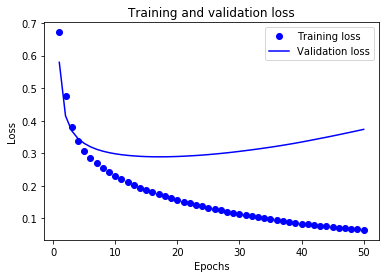

In [59]:
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

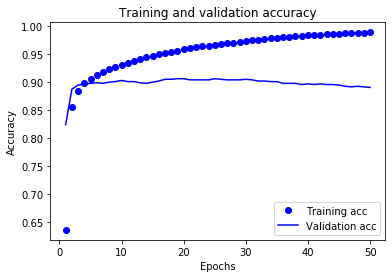

In [60]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

### Data : Corpus with stopwords

In [61]:
file = open('corpus_with_stopwords_to_int', 'rb')
new_data = pickle.load(file)
file.close()

In [62]:
file = open('corpus_with_stopwords_to_int_dictionary', 'rb')
d = pickle.load(file)
file.close()

In [63]:
len(d)

69087

In [64]:
corpus = pd.read_csv('corpus_with_stopwords.csv')
labels = corpus['Labels']

In [65]:
corpus.head()

Unnamed: 0                                            Reviews    Labels
0           0  one of the other review ha mention that after ...  positive
1           1  a wonder littl product br br the film techniqu...  positive
2           2  i thought thi wa a wonder way to spend time on...  positive
3           3  basic there s a famili where a littl boy jake ...  negative
4           4  petter mattei s love in the time of money is a...  positive

In [66]:
new_encoder = LabelEncoder()
new_label = new_encoder.fit_transform(labels)

In [67]:
new_data = keras.preprocessing.sequence.pad_sequences(new_data,
                                                        padding='post')

In [68]:
len(new_data[2])

2514

In [69]:
new_train_data = new_data[:35000]
new_train_label = new_label[:35000]

new_val_data = new_data[35000:40000]
new_val_label = new_label[35000:40000]

new_test_data = new_data[40000:]
new_test_label = new_label[40000:]

In [71]:
train_dataset = tf.data.Dataset.from_tensor_slices((new_train_data, new_train_label))
val_dataset = tf.data.Dataset.from_tensor_slices((new_val_data, new_val_label))
test_dataset = tf.data.Dataset.from_tensor_slices((new_test_data, new_test_label))

train_batches = (train_dataset
                 .padded_batch(32, train_dataset.output_shapes))

val_batches = (val_dataset
                .padded_batch(32, train_dataset.output_shapes))

test_batches = (test_dataset
                .padded_batch(32, train_dataset.output_shapes))

#### New Model 1

In [80]:
model = keras.Sequential([
    keras.layers.Embedding(len(d), 16),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(8, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(1, activation='sigmoid')
])

In [73]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [75]:
history = model.fit(train_batches,
                   epochs=20,
                   validation_data=val_batches,
                   validation_steps=30,
                   callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', mode='min')])

Epoch 1/20


    172/Unknown - 1s 1s/step - loss: 0.7036 - accuracy: 0.46 - 1s 745ms/step - loss: 0.7031 - accuracy: 0.531 - 2s 519ms/step - loss: 0.7028 - accuracy: 0.572 - 2s 405ms/step - loss: 0.7028 - accuracy: 0.562 - 2s 337ms/step - loss: 0.7027 - accuracy: 0.562 - 2s 292ms/step - loss: 0.7024 - accuracy: 0.572 - 2s 261ms/step - loss: 0.7024 - accuracy: 0.567 - 2s 236ms/step - loss: 0.7025 - accuracy: 0.554 - 2s 217ms/step - loss: 0.7025 - accuracy: 0.552 - 2s 201ms/step - loss: 0.7028 - accuracy: 0.537 - 2s 189ms/step - loss: 0.7029 - accuracy: 0.531 - 2s 178ms/step - loss: 0.7029 - accuracy: 0.528 - 2s 169ms/step - loss: 0.7029 - accuracy: 0.526 - 2s 162ms/step - loss: 0.7027 - accuracy: 0.529 - 2s 154ms/step - loss: 0.7027 - accuracy: 0.527 - 2s 147ms/step - loss: 0.7027 - accuracy: 0.525 - 2s 141ms/step - loss: 0.7025 - accuracy: 0.529 - 2s 138ms/step - loss: 0.7023 - accuracy: 0.533 - 3s 134ms/step - loss: 0.7025 - accuracy: 0.526 - 3s 130ms/step - loss: 0.7027 - accuracy: 0.520 - 3s 127

1094/1094 [==============================]6947 - accuracy: 0.512 - 60s 60ms/step - loss: 0.6947 - accuracy: 0.512 - 60s 60ms/step - loss: 0.6947 - accuracy: 0.512 - 61s 60ms/step - loss: 0.6947 - accuracy: 0.512 - 61s 60ms/step - loss: 0.6947 - accuracy: 0.512 - 61s 60ms/step - loss: 0.6947 - accuracy: 0.511 - 61s 60ms/step - loss: 0.6947 - accuracy: 0.512 - 61s 60ms/step - loss: 0.6947 - accuracy: 0.512 - 61s 60ms/step - loss: 0.6947 - accuracy: 0.512 - 61s 60ms/step - loss: 0.6947 - accuracy: 0.512 - 61s 60ms/step - loss: 0.6947 - accuracy: 0.512 - 61s 60ms/step - loss: 0.6947 - accuracy: 0.512 - 61s 60ms/step - loss: 0.6947 - accuracy: 0.512 - 61s 60ms/step - loss: 0.6947 - accuracy: 0.512 - 61s 60ms/step - loss: 0.6947 - accuracy: 0.513 - 61s 60ms/step - loss: 0.6947 - accuracy: 0.513 - 61s 60ms/step - loss: 0.6947 - accuracy: 0.513 - 61s 60ms/step - loss: 0.6947 - accuracy: 0.513 - 61s 60ms/step - loss: 0.6947 - accuracy: 0.513 - 61s 60ms/step - loss: 0.6947 - accuracy: 0.513 - 61

 190/1094 [====>.........................] - ETA: 7:49 - loss: 0.6927 - accuracy: 0.53 - ETA: 4:24 - loss: 0.6918 - accuracy: 0.62 - ETA: 3:16 - loss: 0.6915 - accuracy: 0.63 - ETA: 2:41 - loss: 0.6917 - accuracy: 0.60 - ETA: 2:05 - loss: 0.6916 - accuracy: 0.60 - ETA: 1:55 - loss: 0.6916 - accuracy: 0.59 - ETA: 1:48 - loss: 0.6918 - accuracy: 0.58 - ETA: 1:42 - loss: 0.6918 - accuracy: 0.57 - ETA: 1:38 - loss: 0.6921 - accuracy: 0.56 - ETA: 1:34 - loss: 0.6921 - accuracy: 0.55 - ETA: 1:31 - loss: 0.6921 - accuracy: 0.55 - ETA: 1:29 - loss: 0.6922 - accuracy: 0.54 - ETA: 1:27 - loss: 0.6921 - accuracy: 0.54 - ETA: 1:24 - loss: 0.6921 - accuracy: 0.54 - ETA: 1:23 - loss: 0.6922 - accuracy: 0.54 - ETA: 1:22 - loss: 0.6921 - accuracy: 0.54 - ETA: 1:20 - loss: 0.6920 - accuracy: 0.54 - ETA: 1:19 - loss: 0.6921 - accuracy: 0.54 - ETA: 1:18 - loss: 0.6923 - accuracy: 0.53 - ETA: 1:17 - loss: 0.6923 - accuracy: 0.52 - ETA: 1:16 - loss: 0.6923 - accuracy: 0.52 - ETA: 1:16 - loss: 0.6924 - accu

 188/1094 [====>.........................] - ETA: 8:00 - loss: 0.6668 - accuracy: 0.65 - ETA: 4:35 - loss: 0.6508 - accuracy: 0.70 - ETA: 3:23 - loss: 0.6423 - accuracy: 0.70 - ETA: 2:50 - loss: 0.6426 - accuracy: 0.67 - ETA: 2:30 - loss: 0.6437 - accuracy: 0.67 - ETA: 2:15 - loss: 0.6411 - accuracy: 0.68 - ETA: 2:04 - loss: 0.6433 - accuracy: 0.66 - ETA: 1:56 - loss: 0.6450 - accuracy: 0.65 - ETA: 1:49 - loss: 0.6452 - accuracy: 0.64 - ETA: 1:44 - loss: 0.6508 - accuracy: 0.63 - ETA: 1:40 - loss: 0.6511 - accuracy: 0.62 - ETA: 1:37 - loss: 0.6517 - accuracy: 0.62 - ETA: 1:34 - loss: 0.6535 - accuracy: 0.61 - ETA: 1:31 - loss: 0.6506 - accuracy: 0.61 - ETA: 1:29 - loss: 0.6521 - accuracy: 0.60 - ETA: 1:27 - loss: 0.6538 - accuracy: 0.60 - ETA: 1:26 - loss: 0.6528 - accuracy: 0.60 - ETA: 1:24 - loss: 0.6521 - accuracy: 0.61 - ETA: 1:22 - loss: 0.6540 - accuracy: 0.60 - ETA: 1:21 - loss: 0.6543 - accuracy: 0.60 - ETA: 1:20 - loss: 0.6548 - accuracy: 0.60 - ETA: 1:19 - loss: 0.6545 - accu

1094/1094 [==============================] - ETA: 6s - loss: 0.6095 - accuracy: 0.77 - ETA: 6s - loss: 0.6095 - accuracy: 0.77 - ETA: 6s - loss: 0.6094 - accuracy: 0.77 - ETA: 6s - loss: 0.6094 - accuracy: 0.77 - ETA: 6s - loss: 0.6095 - accuracy: 0.77 - ETA: 6s - loss: 0.6094 - accuracy: 0.77 - ETA: 6s - loss: 0.6094 - accuracy: 0.77 - ETA: 6s - loss: 0.6094 - accuracy: 0.77 - ETA: 6s - loss: 0.6093 - accuracy: 0.77 - ETA: 6s - loss: 0.6092 - accuracy: 0.77 - ETA: 6s - loss: 0.6091 - accuracy: 0.77 - ETA: 6s - loss: 0.6091 - accuracy: 0.77 - ETA: 6s - loss: 0.6090 - accuracy: 0.77 - ETA: 5s - loss: 0.6090 - accuracy: 0.77 - ETA: 5s - loss: 0.6089 - accuracy: 0.77 - ETA: 5s - loss: 0.6088 - accuracy: 0.77 - ETA: 5s - loss: 0.6088 - accuracy: 0.77 - ETA: 5s - loss: 0.6087 - accuracy: 0.77 - ETA: 5s - loss: 0.6087 - accuracy: 0.77 - ETA: 5s - loss: 0.6087 - accuracy: 0.77 - ETA: 5s - loss: 0.6087 - accuracy: 0.77 - ETA: 5s - loss: 0.6087 - accuracy: 0.77 - ETA: 5s - loss: 0.6086 - accura

 190/1094 [====>.........................] - ETA: 8:16 - loss: 0.5830 - accuracy: 0.78 - ETA: 4:39 - loss: 0.5425 - accuracy: 0.84 - ETA: 3:30 - loss: 0.5220 - accuracy: 0.86 - ETA: 2:56 - loss: 0.5280 - accuracy: 0.83 - ETA: 2:35 - loss: 0.5303 - accuracy: 0.82 - ETA: 2:22 - loss: 0.5307 - accuracy: 0.81 - ETA: 2:12 - loss: 0.5354 - accuracy: 0.80 - ETA: 2:03 - loss: 0.5355 - accuracy: 0.80 - ETA: 1:57 - loss: 0.5351 - accuracy: 0.80 - ETA: 1:52 - loss: 0.5465 - accuracy: 0.79 - ETA: 1:47 - loss: 0.5473 - accuracy: 0.78 - ETA: 1:44 - loss: 0.5482 - accuracy: 0.78 - ETA: 1:41 - loss: 0.5521 - accuracy: 0.78 - ETA: 1:38 - loss: 0.5454 - accuracy: 0.79 - ETA: 1:36 - loss: 0.5480 - accuracy: 0.79 - ETA: 1:34 - loss: 0.5520 - accuracy: 0.78 - ETA: 1:32 - loss: 0.5515 - accuracy: 0.79 - ETA: 1:31 - loss: 0.5527 - accuracy: 0.79 - ETA: 1:29 - loss: 0.5550 - accuracy: 0.79 - ETA: 1:28 - loss: 0.5532 - accuracy: 0.79 - ETA: 1:27 - loss: 0.5525 - accuracy: 0.79 - ETA: 1:25 - loss: 0.5526 - accu

 190/1094 [====>.........................] - ETA: 10:18 - loss: 0.4992 - accuracy: 0.843 - ETA: 5:38 - loss: 0.4553 - accuracy: 0.906 - ETA: 3:13 - loss: 0.4466 - accuracy: 0.89 - ETA: 2:45 - loss: 0.4466 - accuracy: 0.88 - ETA: 2:28 - loss: 0.4526 - accuracy: 0.87 - ETA: 2:15 - loss: 0.4569 - accuracy: 0.86 - ETA: 2:07 - loss: 0.4554 - accuracy: 0.86 - ETA: 1:59 - loss: 0.4537 - accuracy: 0.86 - ETA: 1:53 - loss: 0.4649 - accuracy: 0.85 - ETA: 1:43 - loss: 0.4680 - accuracy: 0.85 - ETA: 1:41 - loss: 0.4741 - accuracy: 0.85 - ETA: 1:38 - loss: 0.4673 - accuracy: 0.85 - ETA: 1:36 - loss: 0.4694 - accuracy: 0.85 - ETA: 1:35 - loss: 0.4741 - accuracy: 0.85 - ETA: 1:33 - loss: 0.4748 - accuracy: 0.85 - ETA: 1:32 - loss: 0.4769 - accuracy: 0.85 - ETA: 1:30 - loss: 0.4788 - accuracy: 0.84 - ETA: 1:29 - loss: 0.4764 - accuracy: 0.84 - ETA: 1:29 - loss: 0.4751 - accuracy: 0.84 - ETA: 1:29 - loss: 0.4759 - accuracy: 0.84 - ETA: 1:28 - loss: 0.4737 - accuracy: 0.85 - ETA: 1:28 - loss: 0.4748 - a

1094/1094 [==============================] - ETA: 9s - loss: 0.4505 - accuracy: 0.86 - ETA: 9s - loss: 0.4504 - accuracy: 0.86 - ETA: 8s - loss: 0.4505 - accuracy: 0.86 - ETA: 8s - loss: 0.4504 - accuracy: 0.86 - ETA: 8s - loss: 0.4502 - accuracy: 0.86 - ETA: 8s - loss: 0.4503 - accuracy: 0.86 - ETA: 8s - loss: 0.4502 - accuracy: 0.86 - ETA: 8s - loss: 0.4502 - accuracy: 0.86 - ETA: 8s - loss: 0.4502 - accuracy: 0.86 - ETA: 8s - loss: 0.4502 - accuracy: 0.86 - ETA: 8s - loss: 0.4501 - accuracy: 0.86 - ETA: 8s - loss: 0.4500 - accuracy: 0.86 - ETA: 8s - loss: 0.4501 - accuracy: 0.86 - ETA: 8s - loss: 0.4501 - accuracy: 0.86 - ETA: 8s - loss: 0.4501 - accuracy: 0.86 - ETA: 8s - loss: 0.4500 - accuracy: 0.86 - ETA: 8s - loss: 0.4500 - accuracy: 0.86 - ETA: 8s - loss: 0.4500 - accuracy: 0.86 - ETA: 7s - loss: 0.4499 - accuracy: 0.86 - ETA: 7s - loss: 0.4499 - accuracy: 0.86 - ETA: 7s - loss: 0.4498 - accuracy: 0.86 - ETA: 7s - loss: 0.4500 - accuracy: 0.86 - ETA: 7s - loss: 0.4499 - accura

 186/1094 [====>.........................] - ETA: 8:25 - loss: 0.4360 - accuracy: 0.87 - ETA: 4:39 - loss: 0.3939 - accuracy: 0.92 - ETA: 3:27 - loss: 0.3742 - accuracy: 0.93 - ETA: 2:53 - loss: 0.3925 - accuracy: 0.91 - ETA: 2:31 - loss: 0.3915 - accuracy: 0.90 - ETA: 2:19 - loss: 0.4030 - accuracy: 0.89 - ETA: 2:08 - loss: 0.4054 - accuracy: 0.89 - ETA: 2:01 - loss: 0.4029 - accuracy: 0.89 - ETA: 1:54 - loss: 0.3994 - accuracy: 0.89 - ETA: 1:49 - loss: 0.4090 - accuracy: 0.89 - ETA: 1:46 - loss: 0.4117 - accuracy: 0.88 - ETA: 1:42 - loss: 0.4131 - accuracy: 0.88 - ETA: 1:39 - loss: 0.4210 - accuracy: 0.87 - ETA: 1:36 - loss: 0.4148 - accuracy: 0.88 - ETA: 1:34 - loss: 0.4165 - accuracy: 0.88 - ETA: 1:32 - loss: 0.4212 - accuracy: 0.88 - ETA: 1:30 - loss: 0.4228 - accuracy: 0.87 - ETA: 1:29 - loss: 0.4248 - accuracy: 0.87 - ETA: 1:27 - loss: 0.4260 - accuracy: 0.87 - ETA: 1:26 - loss: 0.4240 - accuracy: 0.87 - ETA: 1:25 - loss: 0.4223 - accuracy: 0.87 - ETA: 1:24 - loss: 0.4239 - accu

 187/1094 [====>.........................] - ETA: 8:21 - loss: 0.3907 - accuracy: 0.90 - ETA: 4:48 - loss: 0.3509 - accuracy: 0.93 - ETA: 3:33 - loss: 0.3337 - accuracy: 0.94 - ETA: 2:29 - loss: 0.3531 - accuracy: 0.91 - ETA: 2:16 - loss: 0.3694 - accuracy: 0.90 - ETA: 2:05 - loss: 0.3698 - accuracy: 0.90 - ETA: 1:59 - loss: 0.3664 - accuracy: 0.91 - ETA: 1:52 - loss: 0.3616 - accuracy: 0.91 - ETA: 1:47 - loss: 0.3694 - accuracy: 0.90 - ETA: 1:43 - loss: 0.3726 - accuracy: 0.90 - ETA: 1:39 - loss: 0.3740 - accuracy: 0.90 - ETA: 1:37 - loss: 0.3828 - accuracy: 0.89 - ETA: 1:35 - loss: 0.3771 - accuracy: 0.89 - ETA: 1:33 - loss: 0.3786 - accuracy: 0.89 - ETA: 1:31 - loss: 0.3830 - accuracy: 0.89 - ETA: 1:30 - loss: 0.3854 - accuracy: 0.89 - ETA: 1:28 - loss: 0.3871 - accuracy: 0.89 - ETA: 1:27 - loss: 0.3878 - accuracy: 0.89 - ETA: 1:25 - loss: 0.3865 - accuracy: 0.89 - ETA: 1:24 - loss: 0.3846 - accuracy: 0.89 - ETA: 1:23 - loss: 0.3867 - accuracy: 0.89 - ETA: 1:23 - loss: 0.3835 - accu

1094/1094 [==============================] - ETA: 9s - loss: 0.3761 - accuracy: 0.89 - ETA: 9s - loss: 0.3760 - accuracy: 0.89 - ETA: 9s - loss: 0.3760 - accuracy: 0.89 - ETA: 9s - loss: 0.3759 - accuracy: 0.89 - ETA: 9s - loss: 0.3758 - accuracy: 0.89 - ETA: 9s - loss: 0.3758 - accuracy: 0.89 - ETA: 9s - loss: 0.3759 - accuracy: 0.89 - ETA: 9s - loss: 0.3759 - accuracy: 0.89 - ETA: 9s - loss: 0.3759 - accuracy: 0.89 - ETA: 9s - loss: 0.3760 - accuracy: 0.89 - ETA: 9s - loss: 0.3760 - accuracy: 0.89 - ETA: 8s - loss: 0.3759 - accuracy: 0.89 - ETA: 8s - loss: 0.3759 - accuracy: 0.89 - ETA: 8s - loss: 0.3759 - accuracy: 0.89 - ETA: 8s - loss: 0.3758 - accuracy: 0.89 - ETA: 8s - loss: 0.3757 - accuracy: 0.89 - ETA: 8s - loss: 0.3757 - accuracy: 0.89 - ETA: 8s - loss: 0.3756 - accuracy: 0.89 - ETA: 8s - loss: 0.3757 - accuracy: 0.89 - ETA: 8s - loss: 0.3757 - accuracy: 0.89 - ETA: 8s - loss: 0.3757 - accuracy: 0.89 - ETA: 8s - loss: 0.3756 - accuracy: 0.89 - ETA: 8s - loss: 0.3755 - accura

 186/1094 [====>.........................] - ETA: 8:14 - loss: 0.3571 - accuracy: 0.93 - ETA: 4:42 - loss: 0.3195 - accuracy: 0.93 - ETA: 3:32 - loss: 0.3045 - accuracy: 0.93 - ETA: 2:56 - loss: 0.3269 - accuracy: 0.91 - ETA: 2:33 - loss: 0.3250 - accuracy: 0.90 - ETA: 2:18 - loss: 0.3448 - accuracy: 0.90 - ETA: 2:07 - loss: 0.3434 - accuracy: 0.90 - ETA: 1:59 - loss: 0.3393 - accuracy: 0.90 - ETA: 1:54 - loss: 0.3337 - accuracy: 0.91 - ETA: 1:48 - loss: 0.3399 - accuracy: 0.90 - ETA: 1:44 - loss: 0.3435 - accuracy: 0.91 - ETA: 1:41 - loss: 0.3445 - accuracy: 0.90 - ETA: 1:38 - loss: 0.3541 - accuracy: 0.90 - ETA: 1:36 - loss: 0.3489 - accuracy: 0.90 - ETA: 1:34 - loss: 0.3501 - accuracy: 0.90 - ETA: 1:32 - loss: 0.3543 - accuracy: 0.90 - ETA: 1:30 - loss: 0.3573 - accuracy: 0.90 - ETA: 1:28 - loss: 0.3588 - accuracy: 0.90 - ETA: 1:27 - loss: 0.3592 - accuracy: 0.89 - ETA: 1:26 - loss: 0.3582 - accuracy: 0.90 - ETA: 1:25 - loss: 0.3564 - accuracy: 0.89 - ETA: 1:24 - loss: 0.3586 - accu

 186/1094 [====>.........................] - ETA: 8:17 - loss: 0.3306 - accuracy: 0.93 - ETA: 4:38 - loss: 0.2955 - accuracy: 0.93 - ETA: 3:27 - loss: 0.2828 - accuracy: 0.93 - ETA: 2:51 - loss: 0.3054 - accuracy: 0.91 - ETA: 2:30 - loss: 0.3034 - accuracy: 0.91 - ETA: 2:16 - loss: 0.3259 - accuracy: 0.90 - ETA: 2:05 - loss: 0.3230 - accuracy: 0.91 - ETA: 1:58 - loss: 0.3182 - accuracy: 0.91 - ETA: 1:52 - loss: 0.3122 - accuracy: 0.92 - ETA: 1:47 - loss: 0.3170 - accuracy: 0.92 - ETA: 1:42 - loss: 0.3208 - accuracy: 0.92 - ETA: 1:39 - loss: 0.3215 - accuracy: 0.92 - ETA: 1:37 - loss: 0.3318 - accuracy: 0.91 - ETA: 1:35 - loss: 0.3269 - accuracy: 0.91 - ETA: 1:33 - loss: 0.3279 - accuracy: 0.91 - ETA: 1:31 - loss: 0.3318 - accuracy: 0.91 - ETA: 1:29 - loss: 0.3353 - accuracy: 0.91 - ETA: 1:28 - loss: 0.3368 - accuracy: 0.91 - ETA: 1:26 - loss: 0.3369 - accuracy: 0.91 - ETA: 1:25 - loss: 0.3363 - accuracy: 0.91 - ETA: 1:24 - loss: 0.3345 - accuracy: 0.90 - ETA: 1:23 - loss: 0.3367 - accu

1094/1094 [==============================] - ETA: 10s - loss: 0.3336 - accuracy: 0.901 - ETA: 9s - loss: 0.3335 - accuracy: 0.902 - ETA: 9s - loss: 0.3335 - accuracy: 0.90 - ETA: 9s - loss: 0.3335 - accuracy: 0.90 - ETA: 9s - loss: 0.3336 - accuracy: 0.90 - ETA: 9s - loss: 0.3335 - accuracy: 0.90 - ETA: 9s - loss: 0.3336 - accuracy: 0.90 - ETA: 9s - loss: 0.3335 - accuracy: 0.90 - ETA: 9s - loss: 0.3334 - accuracy: 0.90 - ETA: 9s - loss: 0.3333 - accuracy: 0.90 - ETA: 9s - loss: 0.3333 - accuracy: 0.90 - ETA: 9s - loss: 0.3333 - accuracy: 0.90 - ETA: 9s - loss: 0.3334 - accuracy: 0.90 - ETA: 9s - loss: 0.3334 - accuracy: 0.90 - ETA: 9s - loss: 0.3334 - accuracy: 0.90 - ETA: 9s - loss: 0.3335 - accuracy: 0.90 - ETA: 9s - loss: 0.3335 - accuracy: 0.90 - ETA: 8s - loss: 0.3334 - accuracy: 0.90 - ETA: 8s - loss: 0.3334 - accuracy: 0.90 - ETA: 8s - loss: 0.3334 - accuracy: 0.90 - ETA: 8s - loss: 0.3333 - accuracy: 0.90 - ETA: 8s - loss: 0.3332 - accuracy: 0.90 - ETA: 8s - loss: 0.3332 - acc

 188/1094 [====>.........................] - ETA: 8:32 - loss: 0.3093 - accuracy: 0.93 - ETA: 4:46 - loss: 0.2758 - accuracy: 0.93 - ETA: 3:32 - loss: 0.2651 - accuracy: 0.93 - ETA: 2:57 - loss: 0.2878 - accuracy: 0.91 - ETA: 2:35 - loss: 0.2859 - accuracy: 0.91 - ETA: 2:20 - loss: 0.3106 - accuracy: 0.90 - ETA: 2:09 - loss: 0.3064 - accuracy: 0.91 - ETA: 2:01 - loss: 0.3011 - accuracy: 0.91 - ETA: 1:54 - loss: 0.2949 - accuracy: 0.91 - ETA: 1:49 - loss: 0.2985 - accuracy: 0.91 - ETA: 1:46 - loss: 0.3025 - accuracy: 0.92 - ETA: 1:42 - loss: 0.3028 - accuracy: 0.92 - ETA: 1:39 - loss: 0.3138 - accuracy: 0.91 - ETA: 1:36 - loss: 0.3091 - accuracy: 0.91 - ETA: 1:34 - loss: 0.3100 - accuracy: 0.91 - ETA: 1:32 - loss: 0.3136 - accuracy: 0.91 - ETA: 1:30 - loss: 0.3174 - accuracy: 0.91 - ETA: 1:29 - loss: 0.3190 - accuracy: 0.91 - ETA: 1:27 - loss: 0.3188 - accuracy: 0.91 - ETA: 1:26 - loss: 0.3186 - accuracy: 0.91 - ETA: 1:25 - loss: 0.3169 - accuracy: 0.91 - ETA: 1:24 - loss: 0.3186 - accu

 186/1094 [====>.........................] - ETA: 8:21 - loss: 0.2915 - accuracy: 0.96 - ETA: 4:45 - loss: 0.2597 - accuracy: 0.95 - ETA: 3:33 - loss: 0.2507 - accuracy: 0.94 - ETA: 2:55 - loss: 0.2731 - accuracy: 0.92 - ETA: 2:35 - loss: 0.2713 - accuracy: 0.91 - ETA: 2:19 - loss: 0.2977 - accuracy: 0.91 - ETA: 2:08 - loss: 0.2926 - accuracy: 0.91 - ETA: 2:00 - loss: 0.2869 - accuracy: 0.92 - ETA: 1:53 - loss: 0.2806 - accuracy: 0.92 - ETA: 1:49 - loss: 0.2833 - accuracy: 0.92 - ETA: 1:45 - loss: 0.2873 - accuracy: 0.92 - ETA: 1:42 - loss: 0.2873 - accuracy: 0.92 - ETA: 1:38 - loss: 0.2989 - accuracy: 0.92 - ETA: 1:36 - loss: 0.2942 - accuracy: 0.92 - ETA: 1:34 - loss: 0.2951 - accuracy: 0.92 - ETA: 1:32 - loss: 0.2985 - accuracy: 0.91 - ETA: 1:30 - loss: 0.3026 - accuracy: 0.91 - ETA: 1:29 - loss: 0.3043 - accuracy: 0.91 - ETA: 1:27 - loss: 0.3039 - accuracy: 0.91 - ETA: 1:26 - loss: 0.3039 - accuracy: 0.91 - ETA: 1:25 - loss: 0.3023 - accuracy: 0.91 - ETA: 1:24 - loss: 0.3036 - accu

1094/1094 [==============================] - ETA: 9s - loss: 0.3044 - accuracy: 0.91 - ETA: 9s - loss: 0.3044 - accuracy: 0.91 - ETA: 9s - loss: 0.3044 - accuracy: 0.91 - ETA: 9s - loss: 0.3043 - accuracy: 0.91 - ETA: 9s - loss: 0.3044 - accuracy: 0.91 - ETA: 9s - loss: 0.3043 - accuracy: 0.91 - ETA: 9s - loss: 0.3042 - accuracy: 0.91 - ETA: 9s - loss: 0.3041 - accuracy: 0.91 - ETA: 9s - loss: 0.3041 - accuracy: 0.91 - ETA: 9s - loss: 0.3042 - accuracy: 0.91 - ETA: 9s - loss: 0.3042 - accuracy: 0.91 - ETA: 9s - loss: 0.3042 - accuracy: 0.91 - ETA: 9s - loss: 0.3042 - accuracy: 0.91 - ETA: 8s - loss: 0.3043 - accuracy: 0.91 - ETA: 8s - loss: 0.3043 - accuracy: 0.91 - ETA: 8s - loss: 0.3043 - accuracy: 0.91 - ETA: 8s - loss: 0.3042 - accuracy: 0.91 - ETA: 8s - loss: 0.3042 - accuracy: 0.91 - ETA: 8s - loss: 0.3041 - accuracy: 0.91 - ETA: 8s - loss: 0.3040 - accuracy: 0.91 - ETA: 8s - loss: 0.3040 - accuracy: 0.91 - ETA: 8s - loss: 0.3040 - accuracy: 0.91 - ETA: 8s - loss: 0.3041 - accura

 186/1094 [====>.........................] - ETA: 8:39 - loss: 0.2762 - accuracy: 0.96 - ETA: 4:49 - loss: 0.2459 - accuracy: 0.95 - ETA: 3:33 - loss: 0.2386 - accuracy: 0.94 - ETA: 2:56 - loss: 0.2606 - accuracy: 0.92 - ETA: 2:32 - loss: 0.2589 - accuracy: 0.91 - ETA: 2:17 - loss: 0.2866 - accuracy: 0.91 - ETA: 2:08 - loss: 0.2807 - accuracy: 0.91 - ETA: 2:00 - loss: 0.2746 - accuracy: 0.91 - ETA: 1:53 - loss: 0.2685 - accuracy: 0.92 - ETA: 1:49 - loss: 0.2703 - accuracy: 0.92 - ETA: 1:45 - loss: 0.2744 - accuracy: 0.92 - ETA: 1:41 - loss: 0.2741 - accuracy: 0.92 - ETA: 1:38 - loss: 0.2862 - accuracy: 0.92 - ETA: 1:35 - loss: 0.2815 - accuracy: 0.92 - ETA: 1:33 - loss: 0.2823 - accuracy: 0.92 - ETA: 1:31 - loss: 0.2856 - accuracy: 0.91 - ETA: 1:30 - loss: 0.2900 - accuracy: 0.91 - ETA: 1:28 - loss: 0.2917 - accuracy: 0.91 - ETA: 1:27 - loss: 0.2911 - accuracy: 0.91 - ETA: 1:26 - loss: 0.2914 - accuracy: 0.92 - ETA: 1:25 - loss: 0.2899 - accuracy: 0.91 - ETA: 1:24 - loss: 0.2907 - accu

 186/1094 [====>.........................] - ETA: 7:59 - loss: 0.2633 - accuracy: 0.96 - ETA: 4:32 - loss: 0.2341 - accuracy: 0.95 - ETA: 3:23 - loss: 0.2281 - accuracy: 0.94 - ETA: 2:49 - loss: 0.2498 - accuracy: 0.92 - ETA: 2:27 - loss: 0.2481 - accuracy: 0.92 - ETA: 2:13 - loss: 0.2768 - accuracy: 0.91 - ETA: 2:03 - loss: 0.2703 - accuracy: 0.91 - ETA: 1:55 - loss: 0.2639 - accuracy: 0.92 - ETA: 1:50 - loss: 0.2579 - accuracy: 0.92 - ETA: 1:45 - loss: 0.2590 - accuracy: 0.93 - ETA: 1:41 - loss: 0.2631 - accuracy: 0.93 - ETA: 1:38 - loss: 0.2625 - accuracy: 0.93 - ETA: 1:35 - loss: 0.2752 - accuracy: 0.93 - ETA: 1:32 - loss: 0.2705 - accuracy: 0.92 - ETA: 1:30 - loss: 0.2712 - accuracy: 0.92 - ETA: 1:29 - loss: 0.2743 - accuracy: 0.92 - ETA: 1:27 - loss: 0.2790 - accuracy: 0.92 - ETA: 1:27 - loss: 0.2808 - accuracy: 0.92 - ETA: 1:25 - loss: 0.2800 - accuracy: 0.92 - ETA: 1:24 - loss: 0.2805 - accuracy: 0.92 - ETA: 1:23 - loss: 0.2791 - accuracy: 0.92 - ETA: 1:22 - loss: 0.2794 - accu

1094/1094 [==============================] - ETA: 7s - loss: 0.2817 - accuracy: 0.91 - ETA: 7s - loss: 0.2818 - accuracy: 0.91 - ETA: 7s - loss: 0.2818 - accuracy: 0.91 - ETA: 7s - loss: 0.2818 - accuracy: 0.91 - ETA: 7s - loss: 0.2818 - accuracy: 0.91 - ETA: 7s - loss: 0.2819 - accuracy: 0.91 - ETA: 7s - loss: 0.2818 - accuracy: 0.91 - ETA: 7s - loss: 0.2817 - accuracy: 0.91 - ETA: 7s - loss: 0.2818 - accuracy: 0.91 - ETA: 7s - loss: 0.2817 - accuracy: 0.91 - ETA: 7s - loss: 0.2819 - accuracy: 0.91 - ETA: 7s - loss: 0.2820 - accuracy: 0.91 - ETA: 7s - loss: 0.2820 - accuracy: 0.91 - ETA: 7s - loss: 0.2820 - accuracy: 0.91 - ETA: 7s - loss: 0.2820 - accuracy: 0.91 - ETA: 6s - loss: 0.2821 - accuracy: 0.91 - ETA: 6s - loss: 0.2819 - accuracy: 0.91 - ETA: 6s - loss: 0.2819 - accuracy: 0.91 - ETA: 6s - loss: 0.2821 - accuracy: 0.91 - ETA: 6s - loss: 0.2820 - accuracy: 0.91 - ETA: 6s - loss: 0.2821 - accuracy: 0.91 - ETA: 6s - loss: 0.2822 - accuracy: 0.91 - ETA: 6s - loss: 0.2823 - accura

 218/1094 [====>.........................] - ETA: 8:30 - loss: 0.2518 - accuracy: 1.00 - ETA: 3:23 - loss: 0.2190 - accuracy: 0.95 - ETA: 2:46 - loss: 0.2402 - accuracy: 0.93 - ETA: 2:07 - loss: 0.2679 - accuracy: 0.92 - ETA: 1:48 - loss: 0.2544 - accuracy: 0.92 - ETA: 1:36 - loss: 0.2490 - accuracy: 0.93 - ETA: 1:34 - loss: 0.2530 - accuracy: 0.93 - ETA: 1:33 - loss: 0.2523 - accuracy: 0.94 - ETA: 1:31 - loss: 0.2655 - accuracy: 0.93 - ETA: 1:29 - loss: 0.2607 - accuracy: 0.93 - ETA: 1:28 - loss: 0.2615 - accuracy: 0.92 - ETA: 1:26 - loss: 0.2645 - accuracy: 0.92 - ETA: 1:22 - loss: 0.2712 - accuracy: 0.92 - ETA: 1:21 - loss: 0.2702 - accuracy: 0.92 - ETA: 1:20 - loss: 0.2710 - accuracy: 0.92 - ETA: 1:20 - loss: 0.2697 - accuracy: 0.92 - ETA: 1:19 - loss: 0.2694 - accuracy: 0.92 - ETA: 1:18 - loss: 0.2658 - accuracy: 0.92 - ETA: 1:18 - loss: 0.2674 - accuracy: 0.92 - ETA: 1:16 - loss: 0.2686 - accuracy: 0.92 - ETA: 1:15 - loss: 0.2718 - accuracy: 0.92 - ETA: 1:15 - loss: 0.2737 - accu

 187/1094 [====>.........................] - ETA: 8:04 - loss: 0.2416 - accuracy: 1.00 - ETA: 4:34 - loss: 0.2144 - accuracy: 0.96 - ETA: 3:26 - loss: 0.2107 - accuracy: 0.95 - ETA: 2:50 - loss: 0.2315 - accuracy: 0.94 - ETA: 2:27 - loss: 0.2300 - accuracy: 0.93 - ETA: 2:12 - loss: 0.2598 - accuracy: 0.92 - ETA: 2:02 - loss: 0.2526 - accuracy: 0.92 - ETA: 1:54 - loss: 0.2458 - accuracy: 0.93 - ETA: 1:48 - loss: 0.2402 - accuracy: 0.93 - ETA: 1:44 - loss: 0.2400 - accuracy: 0.94 - ETA: 1:40 - loss: 0.2441 - accuracy: 0.94 - ETA: 1:36 - loss: 0.2432 - accuracy: 0.94 - ETA: 1:34 - loss: 0.2568 - accuracy: 0.93 - ETA: 1:32 - loss: 0.2520 - accuracy: 0.93 - ETA: 1:29 - loss: 0.2528 - accuracy: 0.93 - ETA: 1:27 - loss: 0.2556 - accuracy: 0.93 - ETA: 1:26 - loss: 0.2608 - accuracy: 0.93 - ETA: 1:25 - loss: 0.2626 - accuracy: 0.92 - ETA: 1:23 - loss: 0.2615 - accuracy: 0.93 - ETA: 1:22 - loss: 0.2624 - accuracy: 0.93 - ETA: 1:20 - loss: 0.2612 - accuracy: 0.93 - ETA: 1:19 - loss: 0.2605 - accu

1094/1094 [==============================] - ETA: 8s - loss: 0.2639 - accuracy: 0.92 - ETA: 8s - loss: 0.2640 - accuracy: 0.92 - ETA: 8s - loss: 0.2639 - accuracy: 0.92 - ETA: 8s - loss: 0.2639 - accuracy: 0.92 - ETA: 8s - loss: 0.2638 - accuracy: 0.92 - ETA: 8s - loss: 0.2639 - accuracy: 0.92 - ETA: 8s - loss: 0.2638 - accuracy: 0.92 - ETA: 8s - loss: 0.2637 - accuracy: 0.92 - ETA: 8s - loss: 0.2637 - accuracy: 0.92 - ETA: 8s - loss: 0.2637 - accuracy: 0.92 - ETA: 8s - loss: 0.2638 - accuracy: 0.92 - ETA: 8s - loss: 0.2637 - accuracy: 0.92 - ETA: 7s - loss: 0.2637 - accuracy: 0.92 - ETA: 7s - loss: 0.2637 - accuracy: 0.92 - ETA: 7s - loss: 0.2636 - accuracy: 0.92 - ETA: 7s - loss: 0.2637 - accuracy: 0.92 - ETA: 7s - loss: 0.2638 - accuracy: 0.92 - ETA: 7s - loss: 0.2638 - accuracy: 0.92 - ETA: 7s - loss: 0.2637 - accuracy: 0.92 - ETA: 7s - loss: 0.2638 - accuracy: 0.92 - ETA: 7s - loss: 0.2637 - accuracy: 0.92 - ETA: 7s - loss: 0.2637 - accuracy: 0.92 - ETA: 7s - loss: 0.2637 - accura

 187/1094 [====>.........................] - ETA: 8:17 - loss: 0.2325 - accuracy: 1.00 - ETA: 4:36 - loss: 0.2060 - accuracy: 0.96 - ETA: 3:25 - loss: 0.2033 - accuracy: 0.95 - ETA: 2:49 - loss: 0.2236 - accuracy: 0.94 - ETA: 2:28 - loss: 0.2223 - accuracy: 0.93 - ETA: 2:16 - loss: 0.2523 - accuracy: 0.92 - ETA: 2:06 - loss: 0.2450 - accuracy: 0.92 - ETA: 1:58 - loss: 0.2380 - accuracy: 0.93 - ETA: 1:52 - loss: 0.2325 - accuracy: 0.93 - ETA: 1:48 - loss: 0.2319 - accuracy: 0.94 - ETA: 1:43 - loss: 0.2359 - accuracy: 0.94 - ETA: 1:40 - loss: 0.2349 - accuracy: 0.94 - ETA: 1:37 - loss: 0.2489 - accuracy: 0.93 - ETA: 1:34 - loss: 0.2440 - accuracy: 0.93 - ETA: 1:33 - loss: 0.2449 - accuracy: 0.93 - ETA: 1:31 - loss: 0.2476 - accuracy: 0.93 - ETA: 1:30 - loss: 0.2530 - accuracy: 0.93 - ETA: 1:28 - loss: 0.2548 - accuracy: 0.92 - ETA: 1:27 - loss: 0.2535 - accuracy: 0.93 - ETA: 1:26 - loss: 0.2546 - accuracy: 0.93 - ETA: 1:24 - loss: 0.2535 - accuracy: 0.93 - ETA: 1:23 - loss: 0.2525 - accu

 187/1094 [====>.........................] - ETA: 8:44 - loss: 0.2245 - accuracy: 1.00 - ETA: 4:54 - loss: 0.1984 - accuracy: 0.96 - ETA: 3:36 - loss: 0.1966 - accuracy: 0.95 - ETA: 2:58 - loss: 0.2164 - accuracy: 0.94 - ETA: 2:17 - loss: 0.2454 - accuracy: 0.93 - ETA: 2:07 - loss: 0.2379 - accuracy: 0.93 - ETA: 2:00 - loss: 0.2308 - accuracy: 0.93 - ETA: 1:53 - loss: 0.2255 - accuracy: 0.93 - ETA: 1:48 - loss: 0.2245 - accuracy: 0.94 - ETA: 1:44 - loss: 0.2285 - accuracy: 0.94 - ETA: 1:41 - loss: 0.2273 - accuracy: 0.94 - ETA: 1:39 - loss: 0.2418 - accuracy: 0.93 - ETA: 1:36 - loss: 0.2368 - accuracy: 0.93 - ETA: 1:34 - loss: 0.2376 - accuracy: 0.93 - ETA: 1:32 - loss: 0.2402 - accuracy: 0.93 - ETA: 1:31 - loss: 0.2458 - accuracy: 0.93 - ETA: 1:29 - loss: 0.2477 - accuracy: 0.93 - ETA: 1:28 - loss: 0.2462 - accuracy: 0.93 - ETA: 1:26 - loss: 0.2475 - accuracy: 0.93 - ETA: 1:25 - loss: 0.2465 - accuracy: 0.93 - ETA: 1:24 - loss: 0.2452 - accuracy: 0.93 - ETA: 1:23 - loss: 0.2417 - accu

1094/1094 [==============================] - ETA: 9s - loss: 0.2488 - accuracy: 0.92 - ETA: 9s - loss: 0.2488 - accuracy: 0.92 - ETA: 9s - loss: 0.2487 - accuracy: 0.92 - ETA: 9s - loss: 0.2487 - accuracy: 0.92 - ETA: 9s - loss: 0.2486 - accuracy: 0.92 - ETA: 9s - loss: 0.2485 - accuracy: 0.92 - ETA: 9s - loss: 0.2485 - accuracy: 0.92 - ETA: 9s - loss: 0.2486 - accuracy: 0.92 - ETA: 9s - loss: 0.2487 - accuracy: 0.92 - ETA: 9s - loss: 0.2487 - accuracy: 0.92 - ETA: 9s - loss: 0.2487 - accuracy: 0.92 - ETA: 9s - loss: 0.2487 - accuracy: 0.92 - ETA: 8s - loss: 0.2487 - accuracy: 0.92 - ETA: 8s - loss: 0.2487 - accuracy: 0.92 - ETA: 8s - loss: 0.2486 - accuracy: 0.92 - ETA: 8s - loss: 0.2486 - accuracy: 0.92 - ETA: 8s - loss: 0.2485 - accuracy: 0.92 - ETA: 8s - loss: 0.2484 - accuracy: 0.92 - ETA: 8s - loss: 0.2485 - accuracy: 0.92 - ETA: 8s - loss: 0.2485 - accuracy: 0.92 - ETA: 8s - loss: 0.2485 - accuracy: 0.92 - ETA: 8s - loss: 0.2485 - accuracy: 0.92 - ETA: 8s - loss: 0.2484 - accura

 187/1094 [====>.........................] - ETA: 8:59 - loss: 0.2174 - accuracy: 1.00 - ETA: 5:00 - loss: 0.1915 - accuracy: 0.96 - ETA: 3:43 - loss: 0.1904 - accuracy: 0.96 - ETA: 3:01 - loss: 0.2097 - accuracy: 0.95 - ETA: 2:38 - loss: 0.2086 - accuracy: 0.95 - ETA: 2:24 - loss: 0.2388 - accuracy: 0.93 - ETA: 2:12 - loss: 0.2313 - accuracy: 0.93 - ETA: 2:03 - loss: 0.2240 - accuracy: 0.94 - ETA: 1:57 - loss: 0.2189 - accuracy: 0.94 - ETA: 1:51 - loss: 0.2176 - accuracy: 0.94 - ETA: 1:47 - loss: 0.2216 - accuracy: 0.94 - ETA: 1:43 - loss: 0.2203 - accuracy: 0.94 - ETA: 1:40 - loss: 0.2351 - accuracy: 0.94 - ETA: 1:37 - loss: 0.2301 - accuracy: 0.94 - ETA: 1:35 - loss: 0.2310 - accuracy: 0.93 - ETA: 1:33 - loss: 0.2335 - accuracy: 0.93 - ETA: 1:31 - loss: 0.2392 - accuracy: 0.93 - ETA: 1:29 - loss: 0.2411 - accuracy: 0.93 - ETA: 1:28 - loss: 0.2395 - accuracy: 0.93 - ETA: 1:27 - loss: 0.2409 - accuracy: 0.93 - ETA: 1:26 - loss: 0.2400 - accuracy: 0.93 - ETA: 1:25 - loss: 0.2384 - accu

 186/1094 [====>.........................] - ETA: 8:22 - loss: 0.2110 - accuracy: 1.00 - ETA: 4:41 - loss: 0.1852 - accuracy: 0.98 - ETA: 3:29 - loss: 0.1846 - accuracy: 0.97 - ETA: 2:52 - loss: 0.2035 - accuracy: 0.96 - ETA: 2:29 - loss: 0.2025 - accuracy: 0.95 - ETA: 2:15 - loss: 0.2326 - accuracy: 0.94 - ETA: 2:05 - loss: 0.2251 - accuracy: 0.94 - ETA: 1:56 - loss: 0.2178 - accuracy: 0.95 - ETA: 1:50 - loss: 0.2127 - accuracy: 0.95 - ETA: 1:45 - loss: 0.2112 - accuracy: 0.95 - ETA: 1:42 - loss: 0.2151 - accuracy: 0.95 - ETA: 1:39 - loss: 0.2138 - accuracy: 0.95 - ETA: 1:36 - loss: 0.2290 - accuracy: 0.94 - ETA: 1:34 - loss: 0.2239 - accuracy: 0.94 - ETA: 1:32 - loss: 0.2248 - accuracy: 0.94 - ETA: 1:30 - loss: 0.2272 - accuracy: 0.94 - ETA: 1:28 - loss: 0.2331 - accuracy: 0.94 - ETA: 1:27 - loss: 0.2349 - accuracy: 0.93 - ETA: 1:25 - loss: 0.2333 - accuracy: 0.93 - ETA: 1:24 - loss: 0.2348 - accuracy: 0.93 - ETA: 1:23 - loss: 0.2340 - accuracy: 0.93 - ETA: 1:22 - loss: 0.2322 - accu

1094/1094 [==============================] - ETA: 10s - loss: 0.2355 - accuracy: 0.930 - ETA: 9s - loss: 0.2355 - accuracy: 0.930 - ETA: 9s - loss: 0.2355 - accuracy: 0.93 - ETA: 9s - loss: 0.2355 - accuracy: 0.93 - ETA: 9s - loss: 0.2356 - accuracy: 0.93 - ETA: 9s - loss: 0.2355 - accuracy: 0.93 - ETA: 9s - loss: 0.2355 - accuracy: 0.93 - ETA: 9s - loss: 0.2354 - accuracy: 0.93 - ETA: 9s - loss: 0.2354 - accuracy: 0.93 - ETA: 9s - loss: 0.2353 - accuracy: 0.93 - ETA: 9s - loss: 0.2353 - accuracy: 0.93 - ETA: 9s - loss: 0.2353 - accuracy: 0.93 - ETA: 9s - loss: 0.2354 - accuracy: 0.93 - ETA: 9s - loss: 0.2354 - accuracy: 0.93 - ETA: 9s - loss: 0.2354 - accuracy: 0.93 - ETA: 9s - loss: 0.2355 - accuracy: 0.93 - ETA: 9s - loss: 0.2354 - accuracy: 0.93 - ETA: 8s - loss: 0.2354 - accuracy: 0.93 - ETA: 8s - loss: 0.2353 - accuracy: 0.93 - ETA: 8s - loss: 0.2353 - accuracy: 0.93 - ETA: 8s - loss: 0.2353 - accuracy: 0.93 - ETA: 8s - loss: 0.2352 - accuracy: 0.93 - ETA: 8s - loss: 0.2352 - acc

 188/1094 [====>.........................] - ETA: 8:17 - loss: 0.2054 - accuracy: 1.00 - ETA: 4:39 - loss: 0.1794 - accuracy: 0.98 - ETA: 3:27 - loss: 0.1794 - accuracy: 0.97 - ETA: 2:51 - loss: 0.1977 - accuracy: 0.96 - ETA: 2:30 - loss: 0.1969 - accuracy: 0.95 - ETA: 2:15 - loss: 0.2265 - accuracy: 0.94 - ETA: 2:05 - loss: 0.2191 - accuracy: 0.94 - ETA: 1:56 - loss: 0.2118 - accuracy: 0.95 - ETA: 1:49 - loss: 0.2068 - accuracy: 0.95 - ETA: 1:38 - loss: 0.2090 - accuracy: 0.95 - ETA: 1:32 - loss: 0.2232 - accuracy: 0.94 - ETA: 1:30 - loss: 0.2180 - accuracy: 0.94 - ETA: 1:28 - loss: 0.2190 - accuracy: 0.94 - ETA: 1:26 - loss: 0.2212 - accuracy: 0.94 - ETA: 1:25 - loss: 0.2274 - accuracy: 0.93 - ETA: 1:24 - loss: 0.2291 - accuracy: 0.93 - ETA: 1:23 - loss: 0.2274 - accuracy: 0.93 - ETA: 1:22 - loss: 0.2289 - accuracy: 0.93 - ETA: 1:21 - loss: 0.2283 - accuracy: 0.93 - ETA: 1:20 - loss: 0.2263 - accuracy: 0.93 - ETA: 1:19 - loss: 0.2230 - accuracy: 0.94 - ETA: 1:18 - loss: 0.2254 - accu

In [76]:
loss, accuracy = model.evaluate(test_batches)

313/313 [==============================] - ETA: 3s - loss: 0.5208 - accuracy: 0.90 - ETA: 3s - loss: 0.3505 - accuracy: 0.91 - ETA: 3s - loss: 0.3170 - accuracy: 0.91 - ETA: 3s - loss: 0.2990 - accuracy: 0.91 - ETA: 3s - loss: 0.3017 - accuracy: 0.91 - ETA: 3s - loss: 0.2971 - accuracy: 0.90 - ETA: 3s - loss: 0.2978 - accuracy: 0.90 - ETA: 3s - loss: 0.3029 - accuracy: 0.90 - ETA: 3s - loss: 0.2953 - accuracy: 0.90 - ETA: 3s - loss: 0.2932 - accuracy: 0.90 - ETA: 3s - loss: 0.2955 - accuracy: 0.90 - ETA: 3s - loss: 0.2987 - accuracy: 0.90 - ETA: 3s - loss: 0.2979 - accuracy: 0.89 - ETA: 3s - loss: 0.2927 - accuracy: 0.90 - ETA: 3s - loss: 0.2969 - accuracy: 0.90 - ETA: 3s - loss: 0.3000 - accuracy: 0.89 - ETA: 3s - loss: 0.3009 - accuracy: 0.89 - ETA: 3s - loss: 0.3026 - accuracy: 0.89 - ETA: 3s - loss: 0.3002 - accuracy: 0.90 - ETA: 2s - loss: 0.3046 - accuracy: 0.89 - ETA: 2s - loss: 0.3012 - accuracy: 0.89 - ETA: 2s - loss: 0.2999 - accuracy: 0.89 - ETA: 2s - loss: 0.3002 - accuracy

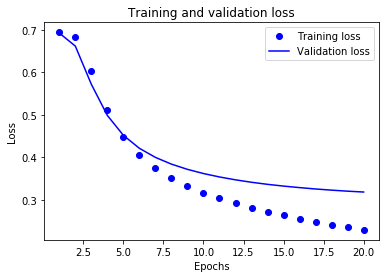

In [77]:
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

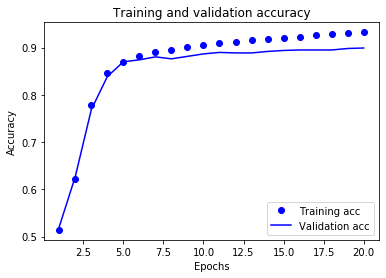

In [78]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

In [79]:
print(loss)
print(accuracy)

[0.6945357990946088, 0.6831085205623082, 0.6042443349974496, 0.5111540566376277, 0.4474657243660518, 0.4049471255029951, 0.37459908869607106, 0.3514424312182835, 0.3327654063088553, 0.3172589150837489, 0.3038992970943451, 0.29221466388021194, 0.28181508389881677, 0.2724127909728459, 0.2638273186343057, 0.255951601260049, 0.24863675262246812, 0.2417997588293893, 0.23541121987274716, 0.22934674293994903]
0.8987


#### New Model 2

In [83]:
model = keras.Sequential([
    keras.layers.Embedding(len(d), 16),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(16, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(1, activation='sigmoid')
])

In [84]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [85]:
history = model.fit(train_batches,
                   epochs=50,
                   validation_data=val_batches,
                   validation_steps=30,
                   callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', mode='min')])

Epoch 1/50


    171/Unknown - 2s 2s/step - loss: 0.7084 - accuracy: 0.53 - 2s 798ms/step - loss: 0.7092 - accuracy: 0.468 - 2s 553ms/step - loss: 0.7095 - accuracy: 0.427 - 2s 432ms/step - loss: 0.7093 - accuracy: 0.437 - 2s 358ms/step - loss: 0.7091 - accuracy: 0.437 - 2s 309ms/step - loss: 0.7090 - accuracy: 0.437 - 2s 274ms/step - loss: 0.7088 - accuracy: 0.450 - 2s 248ms/step - loss: 0.7087 - accuracy: 0.453 - 2s 227ms/step - loss: 0.7086 - accuracy: 0.461 - 2s 212ms/step - loss: 0.7086 - accuracy: 0.456 - 2s 200ms/step - loss: 0.7086 - accuracy: 0.457 - 2s 188ms/step - loss: 0.7085 - accuracy: 0.460 - 2s 179ms/step - loss: 0.7084 - accuracy: 0.463 - 2s 171ms/step - loss: 0.7083 - accuracy: 0.471 - 2s 164ms/step - loss: 0.7082 - accuracy: 0.472 - 3s 157ms/step - loss: 0.7081 - accuracy: 0.474 - 3s 153ms/step - loss: 0.7080 - accuracy: 0.481 - 3s 148ms/step - loss: 0.7078 - accuracy: 0.487 - 3s 144ms/step - loss: 0.7079 - accuracy: 0.483 - 3s 140ms/step - loss: 0.7079 - accuracy: 0.479 - 3s 136

1094/1094 [==============================]6937 - accuracy: 0.532 - 63s 63ms/step - loss: 0.6937 - accuracy: 0.532 - 63s 63ms/step - loss: 0.6937 - accuracy: 0.532 - 63s 63ms/step - loss: 0.6937 - accuracy: 0.532 - 63s 63ms/step - loss: 0.6937 - accuracy: 0.532 - 63s 63ms/step - loss: 0.6937 - accuracy: 0.532 - 63s 63ms/step - loss: 0.6937 - accuracy: 0.532 - 63s 63ms/step - loss: 0.6937 - accuracy: 0.532 - 64s 63ms/step - loss: 0.6937 - accuracy: 0.533 - 64s 63ms/step - loss: 0.6937 - accuracy: 0.533 - 64s 63ms/step - loss: 0.6937 - accuracy: 0.533 - 64s 63ms/step - loss: 0.6936 - accuracy: 0.533 - 64s 63ms/step - loss: 0.6936 - accuracy: 0.533 - 64s 63ms/step - loss: 0.6936 - accuracy: 0.534 - 64s 63ms/step - loss: 0.6936 - accuracy: 0.534 - 64s 63ms/step - loss: 0.6936 - accuracy: 0.534 - 64s 63ms/step - loss: 0.6936 - accuracy: 0.534 - 64s 63ms/step - loss: 0.6936 - accuracy: 0.534 - 64s 63ms/step - loss: 0.6936 - accuracy: 0.535 - 64s 63ms/step - loss: 0.6936 - accuracy: 0.535 - 64

 188/1094 [====>.........................] - ETA: 8:07 - loss: 0.6778 - accuracy: 0.78 - ETA: 4:38 - loss: 0.6738 - accuracy: 0.82 - ETA: 3:26 - loss: 0.6752 - accuracy: 0.83 - ETA: 2:51 - loss: 0.6756 - accuracy: 0.81 - ETA: 2:28 - loss: 0.6770 - accuracy: 0.78 - ETA: 2:14 - loss: 0.6761 - accuracy: 0.76 - ETA: 2:05 - loss: 0.6762 - accuracy: 0.75 - ETA: 1:56 - loss: 0.6765 - accuracy: 0.74 - ETA: 1:51 - loss: 0.6765 - accuracy: 0.73 - ETA: 1:46 - loss: 0.6781 - accuracy: 0.70 - ETA: 1:41 - loss: 0.6782 - accuracy: 0.69 - ETA: 1:38 - loss: 0.6778 - accuracy: 0.69 - ETA: 1:35 - loss: 0.6783 - accuracy: 0.68 - ETA: 1:32 - loss: 0.6774 - accuracy: 0.67 - ETA: 1:30 - loss: 0.6780 - accuracy: 0.66 - ETA: 1:28 - loss: 0.6783 - accuracy: 0.66 - ETA: 1:26 - loss: 0.6781 - accuracy: 0.65 - ETA: 1:24 - loss: 0.6773 - accuracy: 0.66 - ETA: 1:23 - loss: 0.6784 - accuracy: 0.65 - ETA: 1:21 - loss: 0.6787 - accuracy: 0.64 - ETA: 1:20 - loss: 0.6789 - accuracy: 0.64 - ETA: 1:19 - loss: 0.6792 - accu

 187/1094 [====>.........................] - ETA: 8:44 - loss: 0.5505 - accuracy: 0.78 - ETA: 4:53 - loss: 0.4946 - accuracy: 0.85 - ETA: 3:37 - loss: 0.4825 - accuracy: 0.87 - ETA: 2:59 - loss: 0.4913 - accuracy: 0.84 - ETA: 2:35 - loss: 0.5005 - accuracy: 0.83 - ETA: 2:20 - loss: 0.5017 - accuracy: 0.82 - ETA: 2:09 - loss: 0.5074 - accuracy: 0.81 - ETA: 2:01 - loss: 0.5065 - accuracy: 0.81 - ETA: 1:55 - loss: 0.5070 - accuracy: 0.80 - ETA: 1:49 - loss: 0.5186 - accuracy: 0.80 - ETA: 1:45 - loss: 0.5187 - accuracy: 0.79 - ETA: 1:41 - loss: 0.5179 - accuracy: 0.79 - ETA: 1:39 - loss: 0.5229 - accuracy: 0.80 - ETA: 1:36 - loss: 0.5156 - accuracy: 0.80 - ETA: 1:34 - loss: 0.5180 - accuracy: 0.80 - ETA: 1:33 - loss: 0.5223 - accuracy: 0.80 - ETA: 1:31 - loss: 0.5237 - accuracy: 0.80 - ETA: 1:29 - loss: 0.5245 - accuracy: 0.80 - ETA: 1:28 - loss: 0.5273 - accuracy: 0.79 - ETA: 1:26 - loss: 0.5246 - accuracy: 0.80 - ETA: 1:25 - loss: 0.5227 - accuracy: 0.80 - ETA: 1:24 - loss: 0.5254 - accu

1094/1094 [==============================] - ETA: 9s - loss: 0.4834 - accuracy: 0.84 - ETA: 9s - loss: 0.4835 - accuracy: 0.84 - ETA: 9s - loss: 0.4834 - accuracy: 0.84 - ETA: 9s - loss: 0.4833 - accuracy: 0.84 - ETA: 9s - loss: 0.4832 - accuracy: 0.84 - ETA: 9s - loss: 0.4831 - accuracy: 0.84 - ETA: 9s - loss: 0.4831 - accuracy: 0.84 - ETA: 9s - loss: 0.4831 - accuracy: 0.84 - ETA: 9s - loss: 0.4830 - accuracy: 0.84 - ETA: 9s - loss: 0.4829 - accuracy: 0.84 - ETA: 9s - loss: 0.4830 - accuracy: 0.84 - ETA: 9s - loss: 0.4830 - accuracy: 0.84 - ETA: 9s - loss: 0.4829 - accuracy: 0.84 - ETA: 9s - loss: 0.4828 - accuracy: 0.84 - ETA: 8s - loss: 0.4829 - accuracy: 0.84 - ETA: 8s - loss: 0.4827 - accuracy: 0.84 - ETA: 8s - loss: 0.4826 - accuracy: 0.84 - ETA: 8s - loss: 0.4826 - accuracy: 0.84 - ETA: 8s - loss: 0.4825 - accuracy: 0.84 - ETA: 8s - loss: 0.4825 - accuracy: 0.84 - ETA: 8s - loss: 0.4825 - accuracy: 0.84 - ETA: 8s - loss: 0.4824 - accuracy: 0.84 - ETA: 8s - loss: 0.4824 - accura

 187/1094 [====>.........................] - ETA: 8:24 - loss: 0.4633 - accuracy: 0.84 - ETA: 4:45 - loss: 0.4039 - accuracy: 0.90 - ETA: 3:32 - loss: 0.3863 - accuracy: 0.92 - ETA: 2:54 - loss: 0.4041 - accuracy: 0.89 - ETA: 2:33 - loss: 0.4067 - accuracy: 0.88 - ETA: 2:19 - loss: 0.4146 - accuracy: 0.88 - ETA: 2:07 - loss: 0.4184 - accuracy: 0.87 - ETA: 2:00 - loss: 0.4153 - accuracy: 0.88 - ETA: 1:54 - loss: 0.4132 - accuracy: 0.87 - ETA: 1:48 - loss: 0.4240 - accuracy: 0.86 - ETA: 1:44 - loss: 0.4260 - accuracy: 0.86 - ETA: 1:41 - loss: 0.4263 - accuracy: 0.85 - ETA: 1:38 - loss: 0.4349 - accuracy: 0.85 - ETA: 1:36 - loss: 0.4275 - accuracy: 0.85 - ETA: 1:34 - loss: 0.4290 - accuracy: 0.86 - ETA: 1:32 - loss: 0.4342 - accuracy: 0.85 - ETA: 1:30 - loss: 0.4375 - accuracy: 0.85 - ETA: 1:29 - loss: 0.4404 - accuracy: 0.85 - ETA: 1:27 - loss: 0.4421 - accuracy: 0.85 - ETA: 1:26 - loss: 0.4393 - accuracy: 0.85 - ETA: 1:25 - loss: 0.4367 - accuracy: 0.86 - ETA: 1:23 - loss: 0.4391 - accu

 186/1094 [====>.........................] - ETA: 8:32 - loss: 0.4035 - accuracy: 0.84 - ETA: 4:45 - loss: 0.3497 - accuracy: 0.90 - ETA: 3:33 - loss: 0.3329 - accuracy: 0.92 - ETA: 2:56 - loss: 0.3554 - accuracy: 0.90 - ETA: 2:33 - loss: 0.3547 - accuracy: 0.89 - ETA: 2:18 - loss: 0.3686 - accuracy: 0.89 - ETA: 2:07 - loss: 0.3693 - accuracy: 0.89 - ETA: 1:59 - loss: 0.3653 - accuracy: 0.89 - ETA: 1:53 - loss: 0.3610 - accuracy: 0.90 - ETA: 1:48 - loss: 0.3693 - accuracy: 0.90 - ETA: 1:44 - loss: 0.3725 - accuracy: 0.89 - ETA: 1:41 - loss: 0.3732 - accuracy: 0.89 - ETA: 1:39 - loss: 0.3845 - accuracy: 0.88 - ETA: 1:36 - loss: 0.3780 - accuracy: 0.88 - ETA: 1:34 - loss: 0.3790 - accuracy: 0.88 - ETA: 1:32 - loss: 0.3839 - accuracy: 0.88 - ETA: 1:31 - loss: 0.3883 - accuracy: 0.88 - ETA: 1:29 - loss: 0.3906 - accuracy: 0.88 - ETA: 1:27 - loss: 0.3913 - accuracy: 0.87 - ETA: 1:26 - loss: 0.3891 - accuracy: 0.88 - ETA: 1:25 - loss: 0.3864 - accuracy: 0.87 - ETA: 1:24 - loss: 0.3881 - accu

1094/1094 [==============================] - ETA: 9s - loss: 0.3762 - accuracy: 0.88 - ETA: 9s - loss: 0.3762 - accuracy: 0.88 - ETA: 9s - loss: 0.3762 - accuracy: 0.88 - ETA: 9s - loss: 0.3761 - accuracy: 0.88 - ETA: 9s - loss: 0.3760 - accuracy: 0.88 - ETA: 9s - loss: 0.3759 - accuracy: 0.88 - ETA: 9s - loss: 0.3760 - accuracy: 0.88 - ETA: 9s - loss: 0.3760 - accuracy: 0.88 - ETA: 9s - loss: 0.3760 - accuracy: 0.88 - ETA: 9s - loss: 0.3759 - accuracy: 0.88 - ETA: 9s - loss: 0.3761 - accuracy: 0.88 - ETA: 9s - loss: 0.3760 - accuracy: 0.88 - ETA: 9s - loss: 0.3760 - accuracy: 0.88 - ETA: 8s - loss: 0.3759 - accuracy: 0.88 - ETA: 8s - loss: 0.3760 - accuracy: 0.88 - ETA: 8s - loss: 0.3759 - accuracy: 0.88 - ETA: 8s - loss: 0.3758 - accuracy: 0.88 - ETA: 8s - loss: 0.3758 - accuracy: 0.88 - ETA: 8s - loss: 0.3757 - accuracy: 0.88 - ETA: 8s - loss: 0.3757 - accuracy: 0.88 - ETA: 8s - loss: 0.3757 - accuracy: 0.88 - ETA: 8s - loss: 0.3757 - accuracy: 0.88 - ETA: 8s - loss: 0.3757 - accura

 186/1094 [====>.........................] - ETA: 8:19 - loss: 0.3635 - accuracy: 0.90 - ETA: 4:40 - loss: 0.3141 - accuracy: 0.93 - ETA: 3:29 - loss: 0.2988 - accuracy: 0.94 - ETA: 2:54 - loss: 0.3232 - accuracy: 0.92 - ETA: 2:31 - loss: 0.3212 - accuracy: 0.91 - ETA: 2:16 - loss: 0.3399 - accuracy: 0.91 - ETA: 2:06 - loss: 0.3382 - accuracy: 0.91 - ETA: 1:58 - loss: 0.3332 - accuracy: 0.91 - ETA: 1:52 - loss: 0.3276 - accuracy: 0.92 - ETA: 1:47 - loss: 0.3340 - accuracy: 0.91 - ETA: 1:43 - loss: 0.3377 - accuracy: 0.91 - ETA: 1:40 - loss: 0.3382 - accuracy: 0.91 - ETA: 1:37 - loss: 0.3516 - accuracy: 0.90 - ETA: 1:34 - loss: 0.3456 - accuracy: 0.91 - ETA: 1:33 - loss: 0.3463 - accuracy: 0.91 - ETA: 1:31 - loss: 0.3508 - accuracy: 0.90 - ETA: 1:29 - loss: 0.3557 - accuracy: 0.90 - ETA: 1:27 - loss: 0.3575 - accuracy: 0.90 - ETA: 1:26 - loss: 0.3576 - accuracy: 0.90 - ETA: 1:25 - loss: 0.3559 - accuracy: 0.90 - ETA: 1:24 - loss: 0.3535 - accuracy: 0.90 - ETA: 1:23 - loss: 0.3545 - accu

 196/1094 [====>.........................] - ETA: 10:11 - loss: 0.3336 - accuracy: 0.937 - ETA: 5:45 - loss: 0.2877 - accuracy: 0.953 - ETA: 4:14 - loss: 0.2742 - accuracy: 0.94 - ETA: 3:28 - loss: 0.2993 - accuracy: 0.92 - ETA: 3:02 - loss: 0.2967 - accuracy: 0.91 - ETA: 2:44 - loss: 0.3190 - accuracy: 0.91 - ETA: 2:30 - loss: 0.3154 - accuracy: 0.91 - ETA: 2:19 - loss: 0.3098 - accuracy: 0.91 - ETA: 2:01 - loss: 0.3083 - accuracy: 0.92 - ETA: 1:48 - loss: 0.3125 - accuracy: 0.92 - ETA: 1:45 - loss: 0.3274 - accuracy: 0.91 - ETA: 1:42 - loss: 0.3218 - accuracy: 0.91 - ETA: 1:35 - loss: 0.3263 - accuracy: 0.91 - ETA: 1:30 - loss: 0.3329 - accuracy: 0.91 - ETA: 1:28 - loss: 0.3327 - accuracy: 0.91 - ETA: 1:24 - loss: 0.3293 - accuracy: 0.91 - ETA: 1:22 - loss: 0.3297 - accuracy: 0.91 - ETA: 1:19 - loss: 0.3271 - accuracy: 0.91 - ETA: 1:19 - loss: 0.3303 - accuracy: 0.90 - ETA: 1:18 - loss: 0.3279 - accuracy: 0.90 - ETA: 1:16 - loss: 0.3295 - accuracy: 0.90 - ETA: 1:15 - loss: 0.3311 - a

1094/1094 [==============================] - ETA: 4s - loss: 0.3271 - accuracy: 0.90 - ETA: 4s - loss: 0.3271 - accuracy: 0.90 - ETA: 4s - loss: 0.3273 - accuracy: 0.89 - ETA: 4s - loss: 0.3273 - accuracy: 0.90 - ETA: 4s - loss: 0.3272 - accuracy: 0.90 - ETA: 4s - loss: 0.3273 - accuracy: 0.89 - ETA: 4s - loss: 0.3274 - accuracy: 0.89 - ETA: 4s - loss: 0.3273 - accuracy: 0.89 - ETA: 4s - loss: 0.3272 - accuracy: 0.89 - ETA: 4s - loss: 0.3272 - accuracy: 0.89 - ETA: 4s - loss: 0.3272 - accuracy: 0.89 - ETA: 4s - loss: 0.3272 - accuracy: 0.89 - ETA: 4s - loss: 0.3271 - accuracy: 0.89 - ETA: 4s - loss: 0.3272 - accuracy: 0.89 - ETA: 3s - loss: 0.3271 - accuracy: 0.89 - ETA: 3s - loss: 0.3272 - accuracy: 0.89 - ETA: 3s - loss: 0.3272 - accuracy: 0.89 - ETA: 3s - loss: 0.3273 - accuracy: 0.89 - ETA: 3s - loss: 0.3273 - accuracy: 0.89 - ETA: 3s - loss: 0.3273 - accuracy: 0.89 - ETA: 3s - loss: 0.3272 - accuracy: 0.89 - ETA: 3s - loss: 0.3272 - accuracy: 0.89 - ETA: 3s - loss: 0.3274 - accura

 203/1094 [====>.........................] - ETA: 8:59 - loss: 0.3099 - accuracy: 0.96 - ETA: 5:06 - loss: 0.2671 - accuracy: 0.96 - ETA: 3:51 - loss: 0.2554 - accuracy: 0.95 - ETA: 3:11 - loss: 0.2802 - accuracy: 0.93 - ETA: 2:44 - loss: 0.2773 - accuracy: 0.93 - ETA: 2:29 - loss: 0.3027 - accuracy: 0.92 - ETA: 2:16 - loss: 0.2976 - accuracy: 0.92 - ETA: 2:06 - loss: 0.2913 - accuracy: 0.92 - ETA: 2:01 - loss: 0.2848 - accuracy: 0.92 - ETA: 1:54 - loss: 0.2883 - accuracy: 0.93 - ETA: 1:49 - loss: 0.2926 - accuracy: 0.92 - ETA: 1:44 - loss: 0.2923 - accuracy: 0.92 - ETA: 1:36 - loss: 0.3030 - accuracy: 0.92 - ETA: 1:34 - loss: 0.3033 - accuracy: 0.92 - ETA: 1:31 - loss: 0.3070 - accuracy: 0.92 - ETA: 1:30 - loss: 0.3120 - accuracy: 0.92 - ETA: 1:29 - loss: 0.3136 - accuracy: 0.92 - ETA: 1:27 - loss: 0.3131 - accuracy: 0.92 - ETA: 1:26 - loss: 0.3124 - accuracy: 0.92 - ETA: 1:24 - loss: 0.3103 - accuracy: 0.92 - ETA: 1:23 - loss: 0.3101 - accuracy: 0.91 - ETA: 1:22 - loss: 0.3062 - accu

 186/1094 [====>.........................] - ETA: 8:11 - loss: 0.2903 - accuracy: 0.96 - ETA: 4:43 - loss: 0.2502 - accuracy: 0.95 - ETA: 3:29 - loss: 0.2402 - accuracy: 0.94 - ETA: 2:55 - loss: 0.2645 - accuracy: 0.92 - ETA: 2:32 - loss: 0.2615 - accuracy: 0.91 - ETA: 2:17 - loss: 0.2892 - accuracy: 0.91 - ETA: 2:08 - loss: 0.2829 - accuracy: 0.91 - ETA: 1:59 - loss: 0.2762 - accuracy: 0.92 - ETA: 1:53 - loss: 0.2696 - accuracy: 0.92 - ETA: 1:48 - loss: 0.2720 - accuracy: 0.93 - ETA: 1:44 - loss: 0.2765 - accuracy: 0.93 - ETA: 1:41 - loss: 0.2758 - accuracy: 0.93 - ETA: 1:38 - loss: 0.2931 - accuracy: 0.93 - ETA: 1:35 - loss: 0.2876 - accuracy: 0.92 - ETA: 1:33 - loss: 0.2878 - accuracy: 0.92 - ETA: 1:31 - loss: 0.2912 - accuracy: 0.92 - ETA: 1:30 - loss: 0.2961 - accuracy: 0.92 - ETA: 1:28 - loss: 0.2977 - accuracy: 0.92 - ETA: 1:27 - loss: 0.2971 - accuracy: 0.92 - ETA: 1:26 - loss: 0.2968 - accuracy: 0.92 - ETA: 1:24 - loss: 0.2948 - accuracy: 0.92 - ETA: 1:23 - loss: 0.2941 - accu

1094/1094 [==============================] - ETA: 1s - loss: 0.2947 - accuracy: 0.91 - ETA: 1s - loss: 0.2947 - accuracy: 0.91 - ETA: 1s - loss: 0.2948 - accuracy: 0.91 - ETA: 1s - loss: 0.2947 - accuracy: 0.91 - ETA: 1s - loss: 0.2946 - accuracy: 0.91 - ETA: 1s - loss: 0.2946 - accuracy: 0.91 - ETA: 1s - loss: 0.2946 - accuracy: 0.91 - ETA: 1s - loss: 0.2946 - accuracy: 0.91 - ETA: 1s - loss: 0.2946 - accuracy: 0.91 - ETA: 1s - loss: 0.2946 - accuracy: 0.91 - ETA: 0s - loss: 0.2946 - accuracy: 0.91 - ETA: 0s - loss: 0.2945 - accuracy: 0.91 - ETA: 0s - loss: 0.2945 - accuracy: 0.91 - ETA: 0s - loss: 0.2945 - accuracy: 0.91 - ETA: 0s - loss: 0.2945 - accuracy: 0.91 - ETA: 0s - loss: 0.2947 - accuracy: 0.91 - ETA: 0s - loss: 0.2947 - accuracy: 0.91 - ETA: 0s - loss: 0.2947 - accuracy: 0.91 - ETA: 0s - loss: 0.2947 - accuracy: 0.91 - ETA: 0s - loss: 0.2948 - accuracy: 0.90 - ETA: 0s - loss: 0.2948 - accuracy: 0.91 - ETA: 0s - loss: 0.2947 - accuracy: 0.91 - ETA: 0s - loss: 0.2946 - accura

 201/1094 [====>.........................] - ETA: 9:51 - loss: 0.2734 - accuracy: 0.96 - ETA: 5:35 - loss: 0.2358 - accuracy: 0.95 - ETA: 4:08 - loss: 0.2274 - accuracy: 0.94 - ETA: 3:22 - loss: 0.2510 - accuracy: 0.92 - ETA: 2:57 - loss: 0.2480 - accuracy: 0.92 - ETA: 2:39 - loss: 0.2778 - accuracy: 0.91 - ETA: 2:25 - loss: 0.2706 - accuracy: 0.92 - ETA: 2:15 - loss: 0.2635 - accuracy: 0.92 - ETA: 2:07 - loss: 0.2569 - accuracy: 0.93 - ETA: 2:03 - loss: 0.2584 - accuracy: 0.93 - ETA: 1:57 - loss: 0.2630 - accuracy: 0.93 - ETA: 1:53 - loss: 0.2620 - accuracy: 0.93 - ETA: 1:49 - loss: 0.2801 - accuracy: 0.93 - ETA: 1:47 - loss: 0.2747 - accuracy: 0.93 - ETA: 1:44 - loss: 0.2748 - accuracy: 0.92 - ETA: 1:41 - loss: 0.2780 - accuracy: 0.92 - ETA: 1:39 - loss: 0.2827 - accuracy: 0.92 - ETA: 1:37 - loss: 0.2843 - accuracy: 0.92 - ETA: 1:35 - loss: 0.2835 - accuracy: 0.92 - ETA: 1:34 - loss: 0.2837 - accuracy: 0.92 - ETA: 1:34 - loss: 0.2818 - accuracy: 0.92 - ETA: 1:33 - loss: 0.2806 - accu

 189/1094 [====>.........................] - ETA: 8:34 - loss: 0.2587 - accuracy: 0.96 - ETA: 4:48 - loss: 0.2233 - accuracy: 0.95 - ETA: 3:34 - loss: 0.2164 - accuracy: 0.94 - ETA: 2:56 - loss: 0.2392 - accuracy: 0.92 - ETA: 2:35 - loss: 0.2363 - accuracy: 0.92 - ETA: 2:20 - loss: 0.2675 - accuracy: 0.91 - ETA: 2:09 - loss: 0.2597 - accuracy: 0.92 - ETA: 2:01 - loss: 0.2522 - accuracy: 0.92 - ETA: 1:54 - loss: 0.2458 - accuracy: 0.93 - ETA: 1:49 - loss: 0.2465 - accuracy: 0.93 - ETA: 1:44 - loss: 0.2513 - accuracy: 0.93 - ETA: 1:41 - loss: 0.2499 - accuracy: 0.94 - ETA: 1:38 - loss: 0.2690 - accuracy: 0.93 - ETA: 1:35 - loss: 0.2633 - accuracy: 0.93 - ETA: 1:34 - loss: 0.2634 - accuracy: 0.93 - ETA: 1:32 - loss: 0.2664 - accuracy: 0.92 - ETA: 1:30 - loss: 0.2711 - accuracy: 0.92 - ETA: 1:28 - loss: 0.2727 - accuracy: 0.92 - ETA: 1:27 - loss: 0.2719 - accuracy: 0.92 - ETA: 1:27 - loss: 0.2723 - accuracy: 0.92 - ETA: 1:26 - loss: 0.2706 - accuracy: 0.93 - ETA: 1:22 - loss: 0.2651 - accu

1094/1094 [==============================] - ETA: 9s - loss: 0.2707 - accuracy: 0.91 - ETA: 9s - loss: 0.2706 - accuracy: 0.91 - ETA: 9s - loss: 0.2706 - accuracy: 0.91 - ETA: 9s - loss: 0.2705 - accuracy: 0.91 - ETA: 9s - loss: 0.2705 - accuracy: 0.91 - ETA: 9s - loss: 0.2705 - accuracy: 0.91 - ETA: 9s - loss: 0.2706 - accuracy: 0.91 - ETA: 9s - loss: 0.2706 - accuracy: 0.91 - ETA: 9s - loss: 0.2706 - accuracy: 0.91 - ETA: 9s - loss: 0.2707 - accuracy: 0.91 - ETA: 9s - loss: 0.2706 - accuracy: 0.91 - ETA: 9s - loss: 0.2706 - accuracy: 0.91 - ETA: 8s - loss: 0.2706 - accuracy: 0.91 - ETA: 8s - loss: 0.2706 - accuracy: 0.91 - ETA: 8s - loss: 0.2705 - accuracy: 0.91 - ETA: 8s - loss: 0.2704 - accuracy: 0.91 - ETA: 8s - loss: 0.2704 - accuracy: 0.91 - ETA: 8s - loss: 0.2704 - accuracy: 0.91 - ETA: 8s - loss: 0.2705 - accuracy: 0.91 - ETA: 8s - loss: 0.2704 - accuracy: 0.91 - ETA: 8s - loss: 0.2704 - accuracy: 0.91 - ETA: 8s - loss: 0.2704 - accuracy: 0.91 - ETA: 8s - loss: 0.2703 - accura

 192/1094 [====>.........................] - ETA: 8:28 - loss: 0.2458 - accuracy: 0.96 - ETA: 4:45 - loss: 0.2122 - accuracy: 0.95 - ETA: 3:34 - loss: 0.2067 - accuracy: 0.94 - ETA: 2:57 - loss: 0.2287 - accuracy: 0.92 - ETA: 2:33 - loss: 0.2260 - accuracy: 0.92 - ETA: 2:17 - loss: 0.2578 - accuracy: 0.91 - ETA: 1:54 - loss: 0.2419 - accuracy: 0.92 - ETA: 1:41 - loss: 0.2358 - accuracy: 0.93 - ETA: 1:37 - loss: 0.2407 - accuracy: 0.93 - ETA: 1:34 - loss: 0.2391 - accuracy: 0.93 - ETA: 1:32 - loss: 0.2589 - accuracy: 0.93 - ETA: 1:30 - loss: 0.2532 - accuracy: 0.93 - ETA: 1:28 - loss: 0.2533 - accuracy: 0.93 - ETA: 1:26 - loss: 0.2561 - accuracy: 0.92 - ETA: 1:24 - loss: 0.2606 - accuracy: 0.92 - ETA: 1:23 - loss: 0.2623 - accuracy: 0.92 - ETA: 1:22 - loss: 0.2613 - accuracy: 0.92 - ETA: 1:21 - loss: 0.2621 - accuracy: 0.92 - ETA: 1:21 - loss: 0.2605 - accuracy: 0.93 - ETA: 1:21 - loss: 0.2586 - accuracy: 0.93 - ETA: 1:20 - loss: 0.2548 - accuracy: 0.93 - ETA: 1:19 - loss: 0.2568 - accu

 371/1094 [=========>....................] - ETA: 5:16 - loss: 0.2244 - accuracy: 1.00 - ETA: 2:13 - loss: 0.1904 - accuracy: 0.97 - ETA: 1:36 - loss: 0.2084 - accuracy: 0.95 - ETA: 1:20 - loss: 0.2322 - accuracy: 0.93 - ETA: 1:10 - loss: 0.2183 - accuracy: 0.94 - ETA: 1:04 - loss: 0.2226 - accuracy: 0.94 - ETA: 1:00 - loss: 0.2418 - accuracy: 0.94 - ETA: 57s - loss: 0.2362 - accuracy: 0.9396 - ETA: 55s - loss: 0.2427 - accuracy: 0.935 - ETA: 53s - loss: 0.2434 - accuracy: 0.934 - ETA: 52s - loss: 0.2434 - accuracy: 0.934 - ETA: 50s - loss: 0.2373 - accuracy: 0.937 - ETA: 49s - loss: 0.2422 - accuracy: 0.933 - ETA: 48s - loss: 0.2412 - accuracy: 0.934 - ETA: 47s - loss: 0.2470 - accuracy: 0.928 - ETA: 47s - loss: 0.2435 - accuracy: 0.928 - ETA: 46s - loss: 0.2423 - accuracy: 0.929 - ETA: 45s - loss: 0.2392 - accuracy: 0.932 - ETA: 45s - loss: 0.2346 - accuracy: 0.935 - ETA: 44s - loss: 0.2384 - accuracy: 0.934 - ETA: 44s - loss: 0.2393 - accuracy: 0.932 - ETA: 43s - loss: 0.2434 - accu

 357/1094 [========>.....................] - ETA: 5:18 - loss: 0.2156 - accuracy: 1.00 - ETA: 2:16 - loss: 0.1834 - accuracy: 0.97 - ETA: 1:38 - loss: 0.2008 - accuracy: 0.96 - ETA: 1:23 - loss: 0.2244 - accuracy: 0.94 - ETA: 1:13 - loss: 0.2106 - accuracy: 0.94 - ETA: 1:06 - loss: 0.2148 - accuracy: 0.95 - ETA: 1:02 - loss: 0.2343 - accuracy: 0.94 - ETA: 59s - loss: 0.2288 - accuracy: 0.9438 - ETA: 56s - loss: 0.2349 - accuracy: 0.939 - ETA: 54s - loss: 0.2354 - accuracy: 0.937 - ETA: 53s - loss: 0.2358 - accuracy: 0.937 - ETA: 52s - loss: 0.2297 - accuracy: 0.941 - ETA: 51s - loss: 0.2346 - accuracy: 0.937 - ETA: 50s - loss: 0.2337 - accuracy: 0.937 - ETA: 49s - loss: 0.2397 - accuracy: 0.932 - ETA: 48s - loss: 0.2363 - accuracy: 0.931 - ETA: 48s - loss: 0.2351 - accuracy: 0.931 - ETA: 47s - loss: 0.2319 - accuracy: 0.934 - ETA: 47s - loss: 0.2273 - accuracy: 0.937 - ETA: 46s - loss: 0.2311 - accuracy: 0.936 - ETA: 46s - loss: 0.2319 - accuracy: 0.934 - ETA: 46s - loss: 0.2360 - accu

1094/1094 [==============================] - ETA: 14s - loss: 0.2343 - accuracy: 0.929 - ETA: 14s - loss: 0.2344 - accuracy: 0.929 - ETA: 14s - loss: 0.2343 - accuracy: 0.929 - ETA: 14s - loss: 0.2344 - accuracy: 0.929 - ETA: 13s - loss: 0.2347 - accuracy: 0.929 - ETA: 13s - loss: 0.2348 - accuracy: 0.929 - ETA: 13s - loss: 0.2350 - accuracy: 0.929 - ETA: 13s - loss: 0.2351 - accuracy: 0.929 - ETA: 13s - loss: 0.2352 - accuracy: 0.929 - ETA: 13s - loss: 0.2351 - accuracy: 0.929 - ETA: 13s - loss: 0.2350 - accuracy: 0.929 - ETA: 13s - loss: 0.2350 - accuracy: 0.929 - ETA: 13s - loss: 0.2348 - accuracy: 0.929 - ETA: 13s - loss: 0.2349 - accuracy: 0.929 - ETA: 13s - loss: 0.2349 - accuracy: 0.929 - ETA: 13s - loss: 0.2351 - accuracy: 0.929 - ETA: 13s - loss: 0.2352 - accuracy: 0.929 - ETA: 12s - loss: 0.2352 - accuracy: 0.929 - ETA: 12s - loss: 0.2352 - accuracy: 0.929 - ETA: 12s - loss: 0.2352 - accuracy: 0.929 - ETA: 12s - loss: 0.2352 - accuracy: 0.929 - ETA: 12s - loss: 0.2351 - accur

 366/1094 [=========>....................] - ETA: 5:52 - loss: 0.2009 - accuracy: 1.00 - ETA: 2:26 - loss: 0.1710 - accuracy: 0.98 - ETA: 1:44 - loss: 0.1873 - accuracy: 0.96 - ETA: 1:27 - loss: 0.2104 - accuracy: 0.95 - ETA: 1:18 - loss: 0.1968 - accuracy: 0.95 - ETA: 1:11 - loss: 0.2007 - accuracy: 0.96 - ETA: 1:06 - loss: 0.2210 - accuracy: 0.95 - ETA: 1:02 - loss: 0.2156 - accuracy: 0.95 - ETA: 1:02 - loss: 0.2175 - accuracy: 0.95 - ETA: 1:00 - loss: 0.2223 - accuracy: 0.94 - ETA: 57s - loss: 0.2232 - accuracy: 0.9438 - ETA: 56s - loss: 0.2196 - accuracy: 0.944 - ETA: 54s - loss: 0.2191 - accuracy: 0.944 - ETA: 53s - loss: 0.2200 - accuracy: 0.943 - ETA: 52s - loss: 0.2245 - accuracy: 0.939 - ETA: 51s - loss: 0.2231 - accuracy: 0.938 - ETA: 50s - loss: 0.2225 - accuracy: 0.938 - ETA: 49s - loss: 0.2209 - accuracy: 0.939 - ETA: 48s - loss: 0.2168 - accuracy: 0.941 - ETA: 48s - loss: 0.2154 - accuracy: 0.942 - ETA: 47s - loss: 0.2179 - accuracy: 0.942 - ETA: 47s - loss: 0.2198 - accu

1094/1094 [==============================] - ETA: 13s - loss: 0.2202 - accuracy: 0.934 - ETA: 13s - loss: 0.2204 - accuracy: 0.934 - ETA: 13s - loss: 0.2206 - accuracy: 0.934 - ETA: 13s - loss: 0.2207 - accuracy: 0.934 - ETA: 13s - loss: 0.2208 - accuracy: 0.934 - ETA: 13s - loss: 0.2207 - accuracy: 0.934 - ETA: 13s - loss: 0.2205 - accuracy: 0.934 - ETA: 13s - loss: 0.2206 - accuracy: 0.934 - ETA: 13s - loss: 0.2204 - accuracy: 0.934 - ETA: 13s - loss: 0.2204 - accuracy: 0.934 - ETA: 13s - loss: 0.2204 - accuracy: 0.934 - ETA: 12s - loss: 0.2206 - accuracy: 0.934 - ETA: 12s - loss: 0.2207 - accuracy: 0.934 - ETA: 12s - loss: 0.2207 - accuracy: 0.933 - ETA: 12s - loss: 0.2207 - accuracy: 0.934 - ETA: 12s - loss: 0.2208 - accuracy: 0.934 - ETA: 12s - loss: 0.2208 - accuracy: 0.933 - ETA: 12s - loss: 0.2208 - accuracy: 0.933 - ETA: 12s - loss: 0.2207 - accuracy: 0.933 - ETA: 12s - loss: 0.2207 - accuracy: 0.933 - ETA: 12s - loss: 0.2206 - accuracy: 0.933 - ETA: 12s - loss: 0.2206 - accur

 363/1094 [========>.....................] - ETA: 5:08 - loss: 0.1893 - accuracy: 1.00 - ETA: 2:06 - loss: 0.1606 - accuracy: 0.98 - ETA: 1:31 - loss: 0.1757 - accuracy: 0.96 - ETA: 1:16 - loss: 0.1978 - accuracy: 0.95 - ETA: 1:07 - loss: 0.1844 - accuracy: 0.95 - ETA: 1:02 - loss: 0.1882 - accuracy: 0.95 - ETA: 58s - loss: 0.2091 - accuracy: 0.9543 - ETA: 55s - loss: 0.2039 - accuracy: 0.952 - ETA: 53s - loss: 0.2081 - accuracy: 0.946 - ETA: 51s - loss: 0.2086 - accuracy: 0.944 - ETA: 49s - loss: 0.2102 - accuracy: 0.943 - ETA: 48s - loss: 0.2040 - accuracy: 0.947 - ETA: 47s - loss: 0.2088 - accuracy: 0.943 - ETA: 46s - loss: 0.2080 - accuracy: 0.944 - ETA: 45s - loss: 0.2144 - accuracy: 0.938 - ETA: 45s - loss: 0.2116 - accuracy: 0.938 - ETA: 44s - loss: 0.2104 - accuracy: 0.939 - ETA: 44s - loss: 0.2069 - accuracy: 0.942 - ETA: 43s - loss: 0.2025 - accuracy: 0.944 - ETA: 43s - loss: 0.2065 - accuracy: 0.943 - ETA: 42s - loss: 0.2069 - accuracy: 0.942 - ETA: 42s - loss: 0.2109 - accu

 731/1094 [===================>..........] - ETA: 27s - loss: 0.2059 - accuracy: 0.938 - ETA: 26s - loss: 0.2061 - accuracy: 0.938 - ETA: 26s - loss: 0.2060 - accuracy: 0.938 - ETA: 26s - loss: 0.2058 - accuracy: 0.938 - ETA: 26s - loss: 0.2056 - accuracy: 0.938 - ETA: 26s - loss: 0.2058 - accuracy: 0.938 - ETA: 26s - loss: 0.2056 - accuracy: 0.938 - ETA: 26s - loss: 0.2060 - accuracy: 0.938 - ETA: 26s - loss: 0.2057 - accuracy: 0.938 - ETA: 26s - loss: 0.2057 - accuracy: 0.939 - ETA: 26s - loss: 0.2056 - accuracy: 0.939 - ETA: 26s - loss: 0.2062 - accuracy: 0.938 - ETA: 26s - loss: 0.2062 - accuracy: 0.938 - ETA: 25s - loss: 0.2060 - accuracy: 0.938 - ETA: 25s - loss: 0.2060 - accuracy: 0.938 - ETA: 25s - loss: 0.2060 - accuracy: 0.938 - ETA: 25s - loss: 0.2057 - accuracy: 0.938 - ETA: 25s - loss: 0.2054 - accuracy: 0.939 - ETA: 25s - loss: 0.2056 - accuracy: 0.939 - ETA: 25s - loss: 0.2054 - accuracy: 0.939 - ETA: 25s - loss: 0.2055 - accuracy: 0.939 - ETA: 25s - loss: 0.2059 - accur

1094/1094 [==============================] - ETA: 13s - loss: 0.2072 - accuracy: 0.938 - ETA: 12s - loss: 0.2072 - accuracy: 0.938 - ETA: 12s - loss: 0.2075 - accuracy: 0.938 - ETA: 12s - loss: 0.2076 - accuracy: 0.938 - ETA: 12s - loss: 0.2078 - accuracy: 0.938 - ETA: 12s - loss: 0.2079 - accuracy: 0.938 - ETA: 12s - loss: 0.2080 - accuracy: 0.938 - ETA: 12s - loss: 0.2079 - accuracy: 0.938 - ETA: 12s - loss: 0.2078 - accuracy: 0.938 - ETA: 12s - loss: 0.2078 - accuracy: 0.938 - ETA: 12s - loss: 0.2076 - accuracy: 0.938 - ETA: 12s - loss: 0.2077 - accuracy: 0.938 - ETA: 12s - loss: 0.2076 - accuracy: 0.938 - ETA: 12s - loss: 0.2078 - accuracy: 0.938 - ETA: 12s - loss: 0.2079 - accuracy: 0.938 - ETA: 11s - loss: 0.2079 - accuracy: 0.938 - ETA: 11s - loss: 0.2079 - accuracy: 0.938 - ETA: 11s - loss: 0.2079 - accuracy: 0.938 - ETA: 11s - loss: 0.2080 - accuracy: 0.938 - ETA: 11s - loss: 0.2079 - accuracy: 0.938 - ETA: 11s - loss: 0.2080 - accuracy: 0.938 - ETA: 11s - loss: 0.2080 - accur

 367/1094 [=========>....................] - ETA: 5:11 - loss: 0.1803 - accuracy: 1.00 - ETA: 2:11 - loss: 0.1519 - accuracy: 1.00 - ETA: 1:37 - loss: 0.1655 - accuracy: 0.97 - ETA: 1:23 - loss: 0.1861 - accuracy: 0.95 - ETA: 1:19 - loss: 0.1780 - accuracy: 0.96 - ETA: 1:13 - loss: 0.1718 - accuracy: 0.96 - ETA: 1:08 - loss: 0.1745 - accuracy: 0.96 - ETA: 1:05 - loss: 0.1921 - accuracy: 0.96 - ETA: 1:03 - loss: 0.1945 - accuracy: 0.95 - ETA: 1:00 - loss: 0.1980 - accuracy: 0.94 - ETA: 59s - loss: 0.1996 - accuracy: 0.9484 - ETA: 58s - loss: 0.1963 - accuracy: 0.948 - ETA: 56s - loss: 0.1967 - accuracy: 0.949 - ETA: 55s - loss: 0.1965 - accuracy: 0.949 - ETA: 55s - loss: 0.2015 - accuracy: 0.946 - ETA: 54s - loss: 0.2006 - accuracy: 0.945 - ETA: 53s - loss: 0.1998 - accuracy: 0.945 - ETA: 52s - loss: 0.1984 - accuracy: 0.945 - ETA: 52s - loss: 0.1961 - accuracy: 0.946 - ETA: 52s - loss: 0.1918 - accuracy: 0.948 - ETA: 51s - loss: 0.1960 - accuracy: 0.947 - ETA: 51s - loss: 0.1962 - accu

1094/1094 [==============================] - ETA: 14s - loss: 0.1961 - accuracy: 0.942 - ETA: 14s - loss: 0.1963 - accuracy: 0.942 - ETA: 14s - loss: 0.1963 - accuracy: 0.942 - ETA: 14s - loss: 0.1966 - accuracy: 0.942 - ETA: 14s - loss: 0.1965 - accuracy: 0.942 - ETA: 13s - loss: 0.1965 - accuracy: 0.942 - ETA: 13s - loss: 0.1964 - accuracy: 0.942 - ETA: 13s - loss: 0.1963 - accuracy: 0.942 - ETA: 13s - loss: 0.1963 - accuracy: 0.942 - ETA: 13s - loss: 0.1962 - accuracy: 0.942 - ETA: 13s - loss: 0.1962 - accuracy: 0.942 - ETA: 13s - loss: 0.1962 - accuracy: 0.942 - ETA: 13s - loss: 0.1963 - accuracy: 0.942 - ETA: 13s - loss: 0.1965 - accuracy: 0.942 - ETA: 13s - loss: 0.1964 - accuracy: 0.942 - ETA: 13s - loss: 0.1965 - accuracy: 0.942 - ETA: 13s - loss: 0.1965 - accuracy: 0.942 - ETA: 13s - loss: 0.1965 - accuracy: 0.942 - ETA: 13s - loss: 0.1964 - accuracy: 0.942 - ETA: 12s - loss: 0.1966 - accuracy: 0.941 - ETA: 12s - loss: 0.1966 - accuracy: 0.941 - ETA: 12s - loss: 0.1965 - accur

 365/1094 [=========>....................] - ETA: 5:06 - loss: 0.1733 - accuracy: 1.00 - ETA: 2:06 - loss: 0.1443 - accuracy: 0.98 - ETA: 1:31 - loss: 0.1564 - accuracy: 0.96 - ETA: 1:17 - loss: 0.1751 - accuracy: 0.95 - ETA: 1:08 - loss: 0.1626 - accuracy: 0.96 - ETA: 1:03 - loss: 0.1662 - accuracy: 0.96 - ETA: 59s - loss: 0.1879 - accuracy: 0.9567 - ETA: 56s - loss: 0.1835 - accuracy: 0.956 - ETA: 53s - loss: 0.1860 - accuracy: 0.950 - ETA: 51s - loss: 0.1865 - accuracy: 0.949 - ETA: 50s - loss: 0.1889 - accuracy: 0.947 - ETA: 48s - loss: 0.1831 - accuracy: 0.951 - ETA: 47s - loss: 0.1873 - accuracy: 0.948 - ETA: 46s - loss: 0.1864 - accuracy: 0.949 - ETA: 46s - loss: 0.1932 - accuracy: 0.945 - ETA: 45s - loss: 0.1908 - accuracy: 0.944 - ETA: 44s - loss: 0.1895 - accuracy: 0.946 - ETA: 44s - loss: 0.1861 - accuracy: 0.947 - ETA: 43s - loss: 0.1819 - accuracy: 0.949 - ETA: 43s - loss: 0.1863 - accuracy: 0.948 - ETA: 43s - loss: 0.1864 - accuracy: 0.947 - ETA: 42s - loss: 0.1903 - accu

 368/1094 [=========>....................] - ETA: 5:18 - loss: 0.1704 - accuracy: 1.00 - ETA: 2:12 - loss: 0.1410 - accuracy: 0.98 - ETA: 1:36 - loss: 0.1522 - accuracy: 0.96 - ETA: 1:23 - loss: 0.1699 - accuracy: 0.95 - ETA: 1:15 - loss: 0.1577 - accuracy: 0.96 - ETA: 1:08 - loss: 0.1612 - accuracy: 0.96 - ETA: 1:04 - loss: 0.1831 - accuracy: 0.95 - ETA: 1:01 - loss: 0.1788 - accuracy: 0.95 - ETA: 58s - loss: 0.1810 - accuracy: 0.9522 - ETA: 56s - loss: 0.1815 - accuracy: 0.950 - ETA: 54s - loss: 0.1841 - accuracy: 0.949 - ETA: 53s - loss: 0.1784 - accuracy: 0.952 - ETA: 52s - loss: 0.1825 - accuracy: 0.950 - ETA: 51s - loss: 0.1815 - accuracy: 0.950 - ETA: 50s - loss: 0.1883 - accuracy: 0.946 - ETA: 49s - loss: 0.1860 - accuracy: 0.945 - ETA: 49s - loss: 0.1848 - accuracy: 0.947 - ETA: 49s - loss: 0.1814 - accuracy: 0.948 - ETA: 48s - loss: 0.1773 - accuracy: 0.950 - ETA: 48s - loss: 0.1817 - accuracy: 0.949 - ETA: 47s - loss: 0.1817 - accuracy: 0.948 - ETA: 47s - loss: 0.1856 - accu

1094/1094 [==============================] - ETA: 13s - loss: 0.1806 - accuracy: 0.948 - ETA: 13s - loss: 0.1806 - accuracy: 0.949 - ETA: 13s - loss: 0.1806 - accuracy: 0.948 - ETA: 13s - loss: 0.1809 - accuracy: 0.948 - ETA: 13s - loss: 0.1810 - accuracy: 0.948 - ETA: 12s - loss: 0.1811 - accuracy: 0.948 - ETA: 12s - loss: 0.1812 - accuracy: 0.948 - ETA: 12s - loss: 0.1813 - accuracy: 0.948 - ETA: 12s - loss: 0.1812 - accuracy: 0.948 - ETA: 12s - loss: 0.1811 - accuracy: 0.948 - ETA: 12s - loss: 0.1811 - accuracy: 0.948 - ETA: 12s - loss: 0.1810 - accuracy: 0.949 - ETA: 12s - loss: 0.1810 - accuracy: 0.949 - ETA: 12s - loss: 0.1809 - accuracy: 0.949 - ETA: 12s - loss: 0.1811 - accuracy: 0.948 - ETA: 12s - loss: 0.1812 - accuracy: 0.948 - ETA: 12s - loss: 0.1812 - accuracy: 0.948 - ETA: 12s - loss: 0.1812 - accuracy: 0.948 - ETA: 12s - loss: 0.1812 - accuracy: 0.948 - ETA: 11s - loss: 0.1813 - accuracy: 0.948 - ETA: 11s - loss: 0.1812 - accuracy: 0.948 - ETA: 11s - loss: 0.1813 - accur

In [86]:
loss, accuracy = model.evaluate(test_batches)

313/313 [==============================] - ETA: 2s - loss: 0.5168 - accuracy: 0.90 - ETA: 2s - loss: 0.3327 - accuracy: 0.90 - ETA: 2s - loss: 0.2876 - accuracy: 0.91 - ETA: 2s - loss: 0.2828 - accuracy: 0.91 - ETA: 2s - loss: 0.2796 - accuracy: 0.90 - ETA: 2s - loss: 0.2855 - accuracy: 0.90 - ETA: 2s - loss: 0.2795 - accuracy: 0.90 - ETA: 2s - loss: 0.2860 - accuracy: 0.90 - ETA: 1s - loss: 0.2810 - accuracy: 0.90 - ETA: 1s - loss: 0.2889 - accuracy: 0.90 - ETA: 1s - loss: 0.2939 - accuracy: 0.90 - ETA: 1s - loss: 0.2896 - accuracy: 0.90 - ETA: 1s - loss: 0.2896 - accuracy: 0.90 - ETA: 1s - loss: 0.2883 - accuracy: 0.90 - ETA: 1s - loss: 0.2878 - accuracy: 0.90 - ETA: 1s - loss: 0.2895 - accuracy: 0.89 - ETA: 1s - loss: 0.2941 - accuracy: 0.89 - ETA: 1s - loss: 0.2923 - accuracy: 0.89 - ETA: 1s - loss: 0.2907 - accuracy: 0.89 - ETA: 1s - loss: 0.2861 - accuracy: 0.89 - ETA: 1s - loss: 0.2870 - accuracy: 0.89 - ETA: 1s - loss: 0.2856 - accuracy: 0.90 - ETA: 1s - loss: 0.2911 - accuracy

In [87]:
print(loss)
print(accuracy)

0.2931613404387102
0.8989


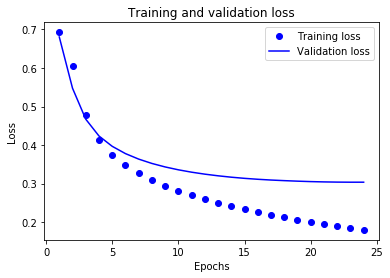

In [88]:
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

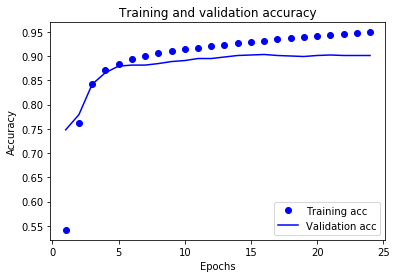

In [89]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

#### Model 1:

In [83]:
model = keras.Sequential([
    keras.layers.Embedding(len(d), 16),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(1, activation='sigmoid')
])

In [84]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [85]:
history = model.fit(new_train_data, new_train_label,
                    epochs=10,
                   validation_data=(new_val_data, new_val_label),
                   validation_steps=30)

Train on 35000 samples, validate on 5000 samples
Epoch 1/10
11232/35000 [========>.....................] - ETA: 9:55 - loss: 0.6936 - accuracy: 0.50 - ETA: 3:46 - loss: 0.6991 - accuracy: 0.41 - ETA: 2:33 - loss: 0.6977 - accuracy: 0.43 - ETA: 2:01 - loss: 0.6963 - accuracy: 0.45 - ETA: 1:45 - loss: 0.6958 - accuracy: 0.45 - ETA: 1:33 - loss: 0.6949 - accuracy: 0.48 - ETA: 1:26 - loss: 0.6945 - accuracy: 0.48 - ETA: 1:20 - loss: 0.6942 - accuracy: 0.49 - ETA: 1:16 - loss: 0.6942 - accuracy: 0.48 - ETA: 1:12 - loss: 0.6940 - accuracy: 0.49 - ETA: 1:09 - loss: 0.6936 - accuracy: 0.50 - ETA: 1:06 - loss: 0.6935 - accuracy: 0.50 - ETA: 1:04 - loss: 0.6935 - accuracy: 0.50 - ETA: 1:02 - loss: 0.6934 - accuracy: 0.50 - ETA: 1:01 - loss: 0.6935 - accuracy: 0.50 - ETA: 59s - loss: 0.6934 - accuracy: 0.5060 - ETA: 58s - loss: 0.6934 - accuracy: 0.506 - ETA: 57s - loss: 0.6934 - accuracy: 0.504 - ETA: 56s - loss: 0.6933 - accuracy: 0.506 - ETA: 55s - loss: 0.6934 - accuracy: 0.503 - ETA: 54s - l

11872/35000 [=========>....................] - ETA: 40s - loss: 0.6759 - accuracy: 0.562 - ETA: 39s - loss: 0.6745 - accuracy: 0.635 - ETA: 39s - loss: 0.6736 - accuracy: 0.618 - ETA: 40s - loss: 0.6685 - accuracy: 0.660 - ETA: 39s - loss: 0.6692 - accuracy: 0.652 - ETA: 39s - loss: 0.6699 - accuracy: 0.650 - ETA: 38s - loss: 0.6698 - accuracy: 0.653 - ETA: 38s - loss: 0.6680 - accuracy: 0.670 - ETA: 38s - loss: 0.6673 - accuracy: 0.685 - ETA: 37s - loss: 0.6682 - accuracy: 0.680 - ETA: 38s - loss: 0.6685 - accuracy: 0.684 - ETA: 37s - loss: 0.6679 - accuracy: 0.695 - ETA: 37s - loss: 0.6680 - accuracy: 0.696 - ETA: 37s - loss: 0.6674 - accuracy: 0.701 - ETA: 37s - loss: 0.6676 - accuracy: 0.699 - ETA: 37s - loss: 0.6680 - accuracy: 0.689 - ETA: 37s - loss: 0.6684 - accuracy: 0.686 - ETA: 37s - loss: 0.6681 - accuracy: 0.685 - ETA: 37s - loss: 0.6683 - accuracy: 0.685 - ETA: 37s - loss: 0.6685 - accuracy: 0.681 - ETA: 37s - loss: 0.6685 - accuracy: 0.680 - ETA: 37s - loss: 0.6685 - acc

35000/35000 [==============================] - ETA: 12s - loss: 0.6493 - accuracy: 0.723 - ETA: 12s - loss: 0.6492 - accuracy: 0.723 - ETA: 12s - loss: 0.6492 - accuracy: 0.723 - ETA: 12s - loss: 0.6491 - accuracy: 0.723 - ETA: 12s - loss: 0.6491 - accuracy: 0.722 - ETA: 12s - loss: 0.6491 - accuracy: 0.722 - ETA: 11s - loss: 0.6490 - accuracy: 0.722 - ETA: 11s - loss: 0.6490 - accuracy: 0.722 - ETA: 11s - loss: 0.6489 - accuracy: 0.722 - ETA: 11s - loss: 0.6488 - accuracy: 0.722 - ETA: 11s - loss: 0.6488 - accuracy: 0.722 - ETA: 11s - loss: 0.6487 - accuracy: 0.722 - ETA: 11s - loss: 0.6486 - accuracy: 0.722 - ETA: 11s - loss: 0.6486 - accuracy: 0.722 - ETA: 11s - loss: 0.6486 - accuracy: 0.722 - ETA: 11s - loss: 0.6485 - accuracy: 0.722 - ETA: 11s - loss: 0.6484 - accuracy: 0.722 - ETA: 11s - loss: 0.6484 - accuracy: 0.722 - ETA: 11s - loss: 0.6484 - accuracy: 0.722 - ETA: 11s - loss: 0.6484 - accuracy: 0.722 - ETA: 10s - loss: 0.6483 - accuracy: 0.722 - ETA: 10s - loss: 0.6483 - acc

11840/35000 [=========>....................] - ETA: 43s - loss: 0.4942 - accuracy: 0.937 - ETA: 40s - loss: 0.5118 - accuracy: 0.843 - ETA: 39s - loss: 0.5191 - accuracy: 0.825 - ETA: 39s - loss: 0.5261 - accuracy: 0.821 - ETA: 39s - loss: 0.5300 - accuracy: 0.798 - ETA: 39s - loss: 0.5276 - accuracy: 0.809 - ETA: 39s - loss: 0.5303 - accuracy: 0.805 - ETA: 38s - loss: 0.5311 - accuracy: 0.802 - ETA: 38s - loss: 0.5287 - accuracy: 0.805 - ETA: 38s - loss: 0.5288 - accuracy: 0.809 - ETA: 38s - loss: 0.5319 - accuracy: 0.806 - ETA: 38s - loss: 0.5315 - accuracy: 0.808 - ETA: 38s - loss: 0.5326 - accuracy: 0.806 - ETA: 38s - loss: 0.5335 - accuracy: 0.806 - ETA: 38s - loss: 0.5312 - accuracy: 0.813 - ETA: 38s - loss: 0.5322 - accuracy: 0.813 - ETA: 38s - loss: 0.5315 - accuracy: 0.814 - ETA: 38s - loss: 0.5297 - accuracy: 0.817 - ETA: 38s - loss: 0.5280 - accuracy: 0.819 - ETA: 38s - loss: 0.5283 - accuracy: 0.822 - ETA: 38s - loss: 0.5292 - accuracy: 0.823 - ETA: 37s - loss: 0.5290 - acc

35000/35000 [==============================] - ETA: 13s - loss: 0.5071 - accuracy: 0.823 - ETA: 13s - loss: 0.5070 - accuracy: 0.823 - ETA: 12s - loss: 0.5069 - accuracy: 0.823 - ETA: 12s - loss: 0.5069 - accuracy: 0.823 - ETA: 12s - loss: 0.5070 - accuracy: 0.823 - ETA: 12s - loss: 0.5068 - accuracy: 0.823 - ETA: 12s - loss: 0.5068 - accuracy: 0.823 - ETA: 12s - loss: 0.5068 - accuracy: 0.823 - ETA: 12s - loss: 0.5068 - accuracy: 0.823 - ETA: 12s - loss: 0.5068 - accuracy: 0.823 - ETA: 12s - loss: 0.5068 - accuracy: 0.823 - ETA: 12s - loss: 0.5066 - accuracy: 0.823 - ETA: 12s - loss: 0.5066 - accuracy: 0.823 - ETA: 12s - loss: 0.5065 - accuracy: 0.823 - ETA: 12s - loss: 0.5065 - accuracy: 0.823 - ETA: 11s - loss: 0.5065 - accuracy: 0.823 - ETA: 11s - loss: 0.5066 - accuracy: 0.823 - ETA: 11s - loss: 0.5066 - accuracy: 0.823 - ETA: 11s - loss: 0.5066 - accuracy: 0.823 - ETA: 11s - loss: 0.5067 - accuracy: 0.824 - ETA: 11s - loss: 0.5066 - accuracy: 0.824 - ETA: 11s - loss: 0.5066 - acc

12000/35000 [=========>....................] - ETA: 32s - loss: 0.5366 - accuracy: 0.843 - ETA: 32s - loss: 0.4187 - accuracy: 0.864 - ETA: 33s - loss: 0.4602 - accuracy: 0.843 - ETA: 32s - loss: 0.4454 - accuracy: 0.843 - ETA: 32s - loss: 0.4311 - accuracy: 0.861 - ETA: 32s - loss: 0.4287 - accuracy: 0.866 - ETA: 32s - loss: 0.4237 - accuracy: 0.877 - ETA: 32s - loss: 0.4265 - accuracy: 0.870 - ETA: 32s - loss: 0.4235 - accuracy: 0.869 - ETA: 32s - loss: 0.4186 - accuracy: 0.873 - ETA: 32s - loss: 0.4109 - accuracy: 0.878 - ETA: 31s - loss: 0.4082 - accuracy: 0.877 - ETA: 31s - loss: 0.4121 - accuracy: 0.876 - ETA: 30s - loss: 0.4088 - accuracy: 0.878 - ETA: 30s - loss: 0.4134 - accuracy: 0.872 - ETA: 30s - loss: 0.4137 - accuracy: 0.876 - ETA: 30s - loss: 0.4118 - accuracy: 0.876 - ETA: 29s - loss: 0.4128 - accuracy: 0.875 - ETA: 29s - loss: 0.4137 - accuracy: 0.871 - ETA: 29s - loss: 0.4146 - accuracy: 0.870 - ETA: 29s - loss: 0.4129 - accuracy: 0.869 - ETA: 29s - loss: 0.4144 - acc

35000/35000 [==============================] - ETA: 9s - loss: 0.4070 - accuracy: 0.86 - ETA: 9s - loss: 0.4070 - accuracy: 0.86 - ETA: 9s - loss: 0.4068 - accuracy: 0.86 - ETA: 9s - loss: 0.4068 - accuracy: 0.86 - ETA: 9s - loss: 0.4068 - accuracy: 0.86 - ETA: 9s - loss: 0.4067 - accuracy: 0.86 - ETA: 9s - loss: 0.4065 - accuracy: 0.86 - ETA: 8s - loss: 0.4066 - accuracy: 0.86 - ETA: 8s - loss: 0.4065 - accuracy: 0.86 - ETA: 8s - loss: 0.4065 - accuracy: 0.86 - ETA: 8s - loss: 0.4064 - accuracy: 0.86 - ETA: 8s - loss: 0.4065 - accuracy: 0.86 - ETA: 8s - loss: 0.4064 - accuracy: 0.86 - ETA: 8s - loss: 0.4064 - accuracy: 0.86 - ETA: 8s - loss: 0.4064 - accuracy: 0.86 - ETA: 8s - loss: 0.4062 - accuracy: 0.86 - ETA: 8s - loss: 0.4062 - accuracy: 0.86 - ETA: 8s - loss: 0.4061 - accuracy: 0.86 - ETA: 8s - loss: 0.4062 - accuracy: 0.86 - ETA: 8s - loss: 0.4061 - accuracy: 0.86 - ETA: 8s - loss: 0.4060 - accuracy: 0.86 - ETA: 8s - loss: 0.4060 - accuracy: 0.86 - ETA: 8s - loss: 0.4058 - accu

12256/35000 [=========>....................] - ETA: 34s - loss: 0.2484 - accuracy: 0.968 - ETA: 32s - loss: 0.3380 - accuracy: 0.927 - ETA: 32s - loss: 0.3299 - accuracy: 0.931 - ETA: 31s - loss: 0.3192 - accuracy: 0.942 - ETA: 31s - loss: 0.3435 - accuracy: 0.923 - ETA: 31s - loss: 0.3544 - accuracy: 0.903 - ETA: 30s - loss: 0.3584 - accuracy: 0.899 - ETA: 30s - loss: 0.3561 - accuracy: 0.895 - ETA: 30s - loss: 0.3589 - accuracy: 0.889 - ETA: 30s - loss: 0.3522 - accuracy: 0.891 - ETA: 30s - loss: 0.3622 - accuracy: 0.889 - ETA: 30s - loss: 0.3622 - accuracy: 0.887 - ETA: 30s - loss: 0.3608 - accuracy: 0.887 - ETA: 30s - loss: 0.3680 - accuracy: 0.885 - ETA: 30s - loss: 0.3677 - accuracy: 0.883 - ETA: 30s - loss: 0.3668 - accuracy: 0.882 - ETA: 30s - loss: 0.3646 - accuracy: 0.885 - ETA: 29s - loss: 0.3604 - accuracy: 0.887 - ETA: 29s - loss: 0.3572 - accuracy: 0.886 - ETA: 29s - loss: 0.3592 - accuracy: 0.883 - ETA: 29s - loss: 0.3591 - accuracy: 0.883 - ETA: 29s - loss: 0.3559 - acc

35000/35000 [==============================] - ETA: 9s - loss: 0.3425 - accuracy: 0.88 - ETA: 9s - loss: 0.3424 - accuracy: 0.88 - ETA: 9s - loss: 0.3426 - accuracy: 0.88 - ETA: 9s - loss: 0.3426 - accuracy: 0.88 - ETA: 9s - loss: 0.3426 - accuracy: 0.88 - ETA: 9s - loss: 0.3425 - accuracy: 0.88 - ETA: 9s - loss: 0.3425 - accuracy: 0.88 - ETA: 8s - loss: 0.3426 - accuracy: 0.88 - ETA: 8s - loss: 0.3426 - accuracy: 0.88 - ETA: 8s - loss: 0.3425 - accuracy: 0.88 - ETA: 8s - loss: 0.3424 - accuracy: 0.88 - ETA: 8s - loss: 0.3424 - accuracy: 0.88 - ETA: 8s - loss: 0.3425 - accuracy: 0.88 - ETA: 8s - loss: 0.3424 - accuracy: 0.88 - ETA: 8s - loss: 0.3423 - accuracy: 0.88 - ETA: 8s - loss: 0.3424 - accuracy: 0.88 - ETA: 8s - loss: 0.3423 - accuracy: 0.88 - ETA: 8s - loss: 0.3424 - accuracy: 0.88 - ETA: 8s - loss: 0.3424 - accuracy: 0.88 - ETA: 8s - loss: 0.3422 - accuracy: 0.88 - ETA: 8s - loss: 0.3422 - accuracy: 0.88 - ETA: 8s - loss: 0.3421 - accuracy: 0.88 - ETA: 8s - loss: 0.3420 - accu

12416/35000 [=========>....................] - ETA: 28s - loss: 0.2936 - accuracy: 0.875 - ETA: 30s - loss: 0.2542 - accuracy: 0.906 - ETA: 29s - loss: 0.2780 - accuracy: 0.887 - ETA: 28s - loss: 0.2766 - accuracy: 0.886 - ETA: 29s - loss: 0.2849 - accuracy: 0.881 - ETA: 28s - loss: 0.2833 - accuracy: 0.890 - ETA: 29s - loss: 0.2863 - accuracy: 0.888 - ETA: 28s - loss: 0.2862 - accuracy: 0.890 - ETA: 28s - loss: 0.3057 - accuracy: 0.875 - ETA: 28s - loss: 0.3034 - accuracy: 0.881 - ETA: 28s - loss: 0.3063 - accuracy: 0.876 - ETA: 28s - loss: 0.3039 - accuracy: 0.878 - ETA: 27s - loss: 0.3010 - accuracy: 0.877 - ETA: 27s - loss: 0.3063 - accuracy: 0.878 - ETA: 27s - loss: 0.3046 - accuracy: 0.878 - ETA: 27s - loss: 0.3076 - accuracy: 0.882 - ETA: 28s - loss: 0.3082 - accuracy: 0.884 - ETA: 27s - loss: 0.3092 - accuracy: 0.883 - ETA: 27s - loss: 0.3102 - accuracy: 0.883 - ETA: 27s - loss: 0.3122 - accuracy: 0.884 - ETA: 27s - loss: 0.3139 - accuracy: 0.883 - ETA: 27s - loss: 0.3128 - acc

35000/35000 [==============================] - ETA: 8s - loss: 0.3011 - accuracy: 0.89 - ETA: 8s - loss: 0.3012 - accuracy: 0.89 - ETA: 8s - loss: 0.3014 - accuracy: 0.89 - ETA: 8s - loss: 0.3013 - accuracy: 0.89 - ETA: 8s - loss: 0.3013 - accuracy: 0.89 - ETA: 8s - loss: 0.3013 - accuracy: 0.89 - ETA: 8s - loss: 0.3014 - accuracy: 0.89 - ETA: 8s - loss: 0.3018 - accuracy: 0.89 - ETA: 8s - loss: 0.3017 - accuracy: 0.89 - ETA: 8s - loss: 0.3014 - accuracy: 0.89 - ETA: 8s - loss: 0.3014 - accuracy: 0.89 - ETA: 8s - loss: 0.3012 - accuracy: 0.89 - ETA: 8s - loss: 0.3011 - accuracy: 0.89 - ETA: 8s - loss: 0.3009 - accuracy: 0.89 - ETA: 8s - loss: 0.3009 - accuracy: 0.89 - ETA: 8s - loss: 0.3008 - accuracy: 0.89 - ETA: 8s - loss: 0.3006 - accuracy: 0.89 - ETA: 7s - loss: 0.3004 - accuracy: 0.89 - ETA: 7s - loss: 0.3005 - accuracy: 0.89 - ETA: 7s - loss: 0.3005 - accuracy: 0.89 - ETA: 7s - loss: 0.3004 - accuracy: 0.89 - ETA: 7s - loss: 0.3002 - accuracy: 0.89 - ETA: 7s - loss: 0.3003 - accu

In [86]:
loss, accuracy = model.evaluate(new_test_data, new_test_label)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

 - 1s 142us/sample - loss: 0.4765 - accuracy: 0.8792


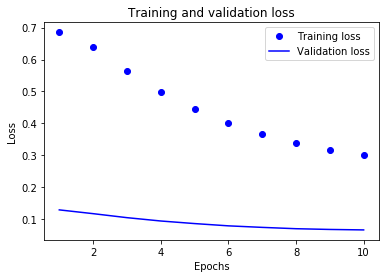

In [87]:
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

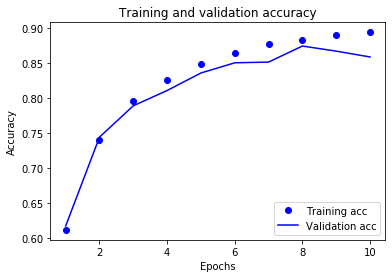

In [88]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

#### Model 2:

In [89]:
model = keras.Sequential([
    keras.layers.Embedding(len(d), 16),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [90]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [91]:
history = model.fit(new_train_data, new_train_label,
                    epochs=10,
                   validation_data=(new_val_data, new_val_label),
                   validation_steps=30)

Train on 35000 samples, validate on 5000 samples
Epoch 1/10
11744/35000 [=========>....................] - ETA: 7:59 - loss: 0.6932 - accuracy: 0.50 - ETA: 3:00 - loss: 0.6932 - accuracy: 0.45 - ETA: 2:01 - loss: 0.6932 - accuracy: 0.46 - ETA: 1:36 - loss: 0.6932 - accuracy: 0.47 - ETA: 1:21 - loss: 0.6932 - accuracy: 0.48 - ETA: 1:12 - loss: 0.6933 - accuracy: 0.48 - ETA: 1:05 - loss: 0.6932 - accuracy: 0.48 - ETA: 1:00 - loss: 0.6933 - accuracy: 0.47 - ETA: 56s - loss: 0.6932 - accuracy: 0.4945 - ETA: 53s - loss: 0.6932 - accuracy: 0.498 - ETA: 51s - loss: 0.6931 - accuracy: 0.501 - ETA: 49s - loss: 0.6931 - accuracy: 0.501 - ETA: 48s - loss: 0.6932 - accuracy: 0.498 - ETA: 46s - loss: 0.6933 - accuracy: 0.489 - ETA: 45s - loss: 0.6933 - accuracy: 0.491 - ETA: 44s - loss: 0.6933 - accuracy: 0.490 - ETA: 43s - loss: 0.6932 - accuracy: 0.494 - ETA: 42s - loss: 0.6932 - accuracy: 0.493 - ETA: 42s - loss: 0.6933 - accuracy: 0.489 - ETA: 41s - loss: 0.6932 - accuracy: 0.492 - ETA: 40s - l

12192/35000 [=========>....................] - ETA: 32s - loss: 0.5036 - accuracy: 0.812 - ETA: 31s - loss: 0.5401 - accuracy: 0.791 - ETA: 30s - loss: 0.5456 - accuracy: 0.750 - ETA: 29s - loss: 0.5489 - accuracy: 0.745 - ETA: 29s - loss: 0.5484 - accuracy: 0.767 - ETA: 28s - loss: 0.5454 - accuracy: 0.781 - ETA: 29s - loss: 0.5451 - accuracy: 0.783 - ETA: 29s - loss: 0.5401 - accuracy: 0.785 - ETA: 28s - loss: 0.5442 - accuracy: 0.777 - ETA: 28s - loss: 0.5463 - accuracy: 0.778 - ETA: 28s - loss: 0.5470 - accuracy: 0.779 - ETA: 28s - loss: 0.5514 - accuracy: 0.777 - ETA: 28s - loss: 0.5522 - accuracy: 0.773 - ETA: 29s - loss: 0.5541 - accuracy: 0.768 - ETA: 30s - loss: 0.5540 - accuracy: 0.771 - ETA: 30s - loss: 0.5554 - accuracy: 0.767 - ETA: 31s - loss: 0.5522 - accuracy: 0.767 - ETA: 31s - loss: 0.5514 - accuracy: 0.767 - ETA: 31s - loss: 0.5518 - accuracy: 0.765 - ETA: 32s - loss: 0.5542 - accuracy: 0.762 - ETA: 32s - loss: 0.5525 - accuracy: 0.768 - ETA: 32s - loss: 0.5523 - acc

35000/35000 [==============================] - ETA: 9s - loss: 0.4627 - accuracy: 0.82 - ETA: 9s - loss: 0.4624 - accuracy: 0.82 - ETA: 9s - loss: 0.4626 - accuracy: 0.82 - ETA: 9s - loss: 0.4624 - accuracy: 0.82 - ETA: 9s - loss: 0.4623 - accuracy: 0.82 - ETA: 8s - loss: 0.4624 - accuracy: 0.82 - ETA: 8s - loss: 0.4624 - accuracy: 0.82 - ETA: 8s - loss: 0.4623 - accuracy: 0.82 - ETA: 8s - loss: 0.4621 - accuracy: 0.82 - ETA: 8s - loss: 0.4620 - accuracy: 0.82 - ETA: 8s - loss: 0.4614 - accuracy: 0.82 - ETA: 8s - loss: 0.4615 - accuracy: 0.82 - ETA: 8s - loss: 0.4613 - accuracy: 0.82 - ETA: 8s - loss: 0.4612 - accuracy: 0.82 - ETA: 8s - loss: 0.4612 - accuracy: 0.82 - ETA: 8s - loss: 0.4609 - accuracy: 0.82 - ETA: 8s - loss: 0.4607 - accuracy: 0.82 - ETA: 8s - loss: 0.4605 - accuracy: 0.82 - ETA: 8s - loss: 0.4605 - accuracy: 0.82 - ETA: 8s - loss: 0.4601 - accuracy: 0.82 - ETA: 8s - loss: 0.4598 - accuracy: 0.82 - ETA: 7s - loss: 0.4599 - accuracy: 0.82 - ETA: 7s - loss: 0.4598 - accu

12032/35000 [=========>....................] - ETA: 34s - loss: 0.3952 - accuracy: 0.812 - ETA: 37s - loss: 0.2827 - accuracy: 0.885 - ETA: 37s - loss: 0.3057 - accuracy: 0.862 - ETA: 39s - loss: 0.3297 - accuracy: 0.866 - ETA: 37s - loss: 0.3100 - accuracy: 0.881 - ETA: 37s - loss: 0.2968 - accuracy: 0.894 - ETA: 37s - loss: 0.2759 - accuracy: 0.906 - ETA: 37s - loss: 0.2831 - accuracy: 0.900 - ETA: 37s - loss: 0.2812 - accuracy: 0.898 - ETA: 37s - loss: 0.2797 - accuracy: 0.896 - ETA: 37s - loss: 0.2795 - accuracy: 0.895 - ETA: 37s - loss: 0.2764 - accuracy: 0.898 - ETA: 37s - loss: 0.2733 - accuracy: 0.900 - ETA: 37s - loss: 0.2755 - accuracy: 0.894 - ETA: 37s - loss: 0.2720 - accuracy: 0.896 - ETA: 38s - loss: 0.2690 - accuracy: 0.897 - ETA: 37s - loss: 0.2677 - accuracy: 0.898 - ETA: 37s - loss: 0.2728 - accuracy: 0.898 - ETA: 36s - loss: 0.2799 - accuracy: 0.893 - ETA: 36s - loss: 0.2800 - accuracy: 0.892 - ETA: 36s - loss: 0.2767 - accuracy: 0.894 - ETA: 36s - loss: 0.2771 - acc

35000/35000 [==============================] - ETA: 9s - loss: 0.2769 - accuracy: 0.89 - ETA: 9s - loss: 0.2770 - accuracy: 0.89 - ETA: 9s - loss: 0.2771 - accuracy: 0.89 - ETA: 9s - loss: 0.2769 - accuracy: 0.89 - ETA: 9s - loss: 0.2768 - accuracy: 0.89 - ETA: 9s - loss: 0.2771 - accuracy: 0.89 - ETA: 8s - loss: 0.2775 - accuracy: 0.89 - ETA: 8s - loss: 0.2775 - accuracy: 0.89 - ETA: 8s - loss: 0.2778 - accuracy: 0.89 - ETA: 8s - loss: 0.2782 - accuracy: 0.89 - ETA: 8s - loss: 0.2781 - accuracy: 0.89 - ETA: 8s - loss: 0.2779 - accuracy: 0.89 - ETA: 8s - loss: 0.2778 - accuracy: 0.89 - ETA: 8s - loss: 0.2777 - accuracy: 0.89 - ETA: 8s - loss: 0.2776 - accuracy: 0.89 - ETA: 8s - loss: 0.2776 - accuracy: 0.89 - ETA: 8s - loss: 0.2776 - accuracy: 0.89 - ETA: 8s - loss: 0.2776 - accuracy: 0.89 - ETA: 8s - loss: 0.2775 - accuracy: 0.89 - ETA: 8s - loss: 0.2774 - accuracy: 0.89 - ETA: 8s - loss: 0.2772 - accuracy: 0.89 - ETA: 8s - loss: 0.2770 - accuracy: 0.89 - ETA: 7s - loss: 0.2769 - accu

12288/35000 [=========>....................] - ETA: 30s - loss: 0.0935 - accuracy: 0.968 - ETA: 29s - loss: 0.1704 - accuracy: 0.937 - ETA: 29s - loss: 0.2030 - accuracy: 0.925 - ETA: 28s - loss: 0.2182 - accuracy: 0.924 - ETA: 28s - loss: 0.2296 - accuracy: 0.906 - ETA: 29s - loss: 0.2241 - accuracy: 0.914 - ETA: 28s - loss: 0.2488 - accuracy: 0.904 - ETA: 28s - loss: 0.2362 - accuracy: 0.908 - ETA: 28s - loss: 0.2372 - accuracy: 0.906 - ETA: 28s - loss: 0.2465 - accuracy: 0.904 - ETA: 28s - loss: 0.2388 - accuracy: 0.906 - ETA: 28s - loss: 0.2363 - accuracy: 0.906 - ETA: 28s - loss: 0.2413 - accuracy: 0.900 - ETA: 28s - loss: 0.2363 - accuracy: 0.901 - ETA: 28s - loss: 0.2351 - accuracy: 0.903 - ETA: 28s - loss: 0.2374 - accuracy: 0.904 - ETA: 28s - loss: 0.2364 - accuracy: 0.906 - ETA: 28s - loss: 0.2355 - accuracy: 0.908 - ETA: 28s - loss: 0.2393 - accuracy: 0.908 - ETA: 29s - loss: 0.2418 - accuracy: 0.907 - ETA: 29s - loss: 0.2394 - accuracy: 0.907 - ETA: 29s - loss: 0.2387 - acc

35000/35000 [==============================] - ETA: 9s - loss: 0.2261 - accuracy: 0.91 - ETA: 9s - loss: 0.2262 - accuracy: 0.91 - ETA: 8s - loss: 0.2260 - accuracy: 0.91 - ETA: 8s - loss: 0.2261 - accuracy: 0.91 - ETA: 8s - loss: 0.2261 - accuracy: 0.91 - ETA: 8s - loss: 0.2260 - accuracy: 0.91 - ETA: 8s - loss: 0.2259 - accuracy: 0.91 - ETA: 8s - loss: 0.2259 - accuracy: 0.91 - ETA: 8s - loss: 0.2257 - accuracy: 0.91 - ETA: 8s - loss: 0.2257 - accuracy: 0.91 - ETA: 8s - loss: 0.2257 - accuracy: 0.91 - ETA: 8s - loss: 0.2258 - accuracy: 0.91 - ETA: 8s - loss: 0.2257 - accuracy: 0.91 - ETA: 8s - loss: 0.2256 - accuracy: 0.91 - ETA: 8s - loss: 0.2255 - accuracy: 0.91 - ETA: 8s - loss: 0.2252 - accuracy: 0.91 - ETA: 8s - loss: 0.2250 - accuracy: 0.91 - ETA: 8s - loss: 0.2250 - accuracy: 0.91 - ETA: 8s - loss: 0.2252 - accuracy: 0.91 - ETA: 7s - loss: 0.2252 - accuracy: 0.91 - ETA: 7s - loss: 0.2248 - accuracy: 0.91 - ETA: 7s - loss: 0.2248 - accuracy: 0.91 - ETA: 7s - loss: 0.2249 - accu

12128/35000 [=========>....................] - ETA: 39s - loss: 0.2316 - accuracy: 0.937 - ETA: 38s - loss: 0.2743 - accuracy: 0.895 - ETA: 39s - loss: 0.2545 - accuracy: 0.900 - ETA: 38s - loss: 0.2268 - accuracy: 0.915 - ETA: 35s - loss: 0.2057 - accuracy: 0.923 - ETA: 34s - loss: 0.2031 - accuracy: 0.923 - ETA: 32s - loss: 0.2090 - accuracy: 0.926 - ETA: 32s - loss: 0.2167 - accuracy: 0.918 - ETA: 31s - loss: 0.2249 - accuracy: 0.913 - ETA: 31s - loss: 0.2149 - accuracy: 0.914 - ETA: 30s - loss: 0.2066 - accuracy: 0.919 - ETA: 30s - loss: 0.2100 - accuracy: 0.918 - ETA: 30s - loss: 0.2127 - accuracy: 0.915 - ETA: 30s - loss: 0.2108 - accuracy: 0.915 - ETA: 30s - loss: 0.2080 - accuracy: 0.916 - ETA: 30s - loss: 0.2021 - accuracy: 0.919 - ETA: 31s - loss: 0.1978 - accuracy: 0.921 - ETA: 31s - loss: 0.1985 - accuracy: 0.922 - ETA: 32s - loss: 0.1962 - accuracy: 0.924 - ETA: 32s - loss: 0.1935 - accuracy: 0.925 - ETA: 32s - loss: 0.1939 - accuracy: 0.924 - ETA: 32s - loss: 0.1918 - acc

35000/35000 [==============================] - ETA: 10s - loss: 0.1924 - accuracy: 0.929 - ETA: 10s - loss: 0.1926 - accuracy: 0.929 - ETA: 10s - loss: 0.1928 - accuracy: 0.929 - ETA: 10s - loss: 0.1929 - accuracy: 0.929 - ETA: 9s - loss: 0.1927 - accuracy: 0.929 - ETA: 9s - loss: 0.1927 - accuracy: 0.92 - ETA: 9s - loss: 0.1928 - accuracy: 0.92 - ETA: 9s - loss: 0.1926 - accuracy: 0.92 - ETA: 9s - loss: 0.1924 - accuracy: 0.92 - ETA: 9s - loss: 0.1923 - accuracy: 0.92 - ETA: 9s - loss: 0.1925 - accuracy: 0.92 - ETA: 9s - loss: 0.1925 - accuracy: 0.92 - ETA: 9s - loss: 0.1925 - accuracy: 0.92 - ETA: 9s - loss: 0.1924 - accuracy: 0.92 - ETA: 9s - loss: 0.1921 - accuracy: 0.92 - ETA: 9s - loss: 0.1923 - accuracy: 0.92 - ETA: 9s - loss: 0.1923 - accuracy: 0.92 - ETA: 9s - loss: 0.1923 - accuracy: 0.92 - ETA: 9s - loss: 0.1924 - accuracy: 0.92 - ETA: 9s - loss: 0.1924 - accuracy: 0.92 - ETA: 8s - loss: 0.1925 - accuracy: 0.92 - ETA: 8s - loss: 0.1925 - accuracy: 0.92 - ETA: 8s - loss: 0.19

12128/35000 [=========>....................] - ETA: 30s - loss: 0.0954 - accuracy: 0.968 - ETA: 30s - loss: 0.1790 - accuracy: 0.968 - ETA: 30s - loss: 0.1684 - accuracy: 0.956 - ETA: 31s - loss: 0.1575 - accuracy: 0.946 - ETA: 30s - loss: 0.1796 - accuracy: 0.930 - ETA: 30s - loss: 0.1697 - accuracy: 0.929 - ETA: 29s - loss: 0.1684 - accuracy: 0.932 - ETA: 30s - loss: 0.1618 - accuracy: 0.935 - ETA: 29s - loss: 0.1741 - accuracy: 0.935 - ETA: 29s - loss: 0.1762 - accuracy: 0.932 - ETA: 29s - loss: 0.1909 - accuracy: 0.927 - ETA: 30s - loss: 0.1879 - accuracy: 0.929 - ETA: 30s - loss: 0.1904 - accuracy: 0.926 - ETA: 30s - loss: 0.1886 - accuracy: 0.925 - ETA: 30s - loss: 0.1868 - accuracy: 0.927 - ETA: 31s - loss: 0.1897 - accuracy: 0.927 - ETA: 31s - loss: 0.1883 - accuracy: 0.929 - ETA: 31s - loss: 0.1823 - accuracy: 0.932 - ETA: 31s - loss: 0.1827 - accuracy: 0.931 - ETA: 31s - loss: 0.1917 - accuracy: 0.929 - ETA: 31s - loss: 0.1952 - accuracy: 0.929 - ETA: 30s - loss: 0.1936 - acc

35000/35000 [==============================] - ETA: 9s - loss: 0.1674 - accuracy: 0.93 - ETA: 9s - loss: 0.1675 - accuracy: 0.93 - ETA: 8s - loss: 0.1674 - accuracy: 0.93 - ETA: 8s - loss: 0.1677 - accuracy: 0.93 - ETA: 8s - loss: 0.1675 - accuracy: 0.93 - ETA: 8s - loss: 0.1675 - accuracy: 0.93 - ETA: 8s - loss: 0.1676 - accuracy: 0.93 - ETA: 8s - loss: 0.1676 - accuracy: 0.93 - ETA: 8s - loss: 0.1674 - accuracy: 0.93 - ETA: 8s - loss: 0.1672 - accuracy: 0.93 - ETA: 8s - loss: 0.1672 - accuracy: 0.93 - ETA: 8s - loss: 0.1671 - accuracy: 0.93 - ETA: 8s - loss: 0.1670 - accuracy: 0.93 - ETA: 8s - loss: 0.1672 - accuracy: 0.93 - ETA: 8s - loss: 0.1673 - accuracy: 0.93 - ETA: 8s - loss: 0.1673 - accuracy: 0.93 - ETA: 8s - loss: 0.1671 - accuracy: 0.93 - ETA: 8s - loss: 0.1674 - accuracy: 0.93 - ETA: 7s - loss: 0.1676 - accuracy: 0.93 - ETA: 7s - loss: 0.1677 - accuracy: 0.93 - ETA: 7s - loss: 0.1676 - accuracy: 0.93 - ETA: 7s - loss: 0.1675 - accuracy: 0.93 - ETA: 7s - loss: 0.1673 - accu

In [92]:
loss, accuracy = model.evaluate(new_test_data, new_test_label)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

 - 1s 141us/sample - loss: 0.5170 - accuracy: 0.8974


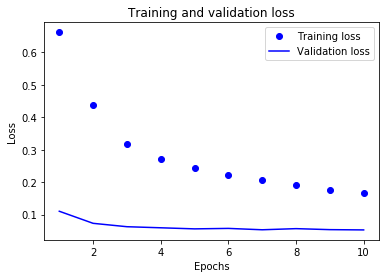

In [93]:
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

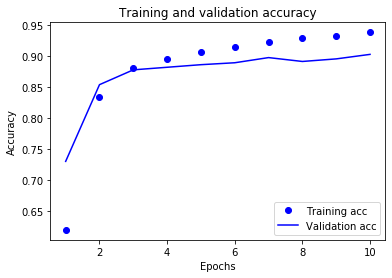

In [94]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

#### Model 3 :

In [95]:
model = keras.Sequential([
    keras.layers.Embedding(len(d), 16),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [96]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [97]:
history = model.fit(new_train_data, new_train_label,
                    epochs=10,
                   validation_data=(new_val_data, new_val_label),
                   validation_steps=30)

Train on 35000 samples, validate on 5000 samples
Epoch 1/10
11712/35000 [=========>....................] - ETA: 6:18 - loss: 0.6969 - accuracy: 0.43 - ETA: 2:26 - loss: 0.6902 - accuracy: 0.57 - ETA: 1:40 - loss: 0.6915 - accuracy: 0.54 - ETA: 1:20 - loss: 0.6912 - accuracy: 0.54 - ETA: 1:09 - loss: 0.6908 - accuracy: 0.54 - ETA: 1:02 - loss: 0.6914 - accuracy: 0.53 - ETA: 57s - loss: 0.6919 - accuracy: 0.5312 - ETA: 53s - loss: 0.6931 - accuracy: 0.516 - ETA: 50s - loss: 0.6927 - accuracy: 0.520 - ETA: 48s - loss: 0.6925 - accuracy: 0.523 - ETA: 46s - loss: 0.6923 - accuracy: 0.525 - ETA: 45s - loss: 0.6922 - accuracy: 0.524 - ETA: 44s - loss: 0.6926 - accuracy: 0.520 - ETA: 43s - loss: 0.6925 - accuracy: 0.519 - ETA: 42s - loss: 0.6928 - accuracy: 0.515 - ETA: 41s - loss: 0.6926 - accuracy: 0.518 - ETA: 40s - loss: 0.6929 - accuracy: 0.514 - ETA: 40s - loss: 0.6924 - accuracy: 0.521 - ETA: 39s - loss: 0.6927 - accuracy: 0.517 - ETA: 39s - loss: 0.6928 - accuracy: 0.516 - ETA: 38s - l

13280/35000 [==========>...................] - ETA: 30s - loss: 0.5714 - accuracy: 0.781 - ETA: 27s - loss: 0.5415 - accuracy: 0.851 - ETA: 27s - loss: 0.5434 - accuracy: 0.833 - ETA: 27s - loss: 0.5460 - accuracy: 0.824 - ETA: 27s - loss: 0.5641 - accuracy: 0.784 - ETA: 27s - loss: 0.5556 - accuracy: 0.796 - ETA: 27s - loss: 0.5576 - accuracy: 0.790 - ETA: 27s - loss: 0.5581 - accuracy: 0.781 - ETA: 27s - loss: 0.5574 - accuracy: 0.774 - ETA: 27s - loss: 0.5579 - accuracy: 0.773 - ETA: 27s - loss: 0.5569 - accuracy: 0.779 - ETA: 27s - loss: 0.5555 - accuracy: 0.778 - ETA: 27s - loss: 0.5544 - accuracy: 0.778 - ETA: 27s - loss: 0.5527 - accuracy: 0.776 - ETA: 27s - loss: 0.5531 - accuracy: 0.769 - ETA: 27s - loss: 0.5556 - accuracy: 0.762 - ETA: 27s - loss: 0.5553 - accuracy: 0.762 - ETA: 27s - loss: 0.5523 - accuracy: 0.766 - ETA: 27s - loss: 0.5458 - accuracy: 0.775 - ETA: 27s - loss: 0.5514 - accuracy: 0.765 - ETA: 26s - loss: 0.5511 - accuracy: 0.762 - ETA: 26s - loss: 0.5522 - acc

35000/35000 [==============================] - ETA: 6s - loss: 0.4434 - accuracy: 0.83 - ETA: 6s - loss: 0.4431 - accuracy: 0.83 - ETA: 6s - loss: 0.4429 - accuracy: 0.83 - ETA: 6s - loss: 0.4429 - accuracy: 0.83 - ETA: 6s - loss: 0.4431 - accuracy: 0.83 - ETA: 6s - loss: 0.4428 - accuracy: 0.83 - ETA: 6s - loss: 0.4426 - accuracy: 0.83 - ETA: 6s - loss: 0.4424 - accuracy: 0.83 - ETA: 6s - loss: 0.4420 - accuracy: 0.83 - ETA: 6s - loss: 0.4419 - accuracy: 0.83 - ETA: 6s - loss: 0.4419 - accuracy: 0.83 - ETA: 6s - loss: 0.4420 - accuracy: 0.83 - ETA: 6s - loss: 0.4418 - accuracy: 0.83 - ETA: 6s - loss: 0.4417 - accuracy: 0.83 - ETA: 5s - loss: 0.4417 - accuracy: 0.83 - ETA: 5s - loss: 0.4414 - accuracy: 0.83 - ETA: 5s - loss: 0.4416 - accuracy: 0.83 - ETA: 5s - loss: 0.4413 - accuracy: 0.83 - ETA: 5s - loss: 0.4411 - accuracy: 0.83 - ETA: 5s - loss: 0.4410 - accuracy: 0.83 - ETA: 5s - loss: 0.4408 - accuracy: 0.83 - ETA: 5s - loss: 0.4407 - accuracy: 0.83 - ETA: 5s - loss: 0.4405 - accu

12800/35000 [=========>....................] - ETA: 28s - loss: 0.1929 - accuracy: 0.968 - ETA: 28s - loss: 0.2153 - accuracy: 0.937 - ETA: 27s - loss: 0.2954 - accuracy: 0.911 - ETA: 27s - loss: 0.2733 - accuracy: 0.910 - ETA: 27s - loss: 0.2701 - accuracy: 0.912 - ETA: 27s - loss: 0.2608 - accuracy: 0.911 - ETA: 27s - loss: 0.2631 - accuracy: 0.908 - ETA: 27s - loss: 0.2576 - accuracy: 0.910 - ETA: 27s - loss: 0.2618 - accuracy: 0.901 - ETA: 27s - loss: 0.2592 - accuracy: 0.904 - ETA: 27s - loss: 0.2621 - accuracy: 0.906 - ETA: 27s - loss: 0.2609 - accuracy: 0.904 - ETA: 27s - loss: 0.2607 - accuracy: 0.905 - ETA: 27s - loss: 0.2594 - accuracy: 0.906 - ETA: 27s - loss: 0.2577 - accuracy: 0.906 - ETA: 27s - loss: 0.2655 - accuracy: 0.903 - ETA: 27s - loss: 0.2617 - accuracy: 0.905 - ETA: 27s - loss: 0.2635 - accuracy: 0.906 - ETA: 27s - loss: 0.2672 - accuracy: 0.904 - ETA: 27s - loss: 0.2721 - accuracy: 0.901 - ETA: 27s - loss: 0.2718 - accuracy: 0.901 - ETA: 27s - loss: 0.2738 - acc

35000/35000 [==============================] - ETA: 7s - loss: 0.2707 - accuracy: 0.89 - ETA: 7s - loss: 0.2706 - accuracy: 0.89 - ETA: 7s - loss: 0.2706 - accuracy: 0.89 - ETA: 7s - loss: 0.2708 - accuracy: 0.89 - ETA: 7s - loss: 0.2707 - accuracy: 0.89 - ETA: 7s - loss: 0.2707 - accuracy: 0.89 - ETA: 7s - loss: 0.2706 - accuracy: 0.89 - ETA: 7s - loss: 0.2706 - accuracy: 0.89 - ETA: 7s - loss: 0.2707 - accuracy: 0.89 - ETA: 7s - loss: 0.2706 - accuracy: 0.89 - ETA: 7s - loss: 0.2705 - accuracy: 0.89 - ETA: 7s - loss: 0.2704 - accuracy: 0.89 - ETA: 6s - loss: 0.2704 - accuracy: 0.89 - ETA: 6s - loss: 0.2703 - accuracy: 0.89 - ETA: 6s - loss: 0.2702 - accuracy: 0.89 - ETA: 6s - loss: 0.2702 - accuracy: 0.89 - ETA: 6s - loss: 0.2700 - accuracy: 0.89 - ETA: 6s - loss: 0.2699 - accuracy: 0.89 - ETA: 6s - loss: 0.2699 - accuracy: 0.89 - ETA: 6s - loss: 0.2699 - accuracy: 0.89 - ETA: 6s - loss: 0.2696 - accuracy: 0.89 - ETA: 6s - loss: 0.2693 - accuracy: 0.89 - ETA: 6s - loss: 0.2695 - accu

12192/35000 [=========>....................] - ETA: 34s - loss: 0.2327 - accuracy: 0.906 - ETA: 36s - loss: 0.2405 - accuracy: 0.906 - ETA: 35s - loss: 0.2490 - accuracy: 0.906 - ETA: 35s - loss: 0.2483 - accuracy: 0.906 - ETA: 34s - loss: 0.2473 - accuracy: 0.909 - ETA: 33s - loss: 0.2536 - accuracy: 0.903 - ETA: 33s - loss: 0.2357 - accuracy: 0.911 - ETA: 32s - loss: 0.2324 - accuracy: 0.916 - ETA: 32s - loss: 0.2302 - accuracy: 0.919 - ETA: 32s - loss: 0.2331 - accuracy: 0.916 - ETA: 31s - loss: 0.2205 - accuracy: 0.921 - ETA: 32s - loss: 0.2201 - accuracy: 0.921 - ETA: 32s - loss: 0.2252 - accuracy: 0.917 - ETA: 33s - loss: 0.2250 - accuracy: 0.916 - ETA: 33s - loss: 0.2216 - accuracy: 0.919 - ETA: 33s - loss: 0.2212 - accuracy: 0.918 - ETA: 33s - loss: 0.2204 - accuracy: 0.919 - ETA: 32s - loss: 0.2167 - accuracy: 0.920 - ETA: 32s - loss: 0.2191 - accuracy: 0.919 - ETA: 32s - loss: 0.2180 - accuracy: 0.920 - ETA: 32s - loss: 0.2156 - accuracy: 0.922 - ETA: 32s - loss: 0.2185 - acc

35000/35000 [==============================] - ETA: 8s - loss: 0.2181 - accuracy: 0.91 - ETA: 8s - loss: 0.2179 - accuracy: 0.91 - ETA: 8s - loss: 0.2177 - accuracy: 0.91 - ETA: 8s - loss: 0.2178 - accuracy: 0.91 - ETA: 8s - loss: 0.2177 - accuracy: 0.91 - ETA: 8s - loss: 0.2177 - accuracy: 0.91 - ETA: 8s - loss: 0.2177 - accuracy: 0.91 - ETA: 8s - loss: 0.2176 - accuracy: 0.91 - ETA: 8s - loss: 0.2176 - accuracy: 0.91 - ETA: 8s - loss: 0.2177 - accuracy: 0.91 - ETA: 8s - loss: 0.2174 - accuracy: 0.91 - ETA: 8s - loss: 0.2173 - accuracy: 0.91 - ETA: 7s - loss: 0.2174 - accuracy: 0.91 - ETA: 7s - loss: 0.2172 - accuracy: 0.91 - ETA: 7s - loss: 0.2173 - accuracy: 0.91 - ETA: 7s - loss: 0.2173 - accuracy: 0.91 - ETA: 7s - loss: 0.2176 - accuracy: 0.91 - ETA: 7s - loss: 0.2176 - accuracy: 0.91 - ETA: 7s - loss: 0.2177 - accuracy: 0.91 - ETA: 7s - loss: 0.2175 - accuracy: 0.91 - ETA: 7s - loss: 0.2174 - accuracy: 0.91 - ETA: 7s - loss: 0.2174 - accuracy: 0.91 - ETA: 7s - loss: 0.2177 - accu

11968/35000 [=========>....................] - ETA: 27s - loss: 0.1703 - accuracy: 0.968 - ETA: 29s - loss: 0.1873 - accuracy: 0.937 - ETA: 28s - loss: 0.1782 - accuracy: 0.925 - ETA: 28s - loss: 0.1964 - accuracy: 0.915 - ETA: 28s - loss: 0.1863 - accuracy: 0.923 - ETA: 28s - loss: 0.1832 - accuracy: 0.926 - ETA: 28s - loss: 0.1873 - accuracy: 0.923 - ETA: 28s - loss: 0.1907 - accuracy: 0.925 - ETA: 28s - loss: 0.1950 - accuracy: 0.928 - ETA: 28s - loss: 0.1947 - accuracy: 0.929 - ETA: 28s - loss: 0.2037 - accuracy: 0.928 - ETA: 28s - loss: 0.2097 - accuracy: 0.925 - ETA: 29s - loss: 0.2030 - accuracy: 0.925 - ETA: 28s - loss: 0.2035 - accuracy: 0.924 - ETA: 28s - loss: 0.2021 - accuracy: 0.925 - ETA: 28s - loss: 0.2023 - accuracy: 0.927 - ETA: 28s - loss: 0.1983 - accuracy: 0.928 - ETA: 28s - loss: 0.2007 - accuracy: 0.927 - ETA: 28s - loss: 0.2013 - accuracy: 0.928 - ETA: 28s - loss: 0.2054 - accuracy: 0.925 - ETA: 28s - loss: 0.2025 - accuracy: 0.924 - ETA: 28s - loss: 0.1976 - acc

35000/35000 [==============================] - ETA: 9s - loss: 0.1878 - accuracy: 0.93 - ETA: 9s - loss: 0.1882 - accuracy: 0.93 - ETA: 9s - loss: 0.1885 - accuracy: 0.93 - ETA: 9s - loss: 0.1884 - accuracy: 0.93 - ETA: 9s - loss: 0.1882 - accuracy: 0.93 - ETA: 8s - loss: 0.1880 - accuracy: 0.93 - ETA: 8s - loss: 0.1880 - accuracy: 0.93 - ETA: 8s - loss: 0.1880 - accuracy: 0.93 - ETA: 8s - loss: 0.1879 - accuracy: 0.93 - ETA: 8s - loss: 0.1877 - accuracy: 0.93 - ETA: 8s - loss: 0.1875 - accuracy: 0.93 - ETA: 8s - loss: 0.1876 - accuracy: 0.93 - ETA: 8s - loss: 0.1877 - accuracy: 0.93 - ETA: 8s - loss: 0.1877 - accuracy: 0.93 - ETA: 8s - loss: 0.1878 - accuracy: 0.93 - ETA: 8s - loss: 0.1880 - accuracy: 0.93 - ETA: 8s - loss: 0.1880 - accuracy: 0.93 - ETA: 8s - loss: 0.1878 - accuracy: 0.93 - ETA: 8s - loss: 0.1879 - accuracy: 0.93 - ETA: 8s - loss: 0.1880 - accuracy: 0.93 - ETA: 8s - loss: 0.1886 - accuracy: 0.93 - ETA: 7s - loss: 0.1884 - accuracy: 0.93 - ETA: 7s - loss: 0.1884 - accu

12096/35000 [=========>....................] - ETA: 32s - loss: 0.3516 - accuracy: 0.906 - ETA: 29s - loss: 0.2311 - accuracy: 0.916 - ETA: 29s - loss: 0.1837 - accuracy: 0.931 - ETA: 29s - loss: 0.2114 - accuracy: 0.928 - ETA: 28s - loss: 0.1993 - accuracy: 0.931 - ETA: 28s - loss: 0.1945 - accuracy: 0.932 - ETA: 28s - loss: 0.1823 - accuracy: 0.937 - ETA: 28s - loss: 0.1830 - accuracy: 0.939 - ETA: 28s - loss: 0.1917 - accuracy: 0.937 - ETA: 28s - loss: 0.1968 - accuracy: 0.931 - ETA: 28s - loss: 0.1893 - accuracy: 0.933 - ETA: 28s - loss: 0.1874 - accuracy: 0.933 - ETA: 28s - loss: 0.1930 - accuracy: 0.930 - ETA: 28s - loss: 0.1870 - accuracy: 0.930 - ETA: 28s - loss: 0.1864 - accuracy: 0.930 - ETA: 28s - loss: 0.1834 - accuracy: 0.931 - ETA: 28s - loss: 0.1855 - accuracy: 0.932 - ETA: 28s - loss: 0.1843 - accuracy: 0.933 - ETA: 28s - loss: 0.1817 - accuracy: 0.934 - ETA: 28s - loss: 0.1800 - accuracy: 0.935 - ETA: 28s - loss: 0.1785 - accuracy: 0.935 - ETA: 28s - loss: 0.1768 - acc

35000/35000 [==============================] - ETA: 9s - loss: 0.1642 - accuracy: 0.94 - ETA: 9s - loss: 0.1643 - accuracy: 0.94 - ETA: 9s - loss: 0.1642 - accuracy: 0.94 - ETA: 9s - loss: 0.1639 - accuracy: 0.94 - ETA: 9s - loss: 0.1640 - accuracy: 0.94 - ETA: 8s - loss: 0.1642 - accuracy: 0.94 - ETA: 8s - loss: 0.1641 - accuracy: 0.94 - ETA: 8s - loss: 0.1640 - accuracy: 0.94 - ETA: 8s - loss: 0.1640 - accuracy: 0.94 - ETA: 8s - loss: 0.1639 - accuracy: 0.94 - ETA: 8s - loss: 0.1640 - accuracy: 0.94 - ETA: 8s - loss: 0.1644 - accuracy: 0.94 - ETA: 8s - loss: 0.1643 - accuracy: 0.94 - ETA: 8s - loss: 0.1644 - accuracy: 0.94 - ETA: 8s - loss: 0.1643 - accuracy: 0.94 - ETA: 8s - loss: 0.1643 - accuracy: 0.94 - ETA: 8s - loss: 0.1642 - accuracy: 0.94 - ETA: 8s - loss: 0.1642 - accuracy: 0.94 - ETA: 8s - loss: 0.1645 - accuracy: 0.94 - ETA: 8s - loss: 0.1644 - accuracy: 0.94 - ETA: 8s - loss: 0.1643 - accuracy: 0.94 - ETA: 7s - loss: 0.1642 - accuracy: 0.94 - ETA: 7s - loss: 0.1643 - accu

In [98]:
loss, accuracy = model.evaluate(new_test_data, new_test_label)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

 - 1s 140us/sample - loss: 0.5120 - accuracy: 0.8978


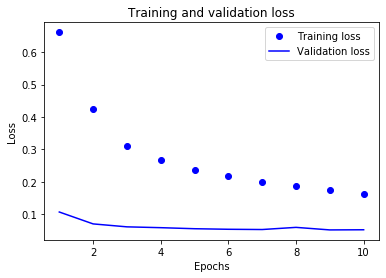

In [99]:
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

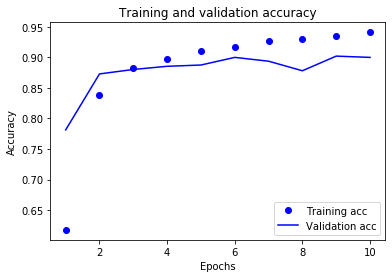

In [100]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

### Data : Corpus1

In [29]:
file = open(r'C:\Users\Shubham\Desktop\Machine Learning\Dataset\corpus1_to_int', 'rb')
new_data = pickle.load(file)
file.close()

In [30]:
file = open(r'C:\Users\Shubham\Desktop\Machine Learning\Dataset\corpus1_to_int_dictionary', 'rb')
d = pickle.load(file)
file.close()

In [31]:
corpus = pd.read_csv(r'C:\Users\Shubham\Desktop\Machine Learning\Dataset\corpus1.csv')
labels = corpus['Labels']

In [32]:
new_encoder = LabelEncoder()
new_label = new_encoder.fit_transform(labels)

In [33]:
new_data = keras.preprocessing.sequence.pad_sequences(new_data,
                                                        padding='post')

In [34]:
new_train_data = new_data[:35000]
new_train_label = new_label[:35000]

new_val_data = new_data[35000:40000]
new_val_label = new_label[35000:40000]

new_test_data = new_data[40000:]
new_test_label = new_label[40000:]

In [35]:
train_dataset = tf.data.Dataset.from_tensor_slices((new_train_data, new_train_label))
val_dataset = tf.data.Dataset.from_tensor_slices((new_val_data, new_val_label))
test_dataset = tf.data.Dataset.from_tensor_slices((new_test_data, new_test_label))

train_batches = (train_dataset
                 .padded_batch(32, train_dataset.output_shapes))

val_batches = (val_dataset
                .padded_batch(32, train_dataset.output_shapes))

test_batches = (test_dataset
                .padded_batch(32, train_dataset.output_shapes))

#### New Model 1

In [36]:
model = keras.Sequential([
    keras.layers.Embedding(len(d), 64),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(16, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(1, activation='sigmoid')
])

In [37]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [38]:
history = model.fit(train_batches,
                   epochs=50,
                   validation_data=val_batches,
                   validation_steps=30,
                   verbose=2,
                   callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', mode='min')])

Epoch 1/50
1094/1094 - 144s - loss: 0.6804 - accuracy: 0.5957 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/50
1094/1094 - 129s - loss: 0.4761 - accuracy: 0.8495 - val_loss: 0.4433 - val_accuracy: 0.8469
Epoch 3/50
1094/1094 - 114s - loss: 0.3725 - accuracy: 0.8859 - val_loss: 0.3844 - val_accuracy: 0.8802
Epoch 4/50
1094/1094 - 117s - loss: 0.3246 - accuracy: 0.9014 - val_loss: 0.3531 - val_accuracy: 0.8979
Epoch 5/50
1094/1094 - 118s - loss: 0.2927 - accuracy: 0.9106 - val_loss: 0.3335 - val_accuracy: 0.9062
Epoch 6/50
1094/1094 - 118s - loss: 0.2684 - accuracy: 0.9185 - val_loss: 0.3197 - val_accuracy: 0.9094
Epoch 7/50
1094/1094 - 113s - loss: 0.2486 - accuracy: 0.9254 - val_loss: 0.3096 - val_accuracy: 0.9146
Epoch 8/50
1094/1094 - 116s - loss: 0.2316 - accuracy: 0.9309 - val_loss: 0.3023 - val_accuracy: 0.9208
Epoch 9/50
1094/1094 - 107s - loss: 0.2167 - accuracy: 0.9359 - val_loss: 0.2972 - val_accuracy: 0.9208
Epoch 10/50
1094/1094 - 105s - loss: 0.2034 - accuracy: 

In [39]:
loss, accuracy = model.evaluate(test_batches)

313/313 [==============================] - ETA: 5s - loss: 0.4825 - accuracy: 0.90 - ETA: 5s - loss: 0.2775 - accuracy: 0.90 - ETA: 5s - loss: 0.3351 - accuracy: 0.89 - ETA: 5s - loss: 0.2983 - accuracy: 0.90 - ETA: 5s - loss: 0.2833 - accuracy: 0.91 - ETA: 5s - loss: 0.2804 - accuracy: 0.91 - ETA: 5s - loss: 0.2863 - accuracy: 0.91 - ETA: 5s - loss: 0.2842 - accuracy: 0.90 - ETA: 5s - loss: 0.2823 - accuracy: 0.90 - ETA: 5s - loss: 0.2763 - accuracy: 0.90 - ETA: 5s - loss: 0.2808 - accuracy: 0.91 - ETA: 4s - loss: 0.2819 - accuracy: 0.90 - ETA: 4s - loss: 0.2772 - accuracy: 0.90 - ETA: 4s - loss: 0.2703 - accuracy: 0.91 - ETA: 4s - loss: 0.2729 - accuracy: 0.90 - ETA: 4s - loss: 0.2742 - accuracy: 0.90 - ETA: 4s - loss: 0.2751 - accuracy: 0.90 - ETA: 4s - loss: 0.2811 - accuracy: 0.90 - ETA: 4s - loss: 0.2783 - accuracy: 0.90 - ETA: 4s - loss: 0.2749 - accuracy: 0.90 - ETA: 4s - loss: 0.2798 - accuracy: 0.90 - ETA: 4s - loss: 0.2800 - accuracy: 0.90 - ETA: 4s - loss: 0.2831 - accuracy

In [40]:
print(loss)
print(accuracy)

0.29275091263813713
0.8987


In [41]:
model.save('model_corpus1_1.h5')

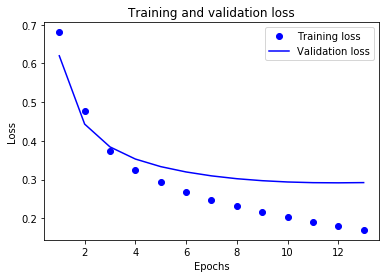

In [42]:
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

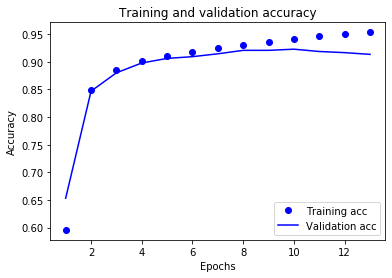

In [43]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

#### New Model 2

In [44]:
new_train_dataset = tf.data.Dataset.from_tensor_slices((new_data[:40000], new_label[:40000]))
new_val_dataset = tf.data.Dataset.from_tensor_slices((new_data[40000:45000], new_label[40000:45000]))
new_test_dataset = tf.data.Dataset.from_tensor_slices((new_data[45000:], new_label[45000:]))

new_train_batches = (new_train_dataset
                 .padded_batch(32, train_dataset.output_shapes))

new_val_batches = (new_val_dataset
                .padded_batch(32, train_dataset.output_shapes))

new_test_batches = (new_test_dataset
                .padded_batch(32, train_dataset.output_shapes))

In [154]:
model = keras.Sequential([
    keras.layers.Embedding(len(d), 24),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [155]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [156]:
history = model.fit(new_train_batches,
                   epochs=50,
                   validation_data=new_val_batches,
                   validation_steps=30,
                   verbose=2,
                   callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', mode='min')])

Epoch 1/50
1250/1250 - 75s - loss: 0.6361 - accuracy: 0.6686 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/50
1250/1250 - 72s - loss: 0.3642 - accuracy: 0.8690 - val_loss: 0.3103 - val_accuracy: 0.8938
Epoch 3/50
1250/1250 - 71s - loss: 0.2704 - accuracy: 0.8981 - val_loss: 0.2777 - val_accuracy: 0.8979
Epoch 4/50
1250/1250 - 72s - loss: 0.2310 - accuracy: 0.9129 - val_loss: 0.2646 - val_accuracy: 0.9031
Epoch 5/50
1250/1250 - 70s - loss: 0.2045 - accuracy: 0.9230 - val_loss: 0.2578 - val_accuracy: 0.9104
Epoch 6/50
1250/1250 - 71s - loss: 0.1835 - accuracy: 0.9324 - val_loss: 0.2541 - val_accuracy: 0.9094
Epoch 7/50
1250/1250 - 71s - loss: 0.1656 - accuracy: 0.9399 - val_loss: 0.2525 - val_accuracy: 0.9042
Epoch 8/50
1250/1250 - 70s - loss: 0.1497 - accuracy: 0.9470 - val_loss: 0.2525 - val_accuracy: 0.9094


In [157]:
loss, accuracy = model.evaluate(new_test_batches)

157/157 [==============================] - ETA: 2s - loss: 0.2699 - accuracy: 0.87 - ETA: 1s - loss: 0.2599 - accuracy: 0.90 - ETA: 1s - loss: 0.2554 - accuracy: 0.90 - ETA: 1s - loss: 0.2318 - accuracy: 0.91 - ETA: 1s - loss: 0.2317 - accuracy: 0.91 - ETA: 1s - loss: 0.2497 - accuracy: 0.91 - ETA: 1s - loss: 0.2549 - accuracy: 0.90 - ETA: 1s - loss: 0.2457 - accuracy: 0.90 - ETA: 1s - loss: 0.2491 - accuracy: 0.90 - ETA: 1s - loss: 0.2433 - accuracy: 0.90 - ETA: 1s - loss: 0.2588 - accuracy: 0.89 - ETA: 1s - loss: 0.2615 - accuracy: 0.90 - ETA: 1s - loss: 0.2638 - accuracy: 0.90 - ETA: 1s - loss: 0.2582 - accuracy: 0.90 - ETA: 1s - loss: 0.2693 - accuracy: 0.90 - ETA: 1s - loss: 0.2657 - accuracy: 0.90 - ETA: 1s - loss: 0.2696 - accuracy: 0.90 - ETA: 1s - loss: 0.2682 - accuracy: 0.90 - ETA: 1s - loss: 0.2716 - accuracy: 0.89 - ETA: 1s - loss: 0.2713 - accuracy: 0.89 - ETA: 1s - loss: 0.2684 - accuracy: 0.90 - ETA: 1s - loss: 0.2719 - accuracy: 0.89 - ETA: 1s - loss: 0.2688 - accuracy

In [158]:
print(loss, accuracy)

0.2710351424327322 0.8978


#### New Model 3

In [162]:
model = keras.Sequential([
    keras.layers.Embedding(len(d), 32),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [163]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [164]:
history = model.fit(new_train_batches,
                   epochs=50,
                   validation_data=new_val_batches,
                   validation_steps=30,
                   verbose=2,
                   callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', mode='min')])

Epoch 1/50
1250/1250 - 81s - loss: 0.6157 - accuracy: 0.6829 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/50
1250/1250 - 71s - loss: 0.3430 - accuracy: 0.8737 - val_loss: 0.3064 - val_accuracy: 0.8990
Epoch 3/50
1250/1250 - 69s - loss: 0.2593 - accuracy: 0.9023 - val_loss: 0.2819 - val_accuracy: 0.9000
Epoch 4/50
1250/1250 - 69s - loss: 0.2215 - accuracy: 0.9168 - val_loss: 0.2735 - val_accuracy: 0.9021
Epoch 5/50
1250/1250 - 69s - loss: 0.1950 - accuracy: 0.9273 - val_loss: 0.2682 - val_accuracy: 0.9094
Epoch 6/50
1250/1250 - 71s - loss: 0.1735 - accuracy: 0.9365 - val_loss: 0.2675 - val_accuracy: 0.9042
Epoch 7/50
1250/1250 - 69s - loss: 0.1552 - accuracy: 0.9440 - val_loss: 0.2694 - val_accuracy: 0.9073


In [165]:
loss, accuracy = model.evaluate(new_test_batches)

157/157 [==============================] - ETA: 2s - loss: 0.2713 - accuracy: 0.90 - ETA: 2s - loss: 0.3554 - accuracy: 0.89 - ETA: 2s - loss: 0.3019 - accuracy: 0.90 - ETA: 2s - loss: 0.2715 - accuracy: 0.91 - ETA: 1s - loss: 0.2497 - accuracy: 0.92 - ETA: 1s - loss: 0.2578 - accuracy: 0.91 - ETA: 1s - loss: 0.2643 - accuracy: 0.91 - ETA: 1s - loss: 0.2564 - accuracy: 0.90 - ETA: 1s - loss: 0.2508 - accuracy: 0.90 - ETA: 1s - loss: 0.2642 - accuracy: 0.90 - ETA: 1s - loss: 0.2686 - accuracy: 0.90 - ETA: 1s - loss: 0.2677 - accuracy: 0.90 - ETA: 1s - loss: 0.2722 - accuracy: 0.90 - ETA: 1s - loss: 0.2660 - accuracy: 0.90 - ETA: 1s - loss: 0.2692 - accuracy: 0.90 - ETA: 1s - loss: 0.2707 - accuracy: 0.90 - ETA: 1s - loss: 0.2689 - accuracy: 0.90 - ETA: 1s - loss: 0.2742 - accuracy: 0.90 - ETA: 1s - loss: 0.2684 - accuracy: 0.90 - ETA: 1s - loss: 0.2683 - accuracy: 0.90 - ETA: 1s - loss: 0.2683 - accuracy: 0.90 - ETA: 0s - loss: 0.2652 - accuracy: 0.90 - ETA: 0s - loss: 0.2612 - accuracy

In [166]:
print(loss)
print(accuracy)

0.26821419658364765
0.8988


#### New Model 4

In [175]:
model = keras.Sequential([
    keras.layers.Embedding(len(d), 32),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(14, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [176]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [169]:
history = model.fit(new_train_batches,
                   epochs=50,
                   validation_data=new_val_batches,
                   validation_steps=30,
                   verbose=2,
                   callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', mode='min')])

Epoch 1/50
1250/1250 - 70s - loss: 0.6262 - accuracy: 0.6593 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/50
1250/1250 - 69s - loss: 0.3407 - accuracy: 0.8723 - val_loss: 0.3009 - val_accuracy: 0.8979
Epoch 3/50
1250/1250 - 68s - loss: 0.2578 - accuracy: 0.9021 - val_loss: 0.2776 - val_accuracy: 0.8990
Epoch 4/50
1250/1250 - 69s - loss: 0.2209 - accuracy: 0.9157 - val_loss: 0.2669 - val_accuracy: 0.9031
Epoch 5/50
1250/1250 - 69s - loss: 0.1947 - accuracy: 0.9268 - val_loss: 0.2613 - val_accuracy: 0.9083
Epoch 6/50
1250/1250 - 71s - loss: 0.1733 - accuracy: 0.9362 - val_loss: 0.2591 - val_accuracy: 0.9083
Epoch 7/50
1250/1250 - 68s - loss: 0.1549 - accuracy: 0.9439 - val_loss: 0.2594 - val_accuracy: 0.9104


In [170]:
loss, accuracy = model.evaluate(new_test_batches)

157/157 [==============================] - ETA: 2s - loss: 0.2762 - accuracy: 0.90 - ETA: 1s - loss: 0.3295 - accuracy: 0.89 - ETA: 1s - loss: 0.2876 - accuracy: 0.90 - ETA: 1s - loss: 0.2616 - accuracy: 0.91 - ETA: 1s - loss: 0.2424 - accuracy: 0.92 - ETA: 1s - loss: 0.2522 - accuracy: 0.91 - ETA: 1s - loss: 0.2604 - accuracy: 0.90 - ETA: 1s - loss: 0.2533 - accuracy: 0.90 - ETA: 1s - loss: 0.2480 - accuracy: 0.90 - ETA: 1s - loss: 0.2625 - accuracy: 0.89 - ETA: 1s - loss: 0.2647 - accuracy: 0.90 - ETA: 1s - loss: 0.2648 - accuracy: 0.90 - ETA: 1s - loss: 0.2709 - accuracy: 0.90 - ETA: 1s - loss: 0.2652 - accuracy: 0.90 - ETA: 1s - loss: 0.2689 - accuracy: 0.90 - ETA: 1s - loss: 0.2706 - accuracy: 0.89 - ETA: 1s - loss: 0.2691 - accuracy: 0.90 - ETA: 1s - loss: 0.2731 - accuracy: 0.89 - ETA: 1s - loss: 0.2674 - accuracy: 0.90 - ETA: 1s - loss: 0.2672 - accuracy: 0.90 - ETA: 0s - loss: 0.2672 - accuracy: 0.90 - ETA: 0s - loss: 0.2641 - accuracy: 0.90 - ETA: 0s - loss: 0.2599 - accuracy

In [171]:
print(loss)
print(accuracy)

0.26910938310680116
0.8984


#### New Model 5

In [177]:
model = keras.Sequential([
    keras.layers.Embedding(len(d), 128),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [178]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [179]:
history = model.fit(new_train_batches,
                   epochs=50,
                   validation_data=new_val_batches,
                   validation_steps=30,
                   verbose=2,
                   callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', mode='min')])

Epoch 1/50
1250/1250 - 235s - loss: 0.5250 - accuracy: 0.7385 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/50
1250/1250 - 236s - loss: 0.2734 - accuracy: 0.8928 - val_loss: 0.2767 - val_accuracy: 0.8958
Epoch 3/50
1250/1250 - 246s - loss: 0.2165 - accuracy: 0.9164 - val_loss: 0.2624 - val_accuracy: 0.9062
Epoch 4/50
1250/1250 - 236s - loss: 0.1805 - accuracy: 0.9326 - val_loss: 0.2620 - val_accuracy: 0.9021
Epoch 5/50
1250/1250 - 229s - loss: 0.1525 - accuracy: 0.9456 - val_loss: 0.2651 - val_accuracy: 0.9073


In [180]:
loss, accuracy = model.evaluate(new_test_batches)

157/157 [==============================] - ETA: 11s - loss: 0.2928 - accuracy: 0.875 - ETA: 7s - loss: 0.3399 - accuracy: 0.885 - ETA: 6s - loss: 0.3437 - accuracy: 0.89 - ETA: 6s - loss: 0.2943 - accuracy: 0.90 - ETA: 5s - loss: 0.3018 - accuracy: 0.90 - ETA: 5s - loss: 0.2811 - accuracy: 0.91 - ETA: 5s - loss: 0.2730 - accuracy: 0.91 - ETA: 5s - loss: 0.2550 - accuracy: 0.91 - ETA: 5s - loss: 0.2532 - accuracy: 0.92 - ETA: 5s - loss: 0.2489 - accuracy: 0.91 - ETA: 4s - loss: 0.2636 - accuracy: 0.91 - ETA: 4s - loss: 0.2620 - accuracy: 0.91 - ETA: 4s - loss: 0.2705 - accuracy: 0.90 - ETA: 4s - loss: 0.2619 - accuracy: 0.90 - ETA: 4s - loss: 0.2639 - accuracy: 0.90 - ETA: 4s - loss: 0.2641 - accuracy: 0.90 - ETA: 4s - loss: 0.2579 - accuracy: 0.90 - ETA: 4s - loss: 0.2641 - accuracy: 0.90 - ETA: 4s - loss: 0.2729 - accuracy: 0.89 - ETA: 4s - loss: 0.2741 - accuracy: 0.89 - ETA: 4s - loss: 0.2732 - accuracy: 0.89 - ETA: 4s - loss: 0.2764 - accuracy: 0.89 - ETA: 3s - loss: 0.2727 - accur

In [181]:
print(loss)
print(accuracy)

0.27496251079497064
0.8998


#### New Model 6

In [182]:
model = keras.Sequential([
    keras.layers.Embedding(len(d), 128),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [183]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [184]:
history = model.fit(new_train_batches,
                   epochs=50,
                   validation_data=new_val_batches,
                   validation_steps=30,
                   verbose=2,
                   callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', mode='min')])

Epoch 1/50
1250/1250 - 241s - loss: 0.6932 - accuracy: 0.5020 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/50
1250/1250 - 251s - loss: 0.4281 - accuracy: 0.7918 - val_loss: 0.2975 - val_accuracy: 0.8938
Epoch 3/50
1250/1250 - 246s - loss: 0.2492 - accuracy: 0.9010 - val_loss: 0.2666 - val_accuracy: 0.9021
Epoch 4/50
1250/1250 - 239s - loss: 0.2037 - accuracy: 0.9226 - val_loss: 0.2576 - val_accuracy: 0.8979
Epoch 5/50
1250/1250 - 233s - loss: 0.1710 - accuracy: 0.9382 - val_loss: 0.2561 - val_accuracy: 0.9021
Epoch 6/50
1250/1250 - 241s - loss: 0.1444 - accuracy: 0.9498 - val_loss: 0.2625 - val_accuracy: 0.9062


In [185]:
loss, accuracy = model.evaluate(new_test_batches)

157/157 [==============================] - ETA: 5s - loss: 0.3330 - accuracy: 0.87 - ETA: 5s - loss: 0.3504 - accuracy: 0.87 - ETA: 5s - loss: 0.3219 - accuracy: 0.88 - ETA: 5s - loss: 0.2839 - accuracy: 0.90 - ETA: 5s - loss: 0.2996 - accuracy: 0.89 - ETA: 5s - loss: 0.2780 - accuracy: 0.90 - ETA: 4s - loss: 0.2697 - accuracy: 0.90 - ETA: 4s - loss: 0.2498 - accuracy: 0.91 - ETA: 4s - loss: 0.2508 - accuracy: 0.91 - ETA: 4s - loss: 0.2469 - accuracy: 0.90 - ETA: 4s - loss: 0.2666 - accuracy: 0.90 - ETA: 4s - loss: 0.2642 - accuracy: 0.90 - ETA: 4s - loss: 0.2756 - accuracy: 0.89 - ETA: 4s - loss: 0.2677 - accuracy: 0.89 - ETA: 4s - loss: 0.2709 - accuracy: 0.89 - ETA: 4s - loss: 0.2719 - accuracy: 0.89 - ETA: 4s - loss: 0.2660 - accuracy: 0.89 - ETA: 4s - loss: 0.2745 - accuracy: 0.89 - ETA: 4s - loss: 0.2831 - accuracy: 0.89 - ETA: 4s - loss: 0.2819 - accuracy: 0.89 - ETA: 3s - loss: 0.2796 - accuracy: 0.89 - ETA: 3s - loss: 0.2814 - accuracy: 0.89 - ETA: 3s - loss: 0.2784 - accuracy

In [186]:
print(loss)
print(accuracy)

0.2859424585891757
0.8954


#### Model 1

In [45]:
model = keras.Sequential([
    keras.layers.Embedding(len(d), 16),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(1, activation='sigmoid')
])

In [46]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [47]:
history = model.fit(train_batches,
                    epochs=30,
                   validation_data=val_batches,
                   validation_steps=30,
                   verbose=2,
                   callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', mode='min')])

Epoch 1/30
1094/1094 - 28s - loss: 0.6855 - accuracy: 0.5831 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/30
1094/1094 - 27s - loss: 0.6291 - accuracy: 0.7835 - val_loss: 0.5918 - val_accuracy: 0.8198
Epoch 3/30
1094/1094 - 27s - loss: 0.5361 - accuracy: 0.8389 - val_loss: 0.5117 - val_accuracy: 0.8323
Epoch 4/30
1094/1094 - 25s - loss: 0.4575 - accuracy: 0.8581 - val_loss: 0.4512 - val_accuracy: 0.8490
Epoch 5/30
1094/1094 - 26s - loss: 0.3993 - accuracy: 0.8724 - val_loss: 0.4066 - val_accuracy: 0.8604
Epoch 6/30
1094/1094 - 25s - loss: 0.3561 - accuracy: 0.8827 - val_loss: 0.3738 - val_accuracy: 0.8771
Epoch 7/30
1094/1094 - 27s - loss: 0.3231 - accuracy: 0.8903 - val_loss: 0.3495 - val_accuracy: 0.8875
Epoch 8/30
1094/1094 - 25s - loss: 0.2975 - accuracy: 0.8969 - val_loss: 0.3314 - val_accuracy: 0.8948
Epoch 9/30
1094/1094 - 25s - loss: 0.2769 - accuracy: 0.9033 - val_loss: 0.3177 - val_accuracy: 0.8979
Epoch 10/30
1094/1094 - 25s - loss: 0.2600 - accuracy: 0.9079 - v

In [48]:
loss, accuracy = model.evaluate(test_batches)

313/313 [==============================] - ETA: 1s - loss: 0.5679 - accuracy: 0.93 - ETA: 1s - loss: 0.2872 - accuracy: 0.90 - ETA: 1s - loss: 0.2660 - accuracy: 0.91 - ETA: 1s - loss: 0.2624 - accuracy: 0.91 - ETA: 1s - loss: 0.2492 - accuracy: 0.91 - ETA: 1s - loss: 0.2507 - accuracy: 0.90 - ETA: 1s - loss: 0.2558 - accuracy: 0.90 - ETA: 1s - loss: 0.2592 - accuracy: 0.90 - ETA: 1s - loss: 0.2551 - accuracy: 0.90 - ETA: 0s - loss: 0.2576 - accuracy: 0.89 - ETA: 0s - loss: 0.2593 - accuracy: 0.89 - ETA: 0s - loss: 0.2549 - accuracy: 0.89 - ETA: 0s - loss: 0.2553 - accuracy: 0.89 - ETA: 0s - loss: 0.2566 - accuracy: 0.90 - ETA: 0s - loss: 0.2616 - accuracy: 0.90 - ETA: 0s - loss: 0.2590 - accuracy: 0.90 - ETA: 0s - loss: 0.2598 - accuracy: 0.90 - ETA: 0s - loss: 0.2613 - accuracy: 0.90 - ETA: 0s - loss: 0.2631 - accuracy: 0.89 - ETA: 0s - loss: 0.2622 - accuracy: 0.89 - ETA: 0s - loss: 0.2620 - accuracy: 0.90 - ETA: 0s - loss: 0.2599 - accuracy: 0.90 - ETA: 0s - loss: 0.2624 - accuracy

In [49]:
print(loss)
print(accuracy)

0.2640339023055741
0.8989


In [50]:
model.save('model_corpus1_2.h5')

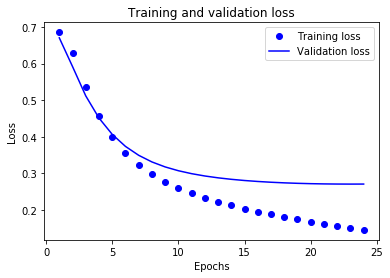

In [51]:
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

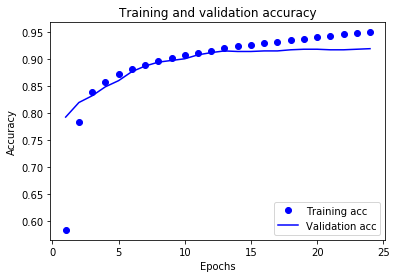

In [52]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

#### Model 2

In [114]:
model = keras.Sequential([
    keras.layers.Embedding(len(d), 16),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [115]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [116]:
history = model.fit(new_train_data, new_train_label,
                    epochs=10,
                   validation_data=(new_val_data, new_val_label),
                   validation_steps=30)

Train on 35000 samples, validate on 5000 samples
Epoch 1/10
12032/35000 [=========>....................] - ETA: 6:15 - loss: 0.6938 - accuracy: 0.46 - ETA: 2:25 - loss: 0.6938 - accuracy: 0.46 - ETA: 1:39 - loss: 0.6935 - accuracy: 0.48 - ETA: 1:20 - loss: 0.6935 - accuracy: 0.48 - ETA: 1:09 - loss: 0.6934 - accuracy: 0.46 - ETA: 1:02 - loss: 0.6933 - accuracy: 0.48 - ETA: 57s - loss: 0.6930 - accuracy: 0.5000 - ETA: 54s - loss: 0.6928 - accuracy: 0.510 - ETA: 51s - loss: 0.6929 - accuracy: 0.507 - ETA: 49s - loss: 0.6931 - accuracy: 0.503 - ETA: 47s - loss: 0.6932 - accuracy: 0.501 - ETA: 46s - loss: 0.6932 - accuracy: 0.501 - ETA: 44s - loss: 0.6929 - accuracy: 0.508 - ETA: 43s - loss: 0.6930 - accuracy: 0.505 - ETA: 42s - loss: 0.6934 - accuracy: 0.497 - ETA: 42s - loss: 0.6936 - accuracy: 0.492 - ETA: 41s - loss: 0.6938 - accuracy: 0.488 - ETA: 40s - loss: 0.6936 - accuracy: 0.492 - ETA: 40s - loss: 0.6936 - accuracy: 0.494 - ETA: 39s - loss: 0.6937 - accuracy: 0.490 - ETA: 39s - l

13120/35000 [==========>...................] - ETA: 26s - loss: 0.5176 - accuracy: 0.875 - ETA: 27s - loss: 0.5458 - accuracy: 0.843 - ETA: 28s - loss: 0.5452 - accuracy: 0.837 - ETA: 28s - loss: 0.5432 - accuracy: 0.834 - ETA: 28s - loss: 0.5413 - accuracy: 0.843 - ETA: 27s - loss: 0.5402 - accuracy: 0.840 - ETA: 27s - loss: 0.5383 - accuracy: 0.846 - ETA: 27s - loss: 0.5400 - accuracy: 0.837 - ETA: 27s - loss: 0.5378 - accuracy: 0.842 - ETA: 27s - loss: 0.5390 - accuracy: 0.848 - ETA: 27s - loss: 0.5383 - accuracy: 0.853 - ETA: 27s - loss: 0.5394 - accuracy: 0.854 - ETA: 27s - loss: 0.5374 - accuracy: 0.850 - ETA: 27s - loss: 0.5418 - accuracy: 0.837 - ETA: 27s - loss: 0.5427 - accuracy: 0.829 - ETA: 27s - loss: 0.5430 - accuracy: 0.822 - ETA: 27s - loss: 0.5465 - accuracy: 0.817 - ETA: 27s - loss: 0.5458 - accuracy: 0.818 - ETA: 27s - loss: 0.5446 - accuracy: 0.822 - ETA: 27s - loss: 0.5430 - accuracy: 0.823 - ETA: 27s - loss: 0.5427 - accuracy: 0.820 - ETA: 27s - loss: 0.5413 - acc

35000/35000 [==============================] - ETA: 7s - loss: 0.4453 - accuracy: 0.85 - ETA: 7s - loss: 0.4450 - accuracy: 0.85 - ETA: 7s - loss: 0.4447 - accuracy: 0.85 - ETA: 7s - loss: 0.4447 - accuracy: 0.85 - ETA: 7s - loss: 0.4443 - accuracy: 0.85 - ETA: 6s - loss: 0.4442 - accuracy: 0.85 - ETA: 6s - loss: 0.4440 - accuracy: 0.85 - ETA: 6s - loss: 0.4438 - accuracy: 0.85 - ETA: 6s - loss: 0.4438 - accuracy: 0.85 - ETA: 6s - loss: 0.4437 - accuracy: 0.85 - ETA: 6s - loss: 0.4436 - accuracy: 0.85 - ETA: 6s - loss: 0.4435 - accuracy: 0.85 - ETA: 6s - loss: 0.4433 - accuracy: 0.85 - ETA: 6s - loss: 0.4429 - accuracy: 0.85 - ETA: 6s - loss: 0.4427 - accuracy: 0.85 - ETA: 6s - loss: 0.4424 - accuracy: 0.85 - ETA: 6s - loss: 0.4422 - accuracy: 0.85 - ETA: 6s - loss: 0.4420 - accuracy: 0.85 - ETA: 6s - loss: 0.4418 - accuracy: 0.85 - ETA: 6s - loss: 0.4418 - accuracy: 0.85 - ETA: 6s - loss: 0.4414 - accuracy: 0.85 - ETA: 6s - loss: 0.4411 - accuracy: 0.85 - ETA: 6s - loss: 0.4409 - accu

12224/35000 [=========>....................] - ETA: 28s - loss: 0.3110 - accuracy: 0.843 - ETA: 28s - loss: 0.2796 - accuracy: 0.895 - ETA: 28s - loss: 0.2648 - accuracy: 0.900 - ETA: 28s - loss: 0.2828 - accuracy: 0.892 - ETA: 27s - loss: 0.2946 - accuracy: 0.875 - ETA: 27s - loss: 0.2811 - accuracy: 0.882 - ETA: 27s - loss: 0.2759 - accuracy: 0.886 - ETA: 27s - loss: 0.2750 - accuracy: 0.890 - ETA: 27s - loss: 0.2792 - accuracy: 0.894 - ETA: 27s - loss: 0.2763 - accuracy: 0.895 - ETA: 27s - loss: 0.2793 - accuracy: 0.890 - ETA: 27s - loss: 0.2914 - accuracy: 0.885 - ETA: 27s - loss: 0.2859 - accuracy: 0.889 - ETA: 27s - loss: 0.2835 - accuracy: 0.891 - ETA: 27s - loss: 0.2793 - accuracy: 0.895 - ETA: 27s - loss: 0.2880 - accuracy: 0.891 - ETA: 27s - loss: 0.2828 - accuracy: 0.893 - ETA: 27s - loss: 0.2800 - accuracy: 0.895 - ETA: 27s - loss: 0.2762 - accuracy: 0.898 - ETA: 27s - loss: 0.2749 - accuracy: 0.895 - ETA: 27s - loss: 0.2724 - accuracy: 0.897 - ETA: 27s - loss: 0.2723 - acc

35000/35000 [==============================] - ETA: 7s - loss: 0.2540 - accuracy: 0.90 - ETA: 7s - loss: 0.2542 - accuracy: 0.90 - ETA: 7s - loss: 0.2542 - accuracy: 0.90 - ETA: 7s - loss: 0.2541 - accuracy: 0.90 - ETA: 7s - loss: 0.2545 - accuracy: 0.90 - ETA: 7s - loss: 0.2546 - accuracy: 0.90 - ETA: 7s - loss: 0.2544 - accuracy: 0.90 - ETA: 7s - loss: 0.2546 - accuracy: 0.90 - ETA: 7s - loss: 0.2546 - accuracy: 0.90 - ETA: 7s - loss: 0.2546 - accuracy: 0.90 - ETA: 7s - loss: 0.2547 - accuracy: 0.90 - ETA: 7s - loss: 0.2548 - accuracy: 0.90 - ETA: 6s - loss: 0.2549 - accuracy: 0.90 - ETA: 6s - loss: 0.2547 - accuracy: 0.90 - ETA: 6s - loss: 0.2547 - accuracy: 0.90 - ETA: 6s - loss: 0.2546 - accuracy: 0.90 - ETA: 6s - loss: 0.2547 - accuracy: 0.90 - ETA: 6s - loss: 0.2547 - accuracy: 0.90 - ETA: 6s - loss: 0.2546 - accuracy: 0.90 - ETA: 6s - loss: 0.2547 - accuracy: 0.90 - ETA: 6s - loss: 0.2547 - accuracy: 0.90 - ETA: 6s - loss: 0.2546 - accuracy: 0.90 - ETA: 6s - loss: 0.2545 - accu

12992/35000 [==========>...................] - ETA: 27s - loss: 0.1294 - accuracy: 0.968 - ETA: 26s - loss: 0.1898 - accuracy: 0.945 - ETA: 26s - loss: 0.1856 - accuracy: 0.937 - ETA: 27s - loss: 0.1869 - accuracy: 0.933 - ETA: 27s - loss: 0.2081 - accuracy: 0.925 - ETA: 27s - loss: 0.2004 - accuracy: 0.924 - ETA: 27s - loss: 0.2125 - accuracy: 0.920 - ETA: 26s - loss: 0.2137 - accuracy: 0.921 - ETA: 27s - loss: 0.2054 - accuracy: 0.928 - ETA: 27s - loss: 0.1995 - accuracy: 0.931 - ETA: 26s - loss: 0.1963 - accuracy: 0.930 - ETA: 26s - loss: 0.1977 - accuracy: 0.930 - ETA: 27s - loss: 0.1967 - accuracy: 0.931 - ETA: 27s - loss: 0.1915 - accuracy: 0.933 - ETA: 27s - loss: 0.1930 - accuracy: 0.934 - ETA: 27s - loss: 0.1906 - accuracy: 0.936 - ETA: 27s - loss: 0.1906 - accuracy: 0.935 - ETA: 27s - loss: 0.1901 - accuracy: 0.935 - ETA: 27s - loss: 0.1887 - accuracy: 0.936 - ETA: 27s - loss: 0.1897 - accuracy: 0.935 - ETA: 27s - loss: 0.1903 - accuracy: 0.935 - ETA: 27s - loss: 0.1892 - acc

35000/35000 [==============================] - ETA: 7s - loss: 0.1968 - accuracy: 0.92 - ETA: 7s - loss: 0.1968 - accuracy: 0.92 - ETA: 7s - loss: 0.1968 - accuracy: 0.92 - ETA: 6s - loss: 0.1967 - accuracy: 0.92 - ETA: 6s - loss: 0.1966 - accuracy: 0.92 - ETA: 6s - loss: 0.1966 - accuracy: 0.92 - ETA: 6s - loss: 0.1966 - accuracy: 0.92 - ETA: 6s - loss: 0.1967 - accuracy: 0.92 - ETA: 6s - loss: 0.1967 - accuracy: 0.92 - ETA: 6s - loss: 0.1967 - accuracy: 0.92 - ETA: 6s - loss: 0.1967 - accuracy: 0.92 - ETA: 6s - loss: 0.1967 - accuracy: 0.92 - ETA: 6s - loss: 0.1968 - accuracy: 0.92 - ETA: 6s - loss: 0.1969 - accuracy: 0.92 - ETA: 6s - loss: 0.1968 - accuracy: 0.92 - ETA: 6s - loss: 0.1968 - accuracy: 0.92 - ETA: 6s - loss: 0.1969 - accuracy: 0.92 - ETA: 6s - loss: 0.1969 - accuracy: 0.92 - ETA: 6s - loss: 0.1967 - accuracy: 0.92 - ETA: 6s - loss: 0.1967 - accuracy: 0.92 - ETA: 6s - loss: 0.1966 - accuracy: 0.92 - ETA: 5s - loss: 0.1966 - accuracy: 0.92 - ETA: 5s - loss: 0.1972 - accu

12064/35000 [=========>....................] - ETA: 31s - loss: 0.1286 - accuracy: 0.968 - ETA: 34s - loss: 0.1315 - accuracy: 0.947 - ETA: 34s - loss: 0.1071 - accuracy: 0.962 - ETA: 33s - loss: 0.1581 - accuracy: 0.946 - ETA: 32s - loss: 0.1503 - accuracy: 0.954 - ETA: 32s - loss: 0.1537 - accuracy: 0.954 - ETA: 31s - loss: 0.1561 - accuracy: 0.954 - ETA: 31s - loss: 0.1526 - accuracy: 0.954 - ETA: 31s - loss: 0.1520 - accuracy: 0.955 - ETA: 30s - loss: 0.1506 - accuracy: 0.953 - ETA: 31s - loss: 0.1533 - accuracy: 0.949 - ETA: 30s - loss: 0.1590 - accuracy: 0.945 - ETA: 30s - loss: 0.1646 - accuracy: 0.943 - ETA: 30s - loss: 0.1647 - accuracy: 0.944 - ETA: 30s - loss: 0.1667 - accuracy: 0.942 - ETA: 29s - loss: 0.1710 - accuracy: 0.940 - ETA: 29s - loss: 0.1762 - accuracy: 0.936 - ETA: 29s - loss: 0.1726 - accuracy: 0.939 - ETA: 29s - loss: 0.1695 - accuracy: 0.940 - ETA: 30s - loss: 0.1660 - accuracy: 0.940 - ETA: 30s - loss: 0.1634 - accuracy: 0.941 - ETA: 30s - loss: 0.1674 - acc

35000/35000 [==============================] - ETA: 9s - loss: 0.1651 - accuracy: 0.94 - ETA: 9s - loss: 0.1649 - accuracy: 0.94 - ETA: 9s - loss: 0.1648 - accuracy: 0.94 - ETA: 9s - loss: 0.1652 - accuracy: 0.94 - ETA: 8s - loss: 0.1655 - accuracy: 0.94 - ETA: 8s - loss: 0.1658 - accuracy: 0.93 - ETA: 8s - loss: 0.1661 - accuracy: 0.93 - ETA: 8s - loss: 0.1660 - accuracy: 0.93 - ETA: 8s - loss: 0.1658 - accuracy: 0.93 - ETA: 8s - loss: 0.1657 - accuracy: 0.93 - ETA: 8s - loss: 0.1658 - accuracy: 0.93 - ETA: 8s - loss: 0.1659 - accuracy: 0.93 - ETA: 8s - loss: 0.1660 - accuracy: 0.93 - ETA: 8s - loss: 0.1662 - accuracy: 0.93 - ETA: 8s - loss: 0.1663 - accuracy: 0.93 - ETA: 8s - loss: 0.1664 - accuracy: 0.93 - ETA: 8s - loss: 0.1664 - accuracy: 0.93 - ETA: 8s - loss: 0.1665 - accuracy: 0.93 - ETA: 8s - loss: 0.1665 - accuracy: 0.93 - ETA: 8s - loss: 0.1664 - accuracy: 0.93 - ETA: 8s - loss: 0.1663 - accuracy: 0.93 - ETA: 8s - loss: 0.1662 - accuracy: 0.93 - ETA: 8s - loss: 0.1661 - accu

12128/35000 [=========>....................] - ETA: 32s - loss: 0.1012 - accuracy: 0.968 - ETA: 32s - loss: 0.1759 - accuracy: 0.958 - ETA: 30s - loss: 0.1476 - accuracy: 0.968 - ETA: 30s - loss: 0.1369 - accuracy: 0.964 - ETA: 30s - loss: 0.1269 - accuracy: 0.972 - ETA: 29s - loss: 0.1565 - accuracy: 0.965 - ETA: 30s - loss: 0.1553 - accuracy: 0.961 - ETA: 29s - loss: 0.1479 - accuracy: 0.962 - ETA: 30s - loss: 0.1500 - accuracy: 0.961 - ETA: 30s - loss: 0.1476 - accuracy: 0.958 - ETA: 30s - loss: 0.1452 - accuracy: 0.956 - ETA: 31s - loss: 0.1415 - accuracy: 0.956 - ETA: 31s - loss: 0.1562 - accuracy: 0.946 - ETA: 30s - loss: 0.1512 - accuracy: 0.949 - ETA: 30s - loss: 0.1477 - accuracy: 0.949 - ETA: 30s - loss: 0.1528 - accuracy: 0.945 - ETA: 30s - loss: 0.1486 - accuracy: 0.947 - ETA: 30s - loss: 0.1518 - accuracy: 0.947 - ETA: 30s - loss: 0.1531 - accuracy: 0.946 - ETA: 30s - loss: 0.1519 - accuracy: 0.947 - ETA: 30s - loss: 0.1525 - accuracy: 0.948 - ETA: 30s - loss: 0.1490 - acc

35000/35000 [==============================] - ETA: 9s - loss: 0.1366 - accuracy: 0.95 - ETA: 9s - loss: 0.1366 - accuracy: 0.95 - ETA: 9s - loss: 0.1366 - accuracy: 0.95 - ETA: 9s - loss: 0.1370 - accuracy: 0.95 - ETA: 9s - loss: 0.1369 - accuracy: 0.95 - ETA: 9s - loss: 0.1367 - accuracy: 0.95 - ETA: 8s - loss: 0.1366 - accuracy: 0.95 - ETA: 8s - loss: 0.1367 - accuracy: 0.95 - ETA: 8s - loss: 0.1367 - accuracy: 0.95 - ETA: 8s - loss: 0.1366 - accuracy: 0.95 - ETA: 8s - loss: 0.1365 - accuracy: 0.95 - ETA: 8s - loss: 0.1365 - accuracy: 0.95 - ETA: 8s - loss: 0.1364 - accuracy: 0.95 - ETA: 8s - loss: 0.1365 - accuracy: 0.95 - ETA: 8s - loss: 0.1364 - accuracy: 0.95 - ETA: 8s - loss: 0.1364 - accuracy: 0.95 - ETA: 8s - loss: 0.1366 - accuracy: 0.95 - ETA: 8s - loss: 0.1368 - accuracy: 0.95 - ETA: 8s - loss: 0.1366 - accuracy: 0.95 - ETA: 8s - loss: 0.1366 - accuracy: 0.95 - ETA: 8s - loss: 0.1368 - accuracy: 0.95 - ETA: 7s - loss: 0.1373 - accuracy: 0.95 - ETA: 7s - loss: 0.1372 - accu

In [117]:
loss, accuracy = model.evaluate(new_test_data, new_test_label)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

 - 1s 127us/sample - loss: 0.3540 - accuracy: 0.8958


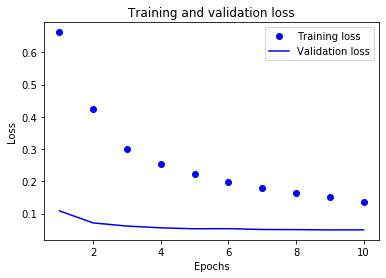

In [118]:
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

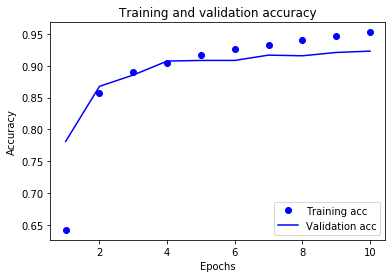

In [119]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()